In [1]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

from numpy import save
from numpy import load

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import Input, Model

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

In [2]:
X = load('D:/Desktop/desktop data/cat dog/data128(3).npy')
y = load('D:/Desktop/desktop data/cat dog/y128(3)(all).npy')

In [3]:
X.shape

(45091, 128, 128, 3)

In [4]:
y

array([[0, 0, 1, ..., 1, 1, 0]], dtype=int8)

In [5]:
y = y.reshape(45091,1)

In [6]:
X.shape, y.shape

((45091, 128, 128, 3), (45091, 1))

In [7]:
y = y.flatten()

In [8]:
x_train = X[:36000]
y_train = y[:36000]
x_dev = X[36000:40500]
y_dev = y[36000:40500]
x_test = X[40500:]
y_test = y[40500:]

In [9]:
x_train.shape,y_train.shape,x_dev.shape,y_dev.shape,x_test.shape,y_test.shape

((36000, 128, 128, 3),
 (36000,),
 (4500, 128, 128, 3),
 (4500,),
 (4591, 128, 128, 3),
 (4591,))

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
y_train

array([0, 0, 1, ..., 1, 1, 0], dtype=int8)

In [12]:
%%time
bigger_history = model.fit(x_train, y_train, epochs=10, batch_size=256,validation_data = (x_dev, y_dev))

Train on 36000 samples, validate on 4500 samples
Epoch 1/10
36000/36000 [==============================] - 48s 1ms/sample - loss: 46.3025 - accuracy: 0.5119 - val_loss: 319.3179 - val_accuracy: 1.0000
Epoch 2/10
36000/36000 [==============================] - 42s 1ms/sample - loss: 11602.1535 - accuracy: 0.5130 - val_loss: 47829.5403 - val_accuracy: 0.0000e+00
Epoch 3/10
25088/36000 [===================>..........] - ETA: 11s - loss: 94003.4039 - accuracy: 0.5051

KeyboardInterrupt: 

In [17]:
model.evaluate(x_dev, y_dev), model.evaluate(x_test, y_test)

4384/4591 [===========================>..] - ETA: 0s - loss: 25177.6131 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [27]:
model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 3s 561us/sample - loss: 0.4272 - accuracy: 0.9189


[0.42720961610641744, 0.91888887]

In [28]:
model.evaluate(x_test, y_test)

4591/4591 [==============================] - 2s 530us/sample - loss: 0.4455 - accuracy: 0.9159


[0.44551766089802114, 0.91592246]

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           multiple                  896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_13 (Conv2D)           multiple                  18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_14 (Conv2D)           multiple                  73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_15 (Conv2D)           multiple                 

In [14]:
model.evaluate(x_dev, y_dev)# 32 64 128 _ 500 100

4500/4500 [==============================] - 2s 515us/sample - loss: 0.5758 - accuracy: 0.9136 - l


[0.5757975330214055, 0.91355556]

In [15]:
model.evaluate(x_test, y_test)

4591/4591 [==============================] - 2s 488us/sample - loss: 0.6008 - accuracy: 0.9057


[0.6007997991340294, 0.905685]

In [14]:
model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 2s 487us/sample - loss: 0.3653 - accuracy: 0.8676


[0.3652673084206051, 0.86755556]

In [15]:
model.evaluate(x_test, y_test)

4591/4591 [==============================] - 2s 464us/sample - loss: 0.3692 - accuracy: 0.8665


[0.36921824807955583, 0.8664779]

In [29]:
model.save('G:/Desktop/cat dog/sample_cnn.h5')

In [31]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                               '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                         label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

In [32]:
a = []

In [33]:
a.append(('model1', bigger_history))

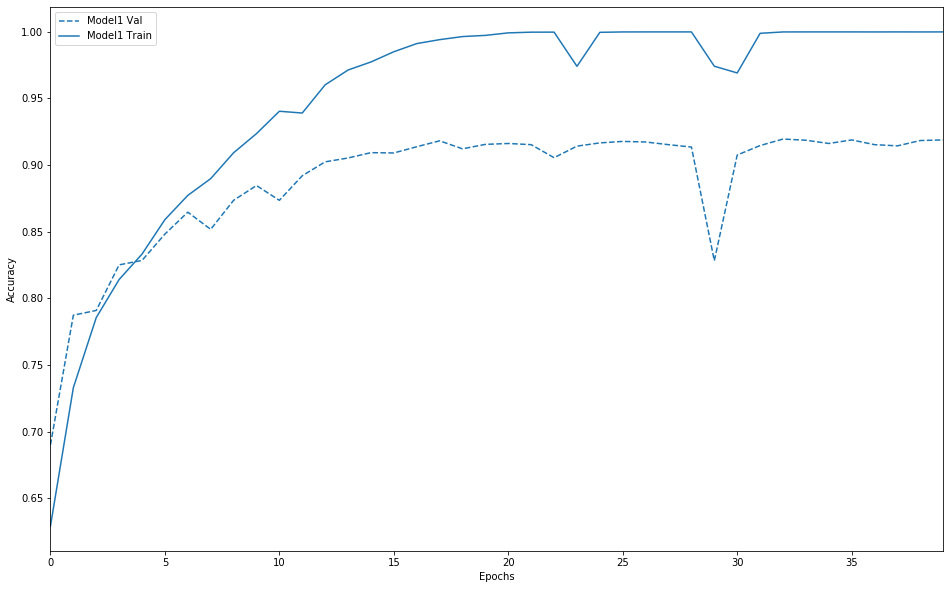

In [34]:
plot_history(a)

In [17]:
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import Hyperband

In [18]:
def builder_m(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('num_filters_1', min_value=16, max_value=128, step=16, default=32),
                     kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(filters=hp.Int('num_filters_2', min_value=32, max_value=256, step=16, default=64),
                     kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(filters=hp.Int('num_filters_3', min_value=64, max_value=512, step=32, default=128),
                     kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(filters=hp.Int('num_filters_4', min_value=64, max_value=1024, step=32, default=256),
                     kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('fully_conn_1', min_value=256, max_value=1024, step=64, default=512),
                    activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units=hp.Int('fully_conn_2', min_value=32, max_value=512, step=32, default=128),
                    activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
        bias_initializer='zeros'))

    model.compile(optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [19]:
tuner = Hyperband(builder_m,objective='val_accuracy', max_epochs = 40,
                 directory = 'my_dir',
    project_name = 'simple_cnn_tuner_4')

In [20]:
tuner.search_space_summary()

In [21]:
%%time
tuner.search(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_dev, y_dev))

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 9:04 - loss: 0.7052 - accuracy: 0.51 - ETA: 4:53 - loss: 1.6029 - accuracy: 0.55 - ETA: 3:28 - loss: 1.4204 - accuracy: 0.55 - ETA: 2:46 - loss: 1.4561 - accuracy: 0.50 - ETA: 2:21 - loss: 1.3440 - accuracy: 0.50 - ETA: 2:04 - loss: 1.2325 - accuracy: 0.52 - ETA: 1:52 - loss: 1.1712 - accuracy: 0.53 - ETA: 1:43 - loss: 1.1556 - accuracy: 0.52 - ETA: 1:36 - loss: 1.1114 - accuracy: 0.52 - ETA: 1:30 - loss: 1.0711 - accuracy: 0.52 - ETA: 1:25 - loss: 1.0412 - accuracy: 0.51 - ETA: 1:21 - loss: 1.0208 - accuracy: 0.51 - ETA: 1:18 - loss: 0.9970 - accuracy: 0.51 - ETA: 1:15 - loss: 0.9776 - accuracy: 0.50 - ETA: 1:13 - loss: 0.9583 - accuracy: 0.50 - ETA: 1:10 - loss: 0.9414 - accuracy: 0.50 - ETA: 1:08 - loss: 0.9275 - accuracy: 0.50 - ETA: 1:06 - loss: 0.9145 - accuracy: 0.50 - ETA: 1:05 - loss: 0.9023 - accuracy: 0.50 - ETA: 1:03 - loss: 0.8915 - accuracy: 0.51 - ETA: 1:02 - l

11904/20000 [================>.............] - ETA: 56s - loss: 0.5419 - accuracy: 0.765 - ETA: 58s - loss: 0.5015 - accuracy: 0.781 - ETA: 57s - loss: 0.4948 - accuracy: 0.781 - ETA: 57s - loss: 0.5070 - accuracy: 0.777 - ETA: 57s - loss: 0.5028 - accuracy: 0.787 - ETA: 57s - loss: 0.5092 - accuracy: 0.773 - ETA: 57s - loss: 0.5149 - accuracy: 0.763 - ETA: 57s - loss: 0.5165 - accuracy: 0.755 - ETA: 57s - loss: 0.5180 - accuracy: 0.762 - ETA: 56s - loss: 0.5124 - accuracy: 0.760 - ETA: 56s - loss: 0.5089 - accuracy: 0.759 - ETA: 56s - loss: 0.5088 - accuracy: 0.755 - ETA: 56s - loss: 0.5130 - accuracy: 0.751 - ETA: 55s - loss: 0.5057 - accuracy: 0.756 - ETA: 55s - loss: 0.5116 - accuracy: 0.747 - ETA: 55s - loss: 0.5176 - accuracy: 0.744 - ETA: 55s - loss: 0.5143 - accuracy: 0.744 - ETA: 55s - loss: 0.5109 - accuracy: 0.750 - ETA: 55s - loss: 0.5203 - accuracy: 0.742 - ETA: 54s - loss: 0.5279 - accuracy: 0.736 - ETA: 54s - loss: 0.5238 - accuracy: 0.737 - ETA: 54s - loss: 0.5221 - acc

20000/20000 [==============================] - ETA: 23s - loss: 0.5060 - accuracy: 0.756 - ETA: 23s - loss: 0.5059 - accuracy: 0.756 - ETA: 23s - loss: 0.5057 - accuracy: 0.756 - ETA: 22s - loss: 0.5056 - accuracy: 0.756 - ETA: 22s - loss: 0.5055 - accuracy: 0.756 - ETA: 22s - loss: 0.5057 - accuracy: 0.756 - ETA: 22s - loss: 0.5056 - accuracy: 0.757 - ETA: 22s - loss: 0.5051 - accuracy: 0.757 - ETA: 22s - loss: 0.5044 - accuracy: 0.757 - ETA: 21s - loss: 0.5043 - accuracy: 0.757 - ETA: 21s - loss: 0.5041 - accuracy: 0.758 - ETA: 21s - loss: 0.5050 - accuracy: 0.757 - ETA: 21s - loss: 0.5051 - accuracy: 0.757 - ETA: 21s - loss: 0.5047 - accuracy: 0.757 - ETA: 20s - loss: 0.5062 - accuracy: 0.757 - ETA: 20s - loss: 0.5059 - accuracy: 0.757 - ETA: 20s - loss: 0.5060 - accuracy: 0.757 - ETA: 20s - loss: 0.5062 - accuracy: 0.757 - ETA: 20s - loss: 0.5059 - accuracy: 0.757 - ETA: 19s - loss: 0.5059 - accuracy: 0.757 - ETA: 19s - loss: 0.5056 - accuracy: 0.757 - ETA: 19s - loss: 0.5052 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11712/20000 [================>.............] - ETA: 10:39 - loss: 0.7848 - accuracy: 0.390 - ETA: 5:42 - loss: 523.3030 - accuracy: 0.46 - ETA: 4:03 - loss: 349.2247 - accuracy: 0.47 - ETA: 3:13 - loss: 265.3515 - accuracy: 0.49 - ETA: 2:43 - loss: 213.0704 - accuracy: 0.49 - ETA: 2:23 - loss: 177.6746 - accuracy: 0.48 - ETA: 2:09 - loss: 152.4532 - accuracy: 0.51 - ETA: 1:58 - loss: 135.2811 - accuracy: 0.50 - ETA: 1:50 - loss: 120.4004 - accuracy: 0.49 - ETA: 1:43 - loss: 108.5273 - accuracy: 0.49 - ETA: 1:37 - loss: 98.7548 - accuracy: 0.5014 - ETA: 1:33 - loss: 90.5867 - accuracy: 0.501 - ETA: 1:29 - loss: 83.6716 - accuracy: 0.504 - ETA: 1:25 - loss: 77.7444 - accuracy: 0.511 - ETA: 1:22 - loss: 72.6075 - accuracy: 0.514 - ETA: 1:20 - loss: 68.1160 - accuracy: 0.508 - ETA: 1:17 - loss: 64.1500 - accuracy: 0.508 - ETA: 1:15 - loss: 60.6246 - accuracy: 0.508 - ETA: 1:13 - loss: 57.4715 - accuracy: 0.506 - ETA: 1:12 - loss: 

11904/20000 [================>.............] - ETA: 44s - loss: 0.6538 - accuracy: 0.671 - ETA: 45s - loss: 0.6396 - accuracy: 0.656 - ETA: 46s - loss: 0.6424 - accuracy: 0.640 - ETA: 46s - loss: 0.6435 - accuracy: 0.636 - ETA: 46s - loss: 0.6503 - accuracy: 0.612 - ETA: 46s - loss: 0.6508 - accuracy: 0.614 - ETA: 46s - loss: 0.6558 - accuracy: 0.609 - ETA: 45s - loss: 0.6618 - accuracy: 0.605 - ETA: 45s - loss: 0.6651 - accuracy: 0.599 - ETA: 45s - loss: 0.6629 - accuracy: 0.607 - ETA: 45s - loss: 0.6673 - accuracy: 0.610 - ETA: 45s - loss: 0.6681 - accuracy: 0.608 - ETA: 45s - loss: 0.6674 - accuracy: 0.604 - ETA: 45s - loss: 0.6646 - accuracy: 0.601 - ETA: 44s - loss: 0.6640 - accuracy: 0.596 - ETA: 44s - loss: 0.6646 - accuracy: 0.594 - ETA: 44s - loss: 0.6672 - accuracy: 0.592 - ETA: 44s - loss: 0.6693 - accuracy: 0.585 - ETA: 44s - loss: 0.6698 - accuracy: 0.587 - ETA: 44s - loss: 0.6708 - accuracy: 0.584 - ETA: 43s - loss: 0.6710 - accuracy: 0.581 - ETA: 43s - loss: 0.6703 - acc

20000/20000 [==============================] - ETA: 18s - loss: 0.6690 - accuracy: 0.594 - ETA: 18s - loss: 0.6690 - accuracy: 0.595 - ETA: 18s - loss: 0.6692 - accuracy: 0.594 - ETA: 18s - loss: 0.6693 - accuracy: 0.594 - ETA: 18s - loss: 0.6694 - accuracy: 0.593 - ETA: 18s - loss: 0.6695 - accuracy: 0.593 - ETA: 18s - loss: 0.6697 - accuracy: 0.592 - ETA: 17s - loss: 0.6699 - accuracy: 0.592 - ETA: 17s - loss: 0.6700 - accuracy: 0.591 - ETA: 17s - loss: 0.6701 - accuracy: 0.591 - ETA: 17s - loss: 0.6702 - accuracy: 0.591 - ETA: 17s - loss: 0.6703 - accuracy: 0.591 - ETA: 17s - loss: 0.6704 - accuracy: 0.591 - ETA: 16s - loss: 0.6704 - accuracy: 0.591 - ETA: 16s - loss: 0.6705 - accuracy: 0.591 - ETA: 16s - loss: 0.6706 - accuracy: 0.591 - ETA: 16s - loss: 0.6706 - accuracy: 0.590 - ETA: 16s - loss: 0.6711 - accuracy: 0.590 - ETA: 16s - loss: 0.6712 - accuracy: 0.589 - ETA: 16s - loss: 0.6713 - accuracy: 0.589 - ETA: 15s - loss: 0.6713 - accuracy: 0.589 - ETA: 15s - loss: 0.6713 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11520/20000 [================>.............] - ETA: 15:04 - loss: 0.8024 - accuracy: 0.593 - ETA: 8:11 - loss: 1713.4681 - accuracy: 0.585 - ETA: 5:52 - loss: 1151.0269 - accuracy: 0.567 - ETA: 4:44 - loss: 864.8724 - accuracy: 0.527 - ETA: 4:02 - loss: 692.4533 - accuracy: 0.55 - ETA: 3:34 - loss: 578.4119 - accuracy: 0.54 - ETA: 3:14 - loss: 495.8950 - accuracy: 0.52 - ETA: 2:59 - loss: 433.9915 - accuracy: 0.53 - ETA: 2:47 - loss: 385.8530 - accuracy: 0.52 - ETA: 2:37 - loss: 347.3391 - accuracy: 0.51 - ETA: 2:29 - loss: 315.8250 - accuracy: 0.51 - ETA: 2:23 - loss: 289.5645 - accuracy: 0.51 - ETA: 2:17 - loss: 267.3451 - accuracy: 0.50 - ETA: 2:12 - loss: 248.2992 - accuracy: 0.50 - ETA: 2:08 - loss: 231.7923 - accuracy: 0.50 - ETA: 2:04 - loss: 217.3487 - accuracy: 0.50 - ETA: 2:01 - loss: 204.6048 - accuracy: 0.49 - ETA: 1:58 - loss: 193.2766 - accuracy: 0.49 - ETA: 1:55 - loss: 183.1407 - accuracy: 0.49 - ETA: 1:53 - lo

11904/20000 [================>.............] - ETA: 1:18 - loss: 0.6872 - accuracy: 0.56 - ETA: 1:18 - loss: 0.6870 - accuracy: 0.56 - ETA: 1:18 - loss: 0.6877 - accuracy: 0.55 - ETA: 1:18 - loss: 0.6856 - accuracy: 0.57 - ETA: 1:17 - loss: 0.6878 - accuracy: 0.55 - ETA: 1:17 - loss: 0.6897 - accuracy: 0.54 - ETA: 1:17 - loss: 0.6920 - accuracy: 0.53 - ETA: 1:17 - loss: 0.6919 - accuracy: 0.53 - ETA: 1:16 - loss: 0.6913 - accuracy: 0.53 - ETA: 1:16 - loss: 0.6896 - accuracy: 0.54 - ETA: 1:16 - loss: 0.6874 - accuracy: 0.55 - ETA: 1:16 - loss: 0.6885 - accuracy: 0.54 - ETA: 1:15 - loss: 0.6909 - accuracy: 0.53 - ETA: 1:15 - loss: 0.6921 - accuracy: 0.53 - ETA: 1:15 - loss: 0.6919 - accuracy: 0.53 - ETA: 1:15 - loss: 0.6924 - accuracy: 0.52 - ETA: 1:14 - loss: 0.6922 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6920 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6913 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6915 - accuracy: 0.53 - ETA: 1:13 - loss: 0.6909 - accuracy: 0.53 - ETA: 1:13 - loss: 0.6902 - ac

20000/20000 [==============================] - ETA: 31s - loss: 0.6904 - accuracy: 0.540 - ETA: 31s - loss: 0.6904 - accuracy: 0.540 - ETA: 31s - loss: 0.6904 - accuracy: 0.540 - ETA: 31s - loss: 0.6905 - accuracy: 0.539 - ETA: 30s - loss: 0.6905 - accuracy: 0.539 - ETA: 30s - loss: 0.6905 - accuracy: 0.539 - ETA: 30s - loss: 0.6905 - accuracy: 0.539 - ETA: 29s - loss: 0.6905 - accuracy: 0.539 - ETA: 29s - loss: 0.6905 - accuracy: 0.539 - ETA: 29s - loss: 0.6906 - accuracy: 0.538 - ETA: 29s - loss: 0.6906 - accuracy: 0.538 - ETA: 28s - loss: 0.6906 - accuracy: 0.538 - ETA: 28s - loss: 0.6905 - accuracy: 0.539 - ETA: 28s - loss: 0.6906 - accuracy: 0.538 - ETA: 28s - loss: 0.6906 - accuracy: 0.538 - ETA: 27s - loss: 0.6906 - accuracy: 0.538 - ETA: 27s - loss: 0.6906 - accuracy: 0.538 - ETA: 27s - loss: 0.6906 - accuracy: 0.538 - ETA: 27s - loss: 0.6906 - accuracy: 0.538 - ETA: 26s - loss: 0.6906 - accuracy: 0.538 - ETA: 26s - loss: 0.6906 - accuracy: 0.538 - ETA: 26s - loss: 0.6906 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 11:36 - loss: 0.9793 - accuracy: 0.593 - ETA: 6:10 - loss: 30.9065 - accuracy: 0.500 - ETA: 4:22 - loss: 23.5654 - accuracy: 0.515 - ETA: 3:27 - loss: 17.9827 - accuracy: 0.523 - ETA: 2:55 - loss: 14.6358 - accuracy: 0.487 - ETA: 2:33 - loss: 12.3140 - accuracy: 0.492 - ETA: 2:17 - loss: 10.6556 - accuracy: 0.502 - ETA: 2:06 - loss: 9.4106 - accuracy: 0.502 - ETA: 1:57 - loss: 8.4428 - accuracy: 0.50 - ETA: 1:49 - loss: 7.6702 - accuracy: 0.49 - ETA: 1:43 - loss: 7.0359 - accuracy: 0.49 - ETA: 1:38 - loss: 6.5064 - accuracy: 0.49 - ETA: 1:34 - loss: 6.0573 - accuracy: 0.50 - ETA: 1:30 - loss: 5.6769 - accuracy: 0.49 - ETA: 1:27 - loss: 5.3421 - accuracy: 0.50 - ETA: 1:24 - loss: 5.0506 - accuracy: 0.50 - ETA: 1:21 - loss: 4.7932 - accuracy: 0.51 - ETA: 1:19 - loss: 4.5648 - accuracy: 0.51 - ETA: 1:17 - loss: 4.3607 - accuracy: 0.51 - ETA: 1:15 - loss: 4.1808 - accuracy: 0.50 

11904/20000 [================>.............] - ETA: 47s - loss: 0.4523 - accuracy: 0.796 - ETA: 47s - loss: 0.5012 - accuracy: 0.781 - ETA: 46s - loss: 0.5234 - accuracy: 0.744 - ETA: 47s - loss: 0.5375 - accuracy: 0.718 - ETA: 47s - loss: 0.5375 - accuracy: 0.718 - ETA: 47s - loss: 0.5620 - accuracy: 0.713 - ETA: 47s - loss: 0.5723 - accuracy: 0.696 - ETA: 46s - loss: 0.5755 - accuracy: 0.697 - ETA: 46s - loss: 0.5794 - accuracy: 0.696 - ETA: 46s - loss: 0.5825 - accuracy: 0.690 - ETA: 46s - loss: 0.5839 - accuracy: 0.691 - ETA: 46s - loss: 0.5871 - accuracy: 0.684 - ETA: 46s - loss: 0.5861 - accuracy: 0.688 - ETA: 45s - loss: 0.5830 - accuracy: 0.688 - ETA: 46s - loss: 0.5892 - accuracy: 0.681 - ETA: 45s - loss: 0.5851 - accuracy: 0.686 - ETA: 45s - loss: 0.5839 - accuracy: 0.686 - ETA: 45s - loss: 0.5828 - accuracy: 0.687 - ETA: 45s - loss: 0.5781 - accuracy: 0.694 - ETA: 45s - loss: 0.5822 - accuracy: 0.693 - ETA: 44s - loss: 0.5808 - accuracy: 0.696 - ETA: 44s - loss: 0.5813 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.5273 - accuracy: 0.739 - ETA: 19s - loss: 0.5270 - accuracy: 0.739 - ETA: 19s - loss: 0.5268 - accuracy: 0.740 - ETA: 18s - loss: 0.5261 - accuracy: 0.740 - ETA: 18s - loss: 0.5249 - accuracy: 0.741 - ETA: 18s - loss: 0.5251 - accuracy: 0.740 - ETA: 18s - loss: 0.5244 - accuracy: 0.741 - ETA: 18s - loss: 0.5241 - accuracy: 0.741 - ETA: 18s - loss: 0.5241 - accuracy: 0.741 - ETA: 18s - loss: 0.5235 - accuracy: 0.741 - ETA: 17s - loss: 0.5229 - accuracy: 0.742 - ETA: 17s - loss: 0.5222 - accuracy: 0.742 - ETA: 17s - loss: 0.5224 - accuracy: 0.742 - ETA: 17s - loss: 0.5220 - accuracy: 0.743 - ETA: 17s - loss: 0.5214 - accuracy: 0.743 - ETA: 17s - loss: 0.5213 - accuracy: 0.743 - ETA: 16s - loss: 0.5212 - accuracy: 0.743 - ETA: 16s - loss: 0.5206 - accuracy: 0.743 - ETA: 16s - loss: 0.5201 - accuracy: 0.743 - ETA: 16s - loss: 0.5194 - accuracy: 0.744 - ETA: 16s - loss: 0.5189 - accuracy: 0.744 - ETA: 16s - loss: 0.5189 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 13:47 - loss: 0.9213 - accuracy: 0.484 - ETA: 7:27 - loss: 33.0425 - accuracy: 0.507 - ETA: 5:21 - loss: 22.9627 - accuracy: 0.489 - ETA: 4:17 - loss: 17.3857 - accuracy: 0.519 - ETA: 3:39 - loss: 14.0424 - accuracy: 0.534 - ETA: 3:14 - loss: 11.8313 - accuracy: 0.526 - ETA: 2:55 - loss: 10.3075 - accuracy: 0.529 - ETA: 2:42 - loss: 9.1060 - accuracy: 0.527 - ETA: 2:31 - loss: 8.1700 - accuracy: 0.53 - ETA: 2:22 - loss: 7.4207 - accuracy: 0.54 - ETA: 2:15 - loss: 6.8092 - accuracy: 0.54 - ETA: 2:09 - loss: 6.2984 - accuracy: 0.54 - ETA: 2:04 - loss: 5.8672 - accuracy: 0.54 - ETA: 2:00 - loss: 5.4974 - accuracy: 0.54 - ETA: 1:56 - loss: 5.1769 - accuracy: 0.54 - ETA: 1:52 - loss: 4.8966 - accuracy: 0.54 - ETA: 1:49 - loss: 4.6493 - accuracy: 0.54 - ETA: 1:47 - loss: 4.4292 - accuracy: 0.53 - ETA: 1:44 - loss: 4.2323 - accuracy: 0.53 - ETA: 1:42 - loss: 4.0551 - accuracy: 0.53 

11904/20000 [================>.............] - ETA: 1:06 - loss: 0.6663 - accuracy: 0.59 - ETA: 1:09 - loss: 0.6568 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6334 - accuracy: 0.62 - ETA: 1:09 - loss: 0.6239 - accuracy: 0.63 - ETA: 1:09 - loss: 0.6238 - accuracy: 0.62 - ETA: 1:09 - loss: 0.6209 - accuracy: 0.63 - ETA: 1:09 - loss: 0.6195 - accuracy: 0.64 - ETA: 1:09 - loss: 0.6126 - accuracy: 0.66 - ETA: 1:08 - loss: 0.6131 - accuracy: 0.66 - ETA: 1:08 - loss: 0.6130 - accuracy: 0.65 - ETA: 1:08 - loss: 0.6174 - accuracy: 0.64 - ETA: 1:08 - loss: 0.6120 - accuracy: 0.65 - ETA: 1:08 - loss: 0.6157 - accuracy: 0.65 - ETA: 1:07 - loss: 0.6183 - accuracy: 0.65 - ETA: 1:07 - loss: 0.6171 - accuracy: 0.66 - ETA: 1:07 - loss: 0.6117 - accuracy: 0.66 - ETA: 1:07 - loss: 0.6139 - accuracy: 0.65 - ETA: 1:07 - loss: 0.6113 - accuracy: 0.65 - ETA: 1:06 - loss: 0.6104 - accuracy: 0.66 - ETA: 1:06 - loss: 0.6064 - accuracy: 0.66 - ETA: 1:06 - loss: 0.6090 - accuracy: 0.66 - ETA: 1:06 - loss: 0.6092 - ac

20000/20000 [==============================] - ETA: 28s - loss: 0.5712 - accuracy: 0.701 - ETA: 28s - loss: 0.5707 - accuracy: 0.702 - ETA: 28s - loss: 0.5704 - accuracy: 0.702 - ETA: 27s - loss: 0.5701 - accuracy: 0.702 - ETA: 27s - loss: 0.5700 - accuracy: 0.703 - ETA: 27s - loss: 0.5698 - accuracy: 0.703 - ETA: 27s - loss: 0.5701 - accuracy: 0.702 - ETA: 27s - loss: 0.5700 - accuracy: 0.703 - ETA: 26s - loss: 0.5696 - accuracy: 0.703 - ETA: 26s - loss: 0.5698 - accuracy: 0.703 - ETA: 26s - loss: 0.5692 - accuracy: 0.704 - ETA: 26s - loss: 0.5697 - accuracy: 0.704 - ETA: 25s - loss: 0.5689 - accuracy: 0.704 - ETA: 25s - loss: 0.5686 - accuracy: 0.704 - ETA: 25s - loss: 0.5682 - accuracy: 0.705 - ETA: 25s - loss: 0.5678 - accuracy: 0.705 - ETA: 25s - loss: 0.5672 - accuracy: 0.706 - ETA: 24s - loss: 0.5670 - accuracy: 0.706 - ETA: 24s - loss: 0.5665 - accuracy: 0.706 - ETA: 24s - loss: 0.5668 - accuracy: 0.706 - ETA: 24s - loss: 0.5659 - accuracy: 0.707 - ETA: 23s - loss: 0.5659 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11264/20000 [===============>..............] - ETA: 25:33 - loss: 0.7504 - accuracy: 0.515 - ETA: 13:52 - loss: 2466.2746 - accuracy: 0.44 - ETA: 9:59 - loss: 1644.5674 - accuracy: 0.4375 - ETA: 8:01 - loss: 1234.4282 - accuracy: 0.460 - ETA: 6:51 - loss: 988.9433 - accuracy: 0.459 - ETA: 6:04 - loss: 824.3156 - accuracy: 0.46 - ETA: 5:30 - loss: 706.7675 - accuracy: 0.47 - ETA: 5:05 - loss: 618.5068 - accuracy: 0.49 - ETA: 4:45 - loss: 549.8611 - accuracy: 0.50 - ETA: 4:29 - loss: 494.9519 - accuracy: 0.50 - ETA: 4:15 - loss: 450.0201 - accuracy: 0.50 - ETA: 4:04 - loss: 412.5773 - accuracy: 0.50 - ETA: 3:55 - loss: 380.8918 - accuracy: 0.51 - ETA: 3:47 - loss: 353.7373 - accuracy: 0.51 - ETA: 3:39 - loss: 330.2014 - accuracy: 0.51 - ETA: 3:33 - loss: 309.6145 - accuracy: 0.50 - ETA: 3:28 - loss: 291.5079 - accuracy: 0.50 - ETA: 3:22 - loss: 275.3518 - accuracy: 0.50 - ETA: 3:18 - loss: 260.8974 - accuracy: 0.51 - ETA: 3:14 -

11904/20000 [================>.............] - ETA: 2:15 - loss: 0.7048 - accuracy: 0.46 - ETA: 2:15 - loss: 0.6923 - accuracy: 0.53 - ETA: 2:14 - loss: 0.7025 - accuracy: 0.47 - ETA: 2:13 - loss: 0.7004 - accuracy: 0.48 - ETA: 2:14 - loss: 0.6981 - accuracy: 0.49 - ETA: 2:13 - loss: 0.6966 - accuracy: 0.50 - ETA: 2:12 - loss: 0.6958 - accuracy: 0.50 - ETA: 2:12 - loss: 0.6937 - accuracy: 0.52 - ETA: 2:12 - loss: 0.6928 - accuracy: 0.52 - ETA: 2:11 - loss: 0.6930 - accuracy: 0.52 - ETA: 2:11 - loss: 0.6927 - accuracy: 0.52 - ETA: 2:10 - loss: 0.6922 - accuracy: 0.53 - ETA: 2:10 - loss: 0.6915 - accuracy: 0.53 - ETA: 2:10 - loss: 0.6916 - accuracy: 0.53 - ETA: 2:09 - loss: 0.6911 - accuracy: 0.53 - ETA: 2:09 - loss: 0.6907 - accuracy: 0.54 - ETA: 2:08 - loss: 0.6905 - accuracy: 0.54 - ETA: 2:08 - loss: 0.6907 - accuracy: 0.54 - ETA: 2:07 - loss: 0.6910 - accuracy: 0.53 - ETA: 2:07 - loss: 0.6912 - accuracy: 0.53 - ETA: 2:06 - loss: 0.6910 - accuracy: 0.53 - ETA: 2:06 - loss: 0.6910 - ac

20000/20000 [==============================] - ETA: 54s - loss: 0.6913 - accuracy: 0.533 - ETA: 54s - loss: 0.6913 - accuracy: 0.533 - ETA: 54s - loss: 0.6913 - accuracy: 0.533 - ETA: 53s - loss: 0.6913 - accuracy: 0.533 - ETA: 53s - loss: 0.6913 - accuracy: 0.533 - ETA: 52s - loss: 0.6912 - accuracy: 0.533 - ETA: 52s - loss: 0.6913 - accuracy: 0.533 - ETA: 51s - loss: 0.6913 - accuracy: 0.533 - ETA: 51s - loss: 0.6913 - accuracy: 0.533 - ETA: 50s - loss: 0.6912 - accuracy: 0.533 - ETA: 50s - loss: 0.6913 - accuracy: 0.533 - ETA: 50s - loss: 0.6913 - accuracy: 0.532 - ETA: 49s - loss: 0.6913 - accuracy: 0.533 - ETA: 49s - loss: 0.6912 - accuracy: 0.533 - ETA: 48s - loss: 0.6913 - accuracy: 0.533 - ETA: 48s - loss: 0.6912 - accuracy: 0.534 - ETA: 47s - loss: 0.6911 - accuracy: 0.534 - ETA: 47s - loss: 0.6911 - accuracy: 0.534 - ETA: 47s - loss: 0.6911 - accuracy: 0.534 - ETA: 46s - loss: 0.6911 - accuracy: 0.534 - ETA: 46s - loss: 0.6912 - accuracy: 0.534 - ETA: 45s - loss: 0.6912 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 14:01 - loss: 0.8915 - accuracy: 0.578 - ETA: 7:45 - loss: 1.8715 - accuracy: 0.531 - ETA: 5:38 - loss: 1.5357 - accuracy: 0.55 - ETA: 4:34 - loss: 1.3261 - accuracy: 0.55 - ETA: 3:56 - loss: 1.2038 - accuracy: 0.55 - ETA: 3:30 - loss: 1.1208 - accuracy: 0.55 - ETA: 3:12 - loss: 1.0714 - accuracy: 0.54 - ETA: 2:58 - loss: 1.0227 - accuracy: 0.53 - ETA: 2:48 - loss: 0.9855 - accuracy: 0.53 - ETA: 2:39 - loss: 0.9561 - accuracy: 0.53 - ETA: 2:32 - loss: 0.9321 - accuracy: 0.53 - ETA: 2:26 - loss: 0.9120 - accuracy: 0.54 - ETA: 2:21 - loss: 0.8956 - accuracy: 0.53 - ETA: 2:16 - loss: 0.8810 - accuracy: 0.53 - ETA: 2:12 - loss: 0.8686 - accuracy: 0.53 - ETA: 2:09 - loss: 0.8569 - accuracy: 0.54 - ETA: 2:06 - loss: 0.8470 - accuracy: 0.54 - ETA: 2:03 - loss: 0.8377 - accuracy: 0.54 - ETA: 2:01 - loss: 0.8290 - accuracy: 0.54 - ETA: 1:58 - loss: 0.8213 - accuracy: 0.55 - ETA: 1:56 

11904/20000 [================>.............] - ETA: 1:05 - loss: 0.4412 - accuracy: 0.85 - ETA: 1:04 - loss: 0.5239 - accuracy: 0.78 - ETA: 1:04 - loss: 0.5124 - accuracy: 0.79 - ETA: 1:04 - loss: 0.5236 - accuracy: 0.79 - ETA: 1:04 - loss: 0.5314 - accuracy: 0.75 - ETA: 1:04 - loss: 0.5285 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5193 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5180 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5150 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5068 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5047 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5081 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5108 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5122 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5129 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5139 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5154 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5181 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5195 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5240 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5266 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5267 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.5166 - accuracy: 0.745 - ETA: 26s - loss: 0.5166 - accuracy: 0.746 - ETA: 25s - loss: 0.5168 - accuracy: 0.745 - ETA: 25s - loss: 0.5168 - accuracy: 0.746 - ETA: 25s - loss: 0.5173 - accuracy: 0.745 - ETA: 25s - loss: 0.5173 - accuracy: 0.745 - ETA: 25s - loss: 0.5176 - accuracy: 0.745 - ETA: 24s - loss: 0.5176 - accuracy: 0.745 - ETA: 24s - loss: 0.5178 - accuracy: 0.744 - ETA: 24s - loss: 0.5174 - accuracy: 0.745 - ETA: 24s - loss: 0.5175 - accuracy: 0.745 - ETA: 24s - loss: 0.5168 - accuracy: 0.745 - ETA: 23s - loss: 0.5165 - accuracy: 0.746 - ETA: 23s - loss: 0.5164 - accuracy: 0.746 - ETA: 23s - loss: 0.5164 - accuracy: 0.746 - ETA: 23s - loss: 0.5165 - accuracy: 0.746 - ETA: 22s - loss: 0.5162 - accuracy: 0.746 - ETA: 22s - loss: 0.5164 - accuracy: 0.746 - ETA: 22s - loss: 0.5164 - accuracy: 0.746 - ETA: 22s - loss: 0.5160 - accuracy: 0.746 - ETA: 22s - loss: 0.5160 - accuracy: 0.746 - ETA: 21s - loss: 0.5163 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11712/20000 [================>.............] - ETA: 10:06 - loss: 0.8535 - accuracy: 0.437 - ETA: 5:34 - loss: 78.0029 - accuracy: 0.500 - ETA: 4:04 - loss: 57.8641 - accuracy: 0.479 - ETA: 3:18 - loss: 43.6187 - accuracy: 0.492 - ETA: 2:51 - loss: 35.0577 - accuracy: 0.487 - ETA: 2:33 - loss: 29.3675 - accuracy: 0.479 - ETA: 2:19 - loss: 25.2691 - accuracy: 0.493 - ETA: 2:09 - loss: 22.2042 - accuracy: 0.494 - ETA: 2:02 - loss: 19.8507 - accuracy: 0.482 - ETA: 1:56 - loss: 17.9352 - accuracy: 0.478 - ETA: 1:50 - loss: 16.3681 - accuracy: 0.484 - ETA: 1:46 - loss: 15.0634 - accuracy: 0.484 - ETA: 1:42 - loss: 13.9586 - accuracy: 0.484 - ETA: 1:39 - loss: 13.0103 - accuracy: 0.493 - ETA: 1:36 - loss: 12.1890 - accuracy: 0.495 - ETA: 1:34 - loss: 11.4703 - accuracy: 0.501 - ETA: 1:32 - loss: 10.8359 - accuracy: 0.503 - ETA: 1:30 - loss: 10.2711 - accuracy: 0.509 - ETA: 1:28 - loss: 9.7663 - accuracy: 0.512 - ETA: 1:26 - loss: 9.

11904/20000 [================>.............] - ETA: 1:10 - loss: 0.4419 - accuracy: 0.79 - ETA: 1:07 - loss: 0.6606 - accuracy: 0.64 - ETA: 1:06 - loss: 0.6344 - accuracy: 0.65 - ETA: 1:05 - loss: 0.6585 - accuracy: 0.62 - ETA: 1:05 - loss: 0.6354 - accuracy: 0.63 - ETA: 1:04 - loss: 0.6241 - accuracy: 0.65 - ETA: 1:04 - loss: 0.6123 - accuracy: 0.68 - ETA: 1:04 - loss: 0.6096 - accuracy: 0.68 - ETA: 1:04 - loss: 0.6122 - accuracy: 0.68 - ETA: 1:03 - loss: 0.6165 - accuracy: 0.68 - ETA: 1:03 - loss: 0.6118 - accuracy: 0.68 - ETA: 1:03 - loss: 0.6004 - accuracy: 0.69 - ETA: 1:03 - loss: 0.5946 - accuracy: 0.69 - ETA: 1:02 - loss: 0.5868 - accuracy: 0.69 - ETA: 1:02 - loss: 0.5880 - accuracy: 0.69 - ETA: 1:02 - loss: 0.5844 - accuracy: 0.69 - ETA: 1:02 - loss: 0.5866 - accuracy: 0.69 - ETA: 1:01 - loss: 0.5869 - accuracy: 0.69 - ETA: 1:01 - loss: 0.5854 - accuracy: 0.69 - ETA: 1:01 - loss: 0.5856 - accuracy: 0.69 - ETA: 1:01 - loss: 0.5859 - accuracy: 0.69 - ETA: 1:01 - loss: 0.5804 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.5400 - accuracy: 0.727 - ETA: 26s - loss: 0.5400 - accuracy: 0.727 - ETA: 25s - loss: 0.5391 - accuracy: 0.728 - ETA: 25s - loss: 0.5391 - accuracy: 0.728 - ETA: 25s - loss: 0.5386 - accuracy: 0.729 - ETA: 25s - loss: 0.5387 - accuracy: 0.729 - ETA: 25s - loss: 0.5381 - accuracy: 0.729 - ETA: 24s - loss: 0.5379 - accuracy: 0.729 - ETA: 24s - loss: 0.5376 - accuracy: 0.729 - ETA: 24s - loss: 0.5374 - accuracy: 0.729 - ETA: 24s - loss: 0.5376 - accuracy: 0.729 - ETA: 24s - loss: 0.5380 - accuracy: 0.729 - ETA: 23s - loss: 0.5377 - accuracy: 0.729 - ETA: 23s - loss: 0.5374 - accuracy: 0.729 - ETA: 23s - loss: 0.5366 - accuracy: 0.730 - ETA: 23s - loss: 0.5365 - accuracy: 0.730 - ETA: 22s - loss: 0.5362 - accuracy: 0.730 - ETA: 22s - loss: 0.5358 - accuracy: 0.730 - ETA: 22s - loss: 0.5353 - accuracy: 0.731 - ETA: 22s - loss: 0.5350 - accuracy: 0.731 - ETA: 22s - loss: 0.5348 - accuracy: 0.731 - ETA: 21s - loss: 0.5342 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11712/20000 [================>.............] - ETA: 5:26 - loss: 0.6440 - accuracy: 0.65 - ETA: 3:06 - loss: 1448.1047 - accuracy: 0.601 - ETA: 2:18 - loss: 1021.6061 - accuracy: 0.588 - ETA: 1:53 - loss: 766.5034 - accuracy: 0.574 - ETA: 1:39 - loss: 622.9200 - accuracy: 0.56 - ETA: 1:30 - loss: 527.4784 - accuracy: 0.55 - ETA: 1:23 - loss: 454.5254 - accuracy: 0.55 - ETA: 1:17 - loss: 397.8052 - accuracy: 0.53 - ETA: 1:13 - loss: 353.6828 - accuracy: 0.51 - ETA: 1:09 - loss: 318.3835 - accuracy: 0.51 - ETA: 1:07 - loss: 289.5027 - accuracy: 0.51 - ETA: 1:05 - loss: 265.4379 - accuracy: 0.51 - ETA: 1:03 - loss: 245.1173 - accuracy: 0.50 - ETA: 1:01 - loss: 227.6616 - accuracy: 0.50 - ETA: 59s - loss: 212.5292 - accuracy: 0.5125 - ETA: 58s - loss: 199.2879 - accuracy: 0.518 - ETA: 57s - loss: 187.6073 - accuracy: 0.513 - ETA: 56s - loss: 177.2231 - accuracy: 0.513 - ETA: 55s - loss: 167.9326 - accuracy: 0.507 - ETA: 54s - loss

11904/20000 [================>.............] - ETA: 41s - loss: 0.7003 - accuracy: 0.484 - ETA: 43s - loss: 0.6921 - accuracy: 0.531 - ETA: 43s - loss: 0.6886 - accuracy: 0.552 - ETA: 43s - loss: 0.6868 - accuracy: 0.562 - ETA: 42s - loss: 0.6867 - accuracy: 0.562 - ETA: 42s - loss: 0.6883 - accuracy: 0.552 - ETA: 42s - loss: 0.6898 - accuracy: 0.542 - ETA: 42s - loss: 0.6883 - accuracy: 0.552 - ETA: 42s - loss: 0.6902 - accuracy: 0.539 - ETA: 42s - loss: 0.6882 - accuracy: 0.553 - ETA: 42s - loss: 0.6881 - accuracy: 0.554 - ETA: 41s - loss: 0.6892 - accuracy: 0.546 - ETA: 41s - loss: 0.6890 - accuracy: 0.548 - ETA: 41s - loss: 0.6886 - accuracy: 0.550 - ETA: 41s - loss: 0.6903 - accuracy: 0.539 - ETA: 41s - loss: 0.6902 - accuracy: 0.540 - ETA: 41s - loss: 0.6905 - accuracy: 0.537 - ETA: 41s - loss: 0.6902 - accuracy: 0.539 - ETA: 40s - loss: 0.6912 - accuracy: 0.536 - ETA: 40s - loss: 0.6912 - accuracy: 0.535 - ETA: 40s - loss: 0.6903 - accuracy: 0.542 - ETA: 40s - loss: 0.6908 - acc

20000/20000 [==============================] - ETA: 17s - loss: 0.6901 - accuracy: 0.541 - ETA: 17s - loss: 0.6901 - accuracy: 0.542 - ETA: 17s - loss: 0.6901 - accuracy: 0.542 - ETA: 17s - loss: 0.6900 - accuracy: 0.542 - ETA: 16s - loss: 0.6901 - accuracy: 0.542 - ETA: 16s - loss: 0.6900 - accuracy: 0.542 - ETA: 16s - loss: 0.6901 - accuracy: 0.542 - ETA: 16s - loss: 0.6901 - accuracy: 0.542 - ETA: 16s - loss: 0.6901 - accuracy: 0.541 - ETA: 16s - loss: 0.6902 - accuracy: 0.541 - ETA: 16s - loss: 0.6902 - accuracy: 0.541 - ETA: 15s - loss: 0.6902 - accuracy: 0.540 - ETA: 15s - loss: 0.6902 - accuracy: 0.541 - ETA: 15s - loss: 0.6902 - accuracy: 0.541 - ETA: 15s - loss: 0.6902 - accuracy: 0.540 - ETA: 15s - loss: 0.6902 - accuracy: 0.540 - ETA: 15s - loss: 0.6902 - accuracy: 0.540 - ETA: 15s - loss: 0.6902 - accuracy: 0.540 - ETA: 14s - loss: 0.6902 - accuracy: 0.540 - ETA: 14s - loss: 0.6903 - accuracy: 0.539 - ETA: 14s - loss: 0.6903 - accuracy: 0.539 - ETA: 14s - loss: 0.6903 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 6:22 - loss: 0.7922 - accuracy: 0.35 - ETA: 3:25 - loss: 15.7782 - accuracy: 0.421 - ETA: 2:24 - loss: 10.7996 - accuracy: 0.437 - ETA: 1:55 - loss: 8.2855 - accuracy: 0.437 - ETA: 1:36 - loss: 6.7521 - accuracy: 0.48 - ETA: 1:25 - loss: 5.7472 - accuracy: 0.50 - ETA: 1:16 - loss: 5.0417 - accuracy: 0.49 - ETA: 1:10 - loss: 4.4943 - accuracy: 0.51 - ETA: 1:05 - loss: 4.0708 - accuracy: 0.52 - ETA: 1:01 - loss: 3.7326 - accuracy: 0.52 - ETA: 58s - loss: 3.4560 - accuracy: 0.5312 - ETA: 55s - loss: 3.2256 - accuracy: 0.531 - ETA: 53s - loss: 3.0308 - accuracy: 0.528 - ETA: 50s - loss: 2.8636 - accuracy: 0.527 - ETA: 49s - loss: 2.7193 - accuracy: 0.524 - ETA: 47s - loss: 2.5922 - accuracy: 0.526 - ETA: 45s - loss: 2.4802 - accuracy: 0.526 - ETA: 44s - loss: 2.3815 - accuracy: 0.520 - ETA: 43s - loss: 2.2928 - accuracy: 0.518 - ETA: 42s - loss: 2.2127 - accuracy: 0.518 - ETA: 41

11904/20000 [================>.............] - ETA: 27s - loss: 0.6762 - accuracy: 0.640 - ETA: 27s - loss: 0.6387 - accuracy: 0.671 - ETA: 25s - loss: 0.6197 - accuracy: 0.682 - ETA: 26s - loss: 0.5996 - accuracy: 0.691 - ETA: 26s - loss: 0.6151 - accuracy: 0.690 - ETA: 27s - loss: 0.6007 - accuracy: 0.708 - ETA: 26s - loss: 0.6126 - accuracy: 0.689 - ETA: 26s - loss: 0.6083 - accuracy: 0.695 - ETA: 26s - loss: 0.6103 - accuracy: 0.687 - ETA: 26s - loss: 0.6029 - accuracy: 0.689 - ETA: 26s - loss: 0.5978 - accuracy: 0.693 - ETA: 26s - loss: 0.5988 - accuracy: 0.688 - ETA: 26s - loss: 0.5932 - accuracy: 0.698 - ETA: 26s - loss: 0.5939 - accuracy: 0.700 - ETA: 26s - loss: 0.5918 - accuracy: 0.707 - ETA: 26s - loss: 0.5962 - accuracy: 0.703 - ETA: 26s - loss: 0.5947 - accuracy: 0.705 - ETA: 25s - loss: 0.5968 - accuracy: 0.703 - ETA: 25s - loss: 0.5989 - accuracy: 0.700 - ETA: 25s - loss: 0.5986 - accuracy: 0.696 - ETA: 25s - loss: 0.6007 - accuracy: 0.691 - ETA: 25s - loss: 0.6000 - acc

20000/20000 [==============================] - ETA: 11s - loss: 0.5759 - accuracy: 0.700 - ETA: 11s - loss: 0.5755 - accuracy: 0.700 - ETA: 10s - loss: 0.5752 - accuracy: 0.701 - ETA: 10s - loss: 0.5748 - accuracy: 0.701 - ETA: 10s - loss: 0.5754 - accuracy: 0.700 - ETA: 10s - loss: 0.5756 - accuracy: 0.700 - ETA: 10s - loss: 0.5754 - accuracy: 0.700 - ETA: 10s - loss: 0.5753 - accuracy: 0.701 - ETA: 10s - loss: 0.5750 - accuracy: 0.701 - ETA: 10s - loss: 0.5747 - accuracy: 0.701 - ETA: 10s - loss: 0.5749 - accuracy: 0.701 - ETA: 10s - loss: 0.5749 - accuracy: 0.701 - ETA: 10s - loss: 0.5747 - accuracy: 0.701 - ETA: 10s - loss: 0.5745 - accuracy: 0.701 - ETA: 9s - loss: 0.5744 - accuracy: 0.701 - ETA: 9s - loss: 0.5743 - accuracy: 0.70 - ETA: 9s - loss: 0.5743 - accuracy: 0.70 - ETA: 9s - loss: 0.5738 - accuracy: 0.70 - ETA: 9s - loss: 0.5735 - accuracy: 0.70 - ETA: 9s - loss: 0.5738 - accuracy: 0.70 - ETA: 9s - loss: 0.5732 - accuracy: 0.70 - ETA: 9s - loss: 0.5722 - accuracy: 0.70 - 

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11712/20000 [================>.............] - ETA: 7:46 - loss: 0.6939 - accuracy: 0.50 - ETA: 4:12 - loss: 97.6767 - accuracy: 0.539 - ETA: 3:02 - loss: 106.3750 - accuracy: 0.57 - ETA: 2:26 - loss: 83.1237 - accuracy: 0.5508 - ETA: 2:04 - loss: 66.8882 - accuracy: 0.550 - ETA: 1:49 - loss: 60.4582 - accuracy: 0.531 - ETA: 1:39 - loss: 51.9765 - accuracy: 0.526 - ETA: 1:31 - loss: 45.5695 - accuracy: 0.517 - ETA: 1:25 - loss: 40.6087 - accuracy: 0.522 - ETA: 1:20 - loss: 36.6140 - accuracy: 0.535 - ETA: 1:16 - loss: 33.3492 - accuracy: 0.528 - ETA: 1:13 - loss: 30.6296 - accuracy: 0.528 - ETA: 1:10 - loss: 28.3278 - accuracy: 0.525 - ETA: 1:08 - loss: 26.3541 - accuracy: 0.525 - ETA: 1:05 - loss: 24.6451 - accuracy: 0.520 - ETA: 1:03 - loss: 23.1481 - accuracy: 0.521 - ETA: 1:02 - loss: 21.8272 - accuracy: 0.522 - ETA: 1:00 - loss: 20.6533 - accuracy: 0.520 - ETA: 59s - loss: 19.6025 - accuracy: 0.522 - ETA: 58s - loss: 18.6

11904/20000 [================>.............] - ETA: 44s - loss: 0.6725 - accuracy: 0.578 - ETA: 40s - loss: 0.6274 - accuracy: 0.640 - ETA: 40s - loss: 0.6283 - accuracy: 0.625 - ETA: 40s - loss: 0.6462 - accuracy: 0.597 - ETA: 40s - loss: 0.6461 - accuracy: 0.593 - ETA: 40s - loss: 0.6380 - accuracy: 0.604 - ETA: 39s - loss: 0.6440 - accuracy: 0.591 - ETA: 39s - loss: 0.6459 - accuracy: 0.591 - ETA: 39s - loss: 0.6380 - accuracy: 0.602 - ETA: 39s - loss: 0.6284 - accuracy: 0.617 - ETA: 39s - loss: 0.6306 - accuracy: 0.613 - ETA: 39s - loss: 0.6329 - accuracy: 0.610 - ETA: 38s - loss: 0.6284 - accuracy: 0.605 - ETA: 38s - loss: 0.6343 - accuracy: 0.600 - ETA: 38s - loss: 0.6321 - accuracy: 0.607 - ETA: 38s - loss: 0.6289 - accuracy: 0.613 - ETA: 38s - loss: 0.6297 - accuracy: 0.613 - ETA: 38s - loss: 0.6290 - accuracy: 0.614 - ETA: 38s - loss: 0.6291 - accuracy: 0.616 - ETA: 37s - loss: 0.6329 - accuracy: 0.612 - ETA: 37s - loss: 0.6323 - accuracy: 0.611 - ETA: 37s - loss: 0.6320 - acc

20000/20000 [==============================] - ETA: 16s - loss: 0.6258 - accuracy: 0.629 - ETA: 16s - loss: 0.6262 - accuracy: 0.628 - ETA: 16s - loss: 0.6264 - accuracy: 0.628 - ETA: 15s - loss: 0.6266 - accuracy: 0.627 - ETA: 15s - loss: 0.6269 - accuracy: 0.627 - ETA: 15s - loss: 0.6272 - accuracy: 0.627 - ETA: 15s - loss: 0.6274 - accuracy: 0.627 - ETA: 15s - loss: 0.6278 - accuracy: 0.626 - ETA: 15s - loss: 0.6280 - accuracy: 0.626 - ETA: 15s - loss: 0.6283 - accuracy: 0.626 - ETA: 15s - loss: 0.6285 - accuracy: 0.626 - ETA: 14s - loss: 0.6288 - accuracy: 0.626 - ETA: 14s - loss: 0.6291 - accuracy: 0.625 - ETA: 14s - loss: 0.6293 - accuracy: 0.625 - ETA: 14s - loss: 0.6295 - accuracy: 0.625 - ETA: 14s - loss: 0.6298 - accuracy: 0.624 - ETA: 14s - loss: 0.6300 - accuracy: 0.625 - ETA: 14s - loss: 0.6303 - accuracy: 0.624 - ETA: 13s - loss: 0.6305 - accuracy: 0.624 - ETA: 13s - loss: 0.6307 - accuracy: 0.624 - ETA: 13s - loss: 0.6308 - accuracy: 0.624 - ETA: 13s - loss: 0.6309 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 11:39 - loss: 0.8270 - accuracy: 0.468 - ETA: 6:20 - loss: 1.1640 - accuracy: 0.476 - ETA: 4:33 - loss: 1.1405 - accuracy: 0.44 - ETA: 3:40 - loss: 1.0331 - accuracy: 0.45 - ETA: 3:07 - loss: 0.9787 - accuracy: 0.46 - ETA: 2:46 - loss: 0.9442 - accuracy: 0.44 - ETA: 2:30 - loss: 0.9073 - accuracy: 0.47 - ETA: 2:19 - loss: 0.8778 - accuracy: 0.48 - ETA: 2:10 - loss: 0.8519 - accuracy: 0.50 - ETA: 2:02 - loss: 0.8386 - accuracy: 0.50 - ETA: 1:56 - loss: 0.8303 - accuracy: 0.50 - ETA: 1:51 - loss: 0.8175 - accuracy: 0.50 - ETA: 1:47 - loss: 0.8060 - accuracy: 0.52 - ETA: 1:43 - loss: 0.7975 - accuracy: 0.52 - ETA: 1:40 - loss: 0.7912 - accuracy: 0.52 - ETA: 1:37 - loss: 0.7846 - accuracy: 0.52 - ETA: 1:35 - loss: 0.7790 - accuracy: 0.53 - ETA: 1:32 - loss: 0.7743 - accuracy: 0.52 - ETA: 1:30 - loss: 0.7694 - accuracy: 0.52 - ETA: 1:28 - loss: 0.7634 - accuracy: 0.53 - ETA: 1:27 

11904/20000 [================>.............] - ETA: 1:02 - loss: 0.5358 - accuracy: 0.75 - ETA: 1:02 - loss: 0.6246 - accuracy: 0.67 - ETA: 1:02 - loss: 0.6129 - accuracy: 0.67 - ETA: 1:01 - loss: 0.5903 - accuracy: 0.69 - ETA: 1:01 - loss: 0.5797 - accuracy: 0.69 - ETA: 1:01 - loss: 0.5850 - accuracy: 0.67 - ETA: 1:01 - loss: 0.5773 - accuracy: 0.68 - ETA: 1:01 - loss: 0.5772 - accuracy: 0.68 - ETA: 1:01 - loss: 0.5767 - accuracy: 0.68 - ETA: 1:00 - loss: 0.5761 - accuracy: 0.68 - ETA: 1:00 - loss: 0.5737 - accuracy: 0.69 - ETA: 1:00 - loss: 0.5709 - accuracy: 0.69 - ETA: 1:00 - loss: 0.5648 - accuracy: 0.70 - ETA: 1:00 - loss: 0.5674 - accuracy: 0.70 - ETA: 59s - loss: 0.5654 - accuracy: 0.7104 - ETA: 59s - loss: 0.5615 - accuracy: 0.712 - ETA: 59s - loss: 0.5564 - accuracy: 0.717 - ETA: 59s - loss: 0.5514 - accuracy: 0.723 - ETA: 59s - loss: 0.5477 - accuracy: 0.727 - ETA: 58s - loss: 0.5455 - accuracy: 0.726 - ETA: 58s - loss: 0.5461 - accuracy: 0.727 - ETA: 58s - loss: 0.5456 - ac

20000/20000 [==============================] - ETA: 25s - loss: 0.5222 - accuracy: 0.739 - ETA: 25s - loss: 0.5216 - accuracy: 0.740 - ETA: 24s - loss: 0.5219 - accuracy: 0.740 - ETA: 24s - loss: 0.5216 - accuracy: 0.740 - ETA: 24s - loss: 0.5218 - accuracy: 0.740 - ETA: 24s - loss: 0.5217 - accuracy: 0.740 - ETA: 24s - loss: 0.5210 - accuracy: 0.740 - ETA: 23s - loss: 0.5205 - accuracy: 0.741 - ETA: 23s - loss: 0.5204 - accuracy: 0.741 - ETA: 23s - loss: 0.5198 - accuracy: 0.741 - ETA: 23s - loss: 0.5193 - accuracy: 0.742 - ETA: 23s - loss: 0.5190 - accuracy: 0.742 - ETA: 22s - loss: 0.5189 - accuracy: 0.742 - ETA: 22s - loss: 0.5190 - accuracy: 0.742 - ETA: 22s - loss: 0.5189 - accuracy: 0.742 - ETA: 22s - loss: 0.5189 - accuracy: 0.742 - ETA: 22s - loss: 0.5181 - accuracy: 0.742 - ETA: 21s - loss: 0.5171 - accuracy: 0.743 - ETA: 21s - loss: 0.5171 - accuracy: 0.743 - ETA: 21s - loss: 0.5169 - accuracy: 0.743 - ETA: 21s - loss: 0.5162 - accuracy: 0.743 - ETA: 21s - loss: 0.5159 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 8:28 - loss: 0.7018 - accuracy: 0.54 - ETA: 4:38 - loss: 30.9458 - accuracy: 0.492 - ETA: 3:20 - loss: 21.8182 - accuracy: 0.515 - ETA: 2:42 - loss: 16.5888 - accuracy: 0.503 - ETA: 2:19 - loss: 13.4526 - accuracy: 0.515 - ETA: 2:03 - loss: 11.3372 - accuracy: 0.515 - ETA: 1:52 - loss: 9.8169 - accuracy: 0.513 - ETA: 1:43 - loss: 8.6803 - accuracy: 0.51 - ETA: 1:37 - loss: 7.7899 - accuracy: 0.52 - ETA: 1:32 - loss: 7.0778 - accuracy: 0.53 - ETA: 1:27 - loss: 6.5039 - accuracy: 0.51 - ETA: 1:24 - loss: 6.0186 - accuracy: 0.52 - ETA: 1:21 - loss: 5.6092 - accuracy: 0.51 - ETA: 1:18 - loss: 5.2578 - accuracy: 0.52 - ETA: 1:16 - loss: 4.9543 - accuracy: 0.51 - ETA: 1:13 - loss: 4.6872 - accuracy: 0.51 - ETA: 1:12 - loss: 4.4507 - accuracy: 0.52 - ETA: 1:10 - loss: 4.2404 - accuracy: 0.52 - ETA: 1:09 - loss: 4.0559 - accuracy: 0.52 - ETA: 1:07 - loss: 3.8882 - accuracy: 0.52 - ET

11904/20000 [================>.............] - ETA: 46s - loss: 0.6276 - accuracy: 0.687 - ETA: 48s - loss: 0.6359 - accuracy: 0.687 - ETA: 49s - loss: 0.6313 - accuracy: 0.661 - ETA: 48s - loss: 0.6048 - accuracy: 0.683 - ETA: 48s - loss: 0.6045 - accuracy: 0.690 - ETA: 48s - loss: 0.6024 - accuracy: 0.690 - ETA: 48s - loss: 0.6011 - accuracy: 0.687 - ETA: 47s - loss: 0.5941 - accuracy: 0.707 - ETA: 47s - loss: 0.5967 - accuracy: 0.706 - ETA: 47s - loss: 0.6050 - accuracy: 0.696 - ETA: 47s - loss: 0.5996 - accuracy: 0.697 - ETA: 47s - loss: 0.6019 - accuracy: 0.699 - ETA: 47s - loss: 0.6040 - accuracy: 0.697 - ETA: 47s - loss: 0.6077 - accuracy: 0.697 - ETA: 46s - loss: 0.6045 - accuracy: 0.701 - ETA: 46s - loss: 0.6021 - accuracy: 0.703 - ETA: 46s - loss: 0.5994 - accuracy: 0.701 - ETA: 46s - loss: 0.6003 - accuracy: 0.701 - ETA: 46s - loss: 0.5992 - accuracy: 0.700 - ETA: 46s - loss: 0.5959 - accuracy: 0.701 - ETA: 45s - loss: 0.5950 - accuracy: 0.701 - ETA: 45s - loss: 0.5936 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.5550 - accuracy: 0.719 - ETA: 19s - loss: 0.5545 - accuracy: 0.719 - ETA: 19s - loss: 0.5541 - accuracy: 0.720 - ETA: 19s - loss: 0.5540 - accuracy: 0.720 - ETA: 19s - loss: 0.5538 - accuracy: 0.720 - ETA: 18s - loss: 0.5536 - accuracy: 0.720 - ETA: 18s - loss: 0.5542 - accuracy: 0.720 - ETA: 18s - loss: 0.5545 - accuracy: 0.719 - ETA: 18s - loss: 0.5545 - accuracy: 0.719 - ETA: 18s - loss: 0.5547 - accuracy: 0.719 - ETA: 18s - loss: 0.5549 - accuracy: 0.718 - ETA: 18s - loss: 0.5550 - accuracy: 0.718 - ETA: 17s - loss: 0.5547 - accuracy: 0.718 - ETA: 17s - loss: 0.5548 - accuracy: 0.718 - ETA: 17s - loss: 0.5546 - accuracy: 0.719 - ETA: 17s - loss: 0.5541 - accuracy: 0.719 - ETA: 17s - loss: 0.5536 - accuracy: 0.720 - ETA: 17s - loss: 0.5535 - accuracy: 0.720 - ETA: 16s - loss: 0.5540 - accuracy: 0.720 - ETA: 16s - loss: 0.5539 - accuracy: 0.720 - ETA: 16s - loss: 0.5537 - accuracy: 0.720 - ETA: 16s - loss: 0.5536 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 13:13 - loss: 0.9160 - accuracy: 0.468 - ETA: 7:12 - loss: 3.5636 - accuracy: 0.437 - ETA: 5:11 - loss: 2.7863 - accuracy: 0.46 - ETA: 4:10 - loss: 2.3608 - accuracy: 0.51 - ETA: 3:34 - loss: 2.1963 - accuracy: 0.49 - ETA: 3:10 - loss: 1.9608 - accuracy: 0.49 - ETA: 2:52 - loss: 1.7830 - accuracy: 0.48 - ETA: 2:39 - loss: 1.6561 - accuracy: 0.48 - ETA: 2:29 - loss: 1.5483 - accuracy: 0.48 - ETA: 2:20 - loss: 1.4626 - accuracy: 0.49 - ETA: 2:14 - loss: 1.3927 - accuracy: 0.49 - ETA: 2:08 - loss: 1.3346 - accuracy: 0.49 - ETA: 2:03 - loss: 1.2851 - accuracy: 0.50 - ETA: 1:59 - loss: 1.2439 - accuracy: 0.49 - ETA: 1:55 - loss: 1.2063 - accuracy: 0.50 - ETA: 1:52 - loss: 1.1743 - accuracy: 0.50 - ETA: 1:49 - loss: 1.1455 - accuracy: 0.50 - ETA: 1:47 - loss: 1.1200 - accuracy: 0.51 - ETA: 1:44 - loss: 1.0987 - accuracy: 0.50 - ETA: 1:42 - loss: 1.0781 - accuracy: 0.50 - ETA: 1:40 

11904/20000 [================>.............] - ETA: 1:16 - loss: 0.4826 - accuracy: 0.75 - ETA: 1:13 - loss: 0.4313 - accuracy: 0.79 - ETA: 1:13 - loss: 0.4229 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4428 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4445 - accuracy: 0.82 - ETA: 1:12 - loss: 0.4566 - accuracy: 0.80 - ETA: 1:12 - loss: 0.4568 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4587 - accuracy: 0.79 - ETA: 1:11 - loss: 0.4585 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4536 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4552 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4544 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4530 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4639 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4557 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4591 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4567 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4562 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4621 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4584 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4566 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4593 - ac

20000/20000 [==============================] - ETA: 29s - loss: 0.4666 - accuracy: 0.777 - ETA: 29s - loss: 0.4666 - accuracy: 0.777 - ETA: 29s - loss: 0.4666 - accuracy: 0.777 - ETA: 28s - loss: 0.4661 - accuracy: 0.778 - ETA: 28s - loss: 0.4654 - accuracy: 0.778 - ETA: 28s - loss: 0.4660 - accuracy: 0.778 - ETA: 28s - loss: 0.4665 - accuracy: 0.778 - ETA: 27s - loss: 0.4663 - accuracy: 0.777 - ETA: 27s - loss: 0.4668 - accuracy: 0.777 - ETA: 27s - loss: 0.4664 - accuracy: 0.777 - ETA: 27s - loss: 0.4660 - accuracy: 0.778 - ETA: 26s - loss: 0.4659 - accuracy: 0.778 - ETA: 26s - loss: 0.4658 - accuracy: 0.778 - ETA: 26s - loss: 0.4654 - accuracy: 0.778 - ETA: 26s - loss: 0.4652 - accuracy: 0.778 - ETA: 26s - loss: 0.4650 - accuracy: 0.778 - ETA: 25s - loss: 0.4646 - accuracy: 0.778 - ETA: 25s - loss: 0.4644 - accuracy: 0.779 - ETA: 25s - loss: 0.4640 - accuracy: 0.779 - ETA: 25s - loss: 0.4634 - accuracy: 0.779 - ETA: 24s - loss: 0.4631 - accuracy: 0.779 - ETA: 24s - loss: 0.4629 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11520/20000 [================>.............] - ETA: 12:58 - loss: 0.6858 - accuracy: 0.578 - ETA: 7:04 - loss: 2973.5265 - accuracy: 0.578 - ETA: 5:07 - loss: 2023.0262 - accuracy: 0.546 - ETA: 4:08 - loss: 1520.1255 - accuracy: 0.527 - ETA: 3:33 - loss: 1220.6072 - accuracy: 0.534 - ETA: 3:09 - loss: 1058.0290 - accuracy: 0.523 - ETA: 2:52 - loss: 910.1213 - accuracy: 0.517 - ETA: 2:40 - loss: 797.7909 - accuracy: 0.50 - ETA: 2:29 - loss: 709.2302 - accuracy: 0.50 - ETA: 2:22 - loss: 638.7482 - accuracy: 0.50 - ETA: 2:15 - loss: 580.8326 - accuracy: 0.51 - ETA: 2:09 - loss: 532.4941 - accuracy: 0.50 - ETA: 2:04 - loss: 491.5993 - accuracy: 0.50 - ETA: 2:01 - loss: 456.5392 - accuracy: 0.50 - ETA: 1:57 - loss: 426.1576 - accuracy: 0.50 - ETA: 1:53 - loss: 399.5665 - accuracy: 0.50 - ETA: 1:51 - loss: 376.1017 - accuracy: 0.51 - ETA: 1:48 - loss: 355.2458 - accuracy: 0.51 - ETA: 1:46 - loss: 336.5974 - accuracy: 0.50 - ETA: 1:4

11904/20000 [================>.............] - ETA: 1:16 - loss: 0.7115 - accuracy: 0.48 - ETA: 1:14 - loss: 0.6972 - accuracy: 0.51 - ETA: 1:14 - loss: 0.6938 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6928 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6908 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6924 - accuracy: 0.52 - ETA: 1:13 - loss: 0.6921 - accuracy: 0.52 - ETA: 1:13 - loss: 0.6902 - accuracy: 0.52 - ETA: 1:13 - loss: 0.6876 - accuracy: 0.52 - ETA: 1:13 - loss: 0.6847 - accuracy: 0.53 - ETA: 1:13 - loss: 0.6814 - accuracy: 0.54 - ETA: 1:12 - loss: 0.6811 - accuracy: 0.55 - ETA: 1:12 - loss: 0.6870 - accuracy: 0.54 - ETA: 1:12 - loss: 0.6851 - accuracy: 0.55 - ETA: 1:12 - loss: 0.6842 - accuracy: 0.55 - ETA: 1:11 - loss: 0.6847 - accuracy: 0.54 - ETA: 1:11 - loss: 0.6840 - accuracy: 0.55 - ETA: 1:11 - loss: 0.6834 - accuracy: 0.55 - ETA: 1:11 - loss: 0.6833 - accuracy: 0.55 - ETA: 1:10 - loss: 0.6818 - accuracy: 0.56 - ETA: 1:10 - loss: 0.6820 - accuracy: 0.55 - ETA: 1:10 - loss: 0.6819 - ac

20000/20000 [==============================] - ETA: 30s - loss: 0.6727 - accuracy: 0.587 - ETA: 30s - loss: 0.6727 - accuracy: 0.587 - ETA: 29s - loss: 0.6728 - accuracy: 0.587 - ETA: 29s - loss: 0.6726 - accuracy: 0.587 - ETA: 29s - loss: 0.6723 - accuracy: 0.588 - ETA: 29s - loss: 0.6725 - accuracy: 0.588 - ETA: 29s - loss: 0.6726 - accuracy: 0.588 - ETA: 28s - loss: 0.6727 - accuracy: 0.588 - ETA: 28s - loss: 0.6731 - accuracy: 0.588 - ETA: 28s - loss: 0.6730 - accuracy: 0.588 - ETA: 28s - loss: 0.6729 - accuracy: 0.588 - ETA: 27s - loss: 0.6729 - accuracy: 0.589 - ETA: 27s - loss: 0.6728 - accuracy: 0.589 - ETA: 27s - loss: 0.6728 - accuracy: 0.588 - ETA: 27s - loss: 0.6729 - accuracy: 0.588 - ETA: 26s - loss: 0.6729 - accuracy: 0.589 - ETA: 26s - loss: 0.6728 - accuracy: 0.588 - ETA: 26s - loss: 0.6728 - accuracy: 0.588 - ETA: 26s - loss: 0.6728 - accuracy: 0.588 - ETA: 25s - loss: 0.6728 - accuracy: 0.588 - ETA: 25s - loss: 0.6729 - accuracy: 0.588 - ETA: 25s - loss: 0.6729 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 10:41 - loss: 0.7644 - accuracy: 0.500 - ETA: 5:49 - loss: 67.3017 - accuracy: 0.515 - ETA: 4:10 - loss: 47.5342 - accuracy: 0.505 - ETA: 3:22 - loss: 35.8204 - accuracy: 0.527 - ETA: 2:53 - loss: 28.8784 - accuracy: 0.528 - ETA: 2:34 - loss: 24.1766 - accuracy: 0.539 - ETA: 2:19 - loss: 20.8214 - accuracy: 0.542 - ETA: 2:09 - loss: 18.3109 - accuracy: 0.529 - ETA: 2:00 - loss: 16.3532 - accuracy: 0.531 - ETA: 1:54 - loss: 14.7851 - accuracy: 0.535 - ETA: 1:48 - loss: 13.5047 - accuracy: 0.531 - ETA: 1:44 - loss: 12.4356 - accuracy: 0.529 - ETA: 1:40 - loss: 11.5311 - accuracy: 0.534 - ETA: 1:36 - loss: 10.7582 - accuracy: 0.533 - ETA: 1:33 - loss: 10.0880 - accuracy: 0.527 - ETA: 1:31 - loss: 9.5016 - accuracy: 0.524 - ETA: 1:28 - loss: 8.9837 - accuracy: 0.51 - ETA: 1:26 - loss: 8.5225 - accuracy: 0.51 - ETA: 1:24 - loss: 8.3972 - accuracy: 0.51 - ETA: 1:23 - loss: 8.0125 -

11904/20000 [================>.............] - ETA: 1:01 - loss: 0.6798 - accuracy: 0.64 - ETA: 1:01 - loss: 0.6716 - accuracy: 0.62 - ETA: 59s - loss: 0.6656 - accuracy: 0.6146 - ETA: 59s - loss: 0.6829 - accuracy: 0.589 - ETA: 59s - loss: 0.6849 - accuracy: 0.575 - ETA: 58s - loss: 0.6897 - accuracy: 0.562 - ETA: 58s - loss: 0.7036 - accuracy: 0.540 - ETA: 58s - loss: 0.7020 - accuracy: 0.531 - ETA: 58s - loss: 0.6978 - accuracy: 0.546 - ETA: 58s - loss: 0.6959 - accuracy: 0.543 - ETA: 57s - loss: 0.6927 - accuracy: 0.554 - ETA: 57s - loss: 0.6911 - accuracy: 0.557 - ETA: 57s - loss: 0.6888 - accuracy: 0.564 - ETA: 57s - loss: 0.6856 - accuracy: 0.575 - ETA: 56s - loss: 0.6854 - accuracy: 0.570 - ETA: 56s - loss: 0.6827 - accuracy: 0.577 - ETA: 56s - loss: 0.6804 - accuracy: 0.581 - ETA: 56s - loss: 0.6776 - accuracy: 0.584 - ETA: 56s - loss: 0.6784 - accuracy: 0.583 - ETA: 55s - loss: 0.6769 - accuracy: 0.584 - ETA: 55s - loss: 0.6755 - accuracy: 0.584 - ETA: 55s - loss: 0.6738 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.6406 - accuracy: 0.628 - ETA: 23s - loss: 0.6406 - accuracy: 0.628 - ETA: 23s - loss: 0.6406 - accuracy: 0.628 - ETA: 23s - loss: 0.6405 - accuracy: 0.629 - ETA: 23s - loss: 0.6407 - accuracy: 0.628 - ETA: 23s - loss: 0.6404 - accuracy: 0.629 - ETA: 22s - loss: 0.6403 - accuracy: 0.629 - ETA: 22s - loss: 0.6399 - accuracy: 0.629 - ETA: 22s - loss: 0.6398 - accuracy: 0.629 - ETA: 22s - loss: 0.6396 - accuracy: 0.629 - ETA: 22s - loss: 0.6396 - accuracy: 0.629 - ETA: 21s - loss: 0.6393 - accuracy: 0.629 - ETA: 21s - loss: 0.6395 - accuracy: 0.629 - ETA: 21s - loss: 0.6393 - accuracy: 0.630 - ETA: 21s - loss: 0.6388 - accuracy: 0.630 - ETA: 21s - loss: 0.6387 - accuracy: 0.631 - ETA: 20s - loss: 0.6383 - accuracy: 0.631 - ETA: 20s - loss: 0.6381 - accuracy: 0.631 - ETA: 20s - loss: 0.6383 - accuracy: 0.632 - ETA: 20s - loss: 0.6382 - accuracy: 0.632 - ETA: 20s - loss: 0.6381 - accuracy: 0.631 - ETA: 19s - loss: 0.6375 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 12:47 - loss: 0.7145 - accuracy: 0.421 - ETA: 7:01 - loss: 43.7862 - accuracy: 0.445 - ETA: 5:06 - loss: 29.6008 - accuracy: 0.427 - ETA: 4:10 - loss: 22.4331 - accuracy: 0.457 - ETA: 3:35 - loss: 18.0907 - accuracy: 0.468 - ETA: 3:11 - loss: 15.1921 - accuracy: 0.468 - ETA: 2:54 - loss: 13.1181 - accuracy: 0.484 - ETA: 2:42 - loss: 11.5619 - accuracy: 0.500 - ETA: 2:32 - loss: 10.3603 - accuracy: 0.489 - ETA: 2:25 - loss: 9.3965 - accuracy: 0.492 - ETA: 2:18 - loss: 8.6030 - accuracy: 0.50 - ETA: 2:13 - loss: 7.9429 - accuracy: 0.50 - ETA: 2:08 - loss: 7.3851 - accuracy: 0.50 - ETA: 2:04 - loss: 6.9074 - accuracy: 0.50 - ETA: 2:00 - loss: 6.4926 - accuracy: 0.50 - ETA: 1:57 - loss: 6.1300 - accuracy: 0.50 - ETA: 1:54 - loss: 5.8096 - accuracy: 0.51 - ETA: 1:52 - loss: 5.5251 - accuracy: 0.51 - ETA: 1:49 - loss: 5.2695 - accuracy: 0.51 - ETA: 1:47 - loss: 5.0402 - accuracy: 0

11904/20000 [================>.............] - ETA: 1:20 - loss: 0.5691 - accuracy: 0.70 - ETA: 1:18 - loss: 0.5451 - accuracy: 0.73 - ETA: 1:19 - loss: 0.5344 - accuracy: 0.75 - ETA: 1:19 - loss: 0.5266 - accuracy: 0.76 - ETA: 1:19 - loss: 0.5353 - accuracy: 0.75 - ETA: 1:19 - loss: 0.5323 - accuracy: 0.74 - ETA: 1:18 - loss: 0.5487 - accuracy: 0.74 - ETA: 1:18 - loss: 0.5524 - accuracy: 0.73 - ETA: 1:18 - loss: 0.5484 - accuracy: 0.73 - ETA: 1:18 - loss: 0.5433 - accuracy: 0.74 - ETA: 1:17 - loss: 0.5438 - accuracy: 0.73 - ETA: 1:17 - loss: 0.5349 - accuracy: 0.74 - ETA: 1:17 - loss: 0.5370 - accuracy: 0.74 - ETA: 1:17 - loss: 0.5351 - accuracy: 0.74 - ETA: 1:16 - loss: 0.5282 - accuracy: 0.74 - ETA: 1:16 - loss: 0.5328 - accuracy: 0.74 - ETA: 1:16 - loss: 0.5382 - accuracy: 0.73 - ETA: 1:16 - loss: 0.5315 - accuracy: 0.74 - ETA: 1:15 - loss: 0.5353 - accuracy: 0.74 - ETA: 1:15 - loss: 0.5367 - accuracy: 0.74 - ETA: 1:15 - loss: 0.5352 - accuracy: 0.74 - ETA: 1:15 - loss: 0.5366 - ac

20000/20000 [==============================] - ETA: 32s - loss: 0.5112 - accuracy: 0.747 - ETA: 32s - loss: 0.5110 - accuracy: 0.748 - ETA: 32s - loss: 0.5107 - accuracy: 0.748 - ETA: 31s - loss: 0.5113 - accuracy: 0.747 - ETA: 31s - loss: 0.5111 - accuracy: 0.747 - ETA: 31s - loss: 0.5106 - accuracy: 0.748 - ETA: 30s - loss: 0.5106 - accuracy: 0.748 - ETA: 30s - loss: 0.5111 - accuracy: 0.747 - ETA: 30s - loss: 0.5113 - accuracy: 0.747 - ETA: 30s - loss: 0.5110 - accuracy: 0.748 - ETA: 29s - loss: 0.5112 - accuracy: 0.748 - ETA: 29s - loss: 0.5107 - accuracy: 0.748 - ETA: 29s - loss: 0.5109 - accuracy: 0.748 - ETA: 29s - loss: 0.5110 - accuracy: 0.747 - ETA: 28s - loss: 0.5106 - accuracy: 0.748 - ETA: 28s - loss: 0.5104 - accuracy: 0.748 - ETA: 28s - loss: 0.5110 - accuracy: 0.747 - ETA: 28s - loss: 0.5111 - accuracy: 0.747 - ETA: 27s - loss: 0.5108 - accuracy: 0.747 - ETA: 27s - loss: 0.5107 - accuracy: 0.748 - ETA: 27s - loss: 0.5108 - accuracy: 0.748 - ETA: 27s - loss: 0.5105 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 5:33 - loss: 0.7089 - accuracy: 0.51 - ETA: 3:19 - loss: 1.6668 - accuracy: 0.52 - ETA: 2:33 - loss: 1.3659 - accuracy: 0.53 - ETA: 2:10 - loss: 1.2368 - accuracy: 0.54 - ETA: 1:57 - loss: 1.1370 - accuracy: 0.55 - ETA: 1:48 - loss: 1.0602 - accuracy: 0.55 - ETA: 1:41 - loss: 1.0094 - accuracy: 0.53 - ETA: 1:36 - loss: 0.9684 - accuracy: 0.54 - ETA: 1:32 - loss: 0.9380 - accuracy: 0.53 - ETA: 1:29 - loss: 0.9173 - accuracy: 0.52 - ETA: 1:26 - loss: 0.8961 - accuracy: 0.51 - ETA: 1:24 - loss: 0.8769 - accuracy: 0.52 - ETA: 1:22 - loss: 0.8663 - accuracy: 0.51 - ETA: 1:20 - loss: 0.8524 - accuracy: 0.52 - ETA: 1:19 - loss: 0.8405 - accuracy: 0.52 - ETA: 1:17 - loss: 0.8331 - accuracy: 0.51 - ETA: 1:16 - loss: 0.8221 - accuracy: 0.52 - ETA: 1:15 - loss: 0.8143 - accuracy: 0.52 - ETA: 1:14 - loss: 0.8066 - accuracy: 0.52 - ETA: 1:13 - loss: 0.8031 - accuracy: 0.52 - ETA: 1:12 - l

11904/20000 [================>.............] - ETA: 1:05 - loss: 0.4651 - accuracy: 0.79 - ETA: 1:05 - loss: 0.5008 - accuracy: 0.75 - ETA: 1:05 - loss: 0.4763 - accuracy: 0.77 - ETA: 1:04 - loss: 0.4418 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4371 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4331 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4573 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4525 - accuracy: 0.79 - ETA: 1:03 - loss: 0.4517 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4600 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4630 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4580 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4599 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4563 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4594 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4615 - accuracy: 0.77 - ETA: 1:01 - loss: 0.4695 - accuracy: 0.77 - ETA: 1:01 - loss: 0.4718 - accuracy: 0.77 - ETA: 1:01 - loss: 0.4790 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4737 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4828 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4837 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.4744 - accuracy: 0.771 - ETA: 26s - loss: 0.4742 - accuracy: 0.771 - ETA: 25s - loss: 0.4744 - accuracy: 0.771 - ETA: 25s - loss: 0.4743 - accuracy: 0.771 - ETA: 25s - loss: 0.4742 - accuracy: 0.771 - ETA: 25s - loss: 0.4739 - accuracy: 0.772 - ETA: 24s - loss: 0.4738 - accuracy: 0.772 - ETA: 24s - loss: 0.4739 - accuracy: 0.772 - ETA: 24s - loss: 0.4738 - accuracy: 0.773 - ETA: 24s - loss: 0.4737 - accuracy: 0.773 - ETA: 24s - loss: 0.4741 - accuracy: 0.772 - ETA: 23s - loss: 0.4736 - accuracy: 0.773 - ETA: 23s - loss: 0.4735 - accuracy: 0.773 - ETA: 23s - loss: 0.4732 - accuracy: 0.773 - ETA: 23s - loss: 0.4736 - accuracy: 0.773 - ETA: 23s - loss: 0.4733 - accuracy: 0.773 - ETA: 22s - loss: 0.4731 - accuracy: 0.773 - ETA: 22s - loss: 0.4728 - accuracy: 0.773 - ETA: 22s - loss: 0.4734 - accuracy: 0.773 - ETA: 22s - loss: 0.4746 - accuracy: 0.772 - ETA: 22s - loss: 0.4743 - accuracy: 0.772 - ETA: 21s - loss: 0.4747 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11392/20000 [================>.............] - ETA: 16:09 - loss: 0.7454 - accuracy: 0.390 - ETA: 8:52 - loss: 4172.0260 - accuracy: 0.484 - ETA: 6:27 - loss: 2920.4486 - accuracy: 0.479 - ETA: 5:14 - loss: 2198.5097 - accuracy: 0.472 - ETA: 4:30 - loss: 1760.2123 - accuracy: 0.490 - ETA: 4:01 - loss: 1467.0957 - accuracy: 0.500 - ETA: 3:40 - loss: 1258.0253 - accuracy: 0.491 - ETA: 3:24 - loss: 1101.4629 - accuracy: 0.500 - ETA: 3:12 - loss: 979.2057 - accuracy: 0.496 - ETA: 3:02 - loss: 882.2300 - accuracy: 0.49 - ETA: 2:53 - loss: 802.4486 - accuracy: 0.50 - ETA: 2:47 - loss: 735.7821 - accuracy: 0.49 - ETA: 2:40 - loss: 679.2536 - accuracy: 0.50 - ETA: 2:35 - loss: 630.7870 - accuracy: 0.49 - ETA: 2:31 - loss: 588.7847 - accuracy: 0.49 - ETA: 2:27 - loss: 552.0301 - accuracy: 0.49 - ETA: 2:23 - loss: 519.5969 - accuracy: 0.50 - ETA: 2:20 - loss: 490.7679 - accuracy: 0.51 - ETA: 2:17 - loss: 464.9754 - accuracy: 0.50 - ETA:

11904/20000 [================>.............] - ETA: 1:40 - loss: 0.7097 - accuracy: 0.42 - ETA: 1:39 - loss: 0.6977 - accuracy: 0.47 - ETA: 1:39 - loss: 0.6899 - accuracy: 0.52 - ETA: 1:39 - loss: 0.6914 - accuracy: 0.50 - ETA: 1:38 - loss: 0.6899 - accuracy: 0.52 - ETA: 1:38 - loss: 0.6878 - accuracy: 0.53 - ETA: 1:38 - loss: 0.6883 - accuracy: 0.52 - ETA: 1:37 - loss: 0.6881 - accuracy: 0.53 - ETA: 1:37 - loss: 0.6887 - accuracy: 0.53 - ETA: 1:37 - loss: 0.6886 - accuracy: 0.53 - ETA: 1:36 - loss: 0.6896 - accuracy: 0.52 - ETA: 1:36 - loss: 0.6884 - accuracy: 0.52 - ETA: 1:36 - loss: 0.6887 - accuracy: 0.52 - ETA: 1:35 - loss: 0.6880 - accuracy: 0.51 - ETA: 1:35 - loss: 0.6873 - accuracy: 0.51 - ETA: 1:35 - loss: 0.6878 - accuracy: 0.50 - ETA: 1:34 - loss: 0.6863 - accuracy: 0.51 - ETA: 1:34 - loss: 0.6874 - accuracy: 0.51 - ETA: 1:34 - loss: 0.6863 - accuracy: 0.51 - ETA: 1:33 - loss: 0.6850 - accuracy: 0.51 - ETA: 1:33 - loss: 0.6832 - accuracy: 0.52 - ETA: 1:33 - loss: 0.6853 - ac

20000/20000 [==============================] - ETA: 40s - loss: 0.6877 - accuracy: 0.556 - ETA: 39s - loss: 0.6878 - accuracy: 0.556 - ETA: 39s - loss: 0.6878 - accuracy: 0.556 - ETA: 39s - loss: 0.6878 - accuracy: 0.555 - ETA: 39s - loss: 0.6877 - accuracy: 0.556 - ETA: 38s - loss: 0.6877 - accuracy: 0.556 - ETA: 38s - loss: 0.6876 - accuracy: 0.556 - ETA: 38s - loss: 0.6875 - accuracy: 0.557 - ETA: 37s - loss: 0.6874 - accuracy: 0.557 - ETA: 37s - loss: 0.6875 - accuracy: 0.556 - ETA: 37s - loss: 0.6873 - accuracy: 0.557 - ETA: 36s - loss: 0.6874 - accuracy: 0.556 - ETA: 36s - loss: 0.6875 - accuracy: 0.556 - ETA: 36s - loss: 0.6875 - accuracy: 0.556 - ETA: 35s - loss: 0.6874 - accuracy: 0.557 - ETA: 35s - loss: 0.6874 - accuracy: 0.556 - ETA: 35s - loss: 0.6874 - accuracy: 0.557 - ETA: 34s - loss: 0.6875 - accuracy: 0.556 - ETA: 34s - loss: 0.6875 - accuracy: 0.556 - ETA: 34s - loss: 0.6876 - accuracy: 0.556 - ETA: 33s - loss: 0.6876 - accuracy: 0.556 - ETA: 33s - loss: 0.6876 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11264/20000 [===============>..............] - ETA: 11:02 - loss: 0.6683 - accuracy: 0.609 - ETA: 6:08 - loss: 70.8497 - accuracy: 0.546 - ETA: 4:31 - loss: 5224.4304 - accuracy: 0.541 - ETA: 3:42 - loss: 4046.6105 - accuracy: 0.535 - ETA: 3:12 - loss: 3238.2154 - accuracy: 0.521 - ETA: 2:52 - loss: 2698.9756 - accuracy: 0.513 - ETA: 2:38 - loss: 2334.9333 - accuracy: 0.506 - ETA: 2:27 - loss: 2045.3834 - accuracy: 0.498 - ETA: 2:19 - loss: 1818.2676 - accuracy: 0.510 - ETA: 2:12 - loss: 1636.6215 - accuracy: 0.506 - ETA: 2:07 - loss: 1487.9004 - accuracy: 0.511 - ETA: 2:02 - loss: 1363.9656 - accuracy: 0.519 - ETA: 1:58 - loss: 1259.0997 - accuracy: 0.522 - ETA: 1:54 - loss: 1169.2148 - accuracy: 0.519 - ETA: 1:51 - loss: 1091.3131 - accuracy: 0.521 - ETA: 1:49 - loss: 1023.1491 - accuracy: 0.523 - ETA: 1:46 - loss: 963.0051 - accuracy: 0.521 - ETA: 1:44 - loss: 909.5431 - accuracy: 0.52 - ETA: 1:42 - loss: 861.7094 - accurac

11904/20000 [================>.............] - ETA: 1:15 - loss: 0.6948 - accuracy: 0.50 - ETA: 1:16 - loss: 0.6939 - accuracy: 0.50 - ETA: 1:15 - loss: 0.6906 - accuracy: 0.54 - ETA: 1:15 - loss: 0.6919 - accuracy: 0.52 - ETA: 1:15 - loss: 0.6918 - accuracy: 0.52 - ETA: 1:15 - loss: 0.6917 - accuracy: 0.52 - ETA: 1:15 - loss: 0.6919 - accuracy: 0.52 - ETA: 1:15 - loss: 0.6921 - accuracy: 0.52 - ETA: 1:14 - loss: 0.6926 - accuracy: 0.51 - ETA: 1:14 - loss: 0.6920 - accuracy: 0.52 - ETA: 1:14 - loss: 0.6916 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6917 - accuracy: 0.53 - ETA: 1:14 - loss: 0.6914 - accuracy: 0.53 - ETA: 1:13 - loss: 0.6915 - accuracy: 0.53 - ETA: 1:13 - loss: 0.6919 - accuracy: 0.52 - ETA: 1:13 - loss: 0.6915 - accuracy: 0.52 - ETA: 1:13 - loss: 0.6923 - accuracy: 0.52 - ETA: 1:12 - loss: 0.6920 - accuracy: 0.53 - ETA: 1:12 - loss: 0.6916 - accuracy: 0.53 - ETA: 1:12 - loss: 0.6911 - accuracy: 0.54 - ETA: 1:11 - loss: 0.6912 - accuracy: 0.53 - ETA: 1:11 - loss: 0.6915 - ac

20000/20000 [==============================] - ETA: 31s - loss: 0.6917 - accuracy: 0.529 - ETA: 30s - loss: 0.6917 - accuracy: 0.529 - ETA: 30s - loss: 0.6917 - accuracy: 0.529 - ETA: 30s - loss: 0.6918 - accuracy: 0.529 - ETA: 30s - loss: 0.6917 - accuracy: 0.529 - ETA: 29s - loss: 0.6917 - accuracy: 0.529 - ETA: 29s - loss: 0.6917 - accuracy: 0.529 - ETA: 29s - loss: 0.6917 - accuracy: 0.529 - ETA: 29s - loss: 0.6917 - accuracy: 0.529 - ETA: 28s - loss: 0.6917 - accuracy: 0.529 - ETA: 28s - loss: 0.6918 - accuracy: 0.528 - ETA: 28s - loss: 0.6918 - accuracy: 0.529 - ETA: 28s - loss: 0.6917 - accuracy: 0.529 - ETA: 27s - loss: 0.6918 - accuracy: 0.529 - ETA: 27s - loss: 0.6918 - accuracy: 0.528 - ETA: 27s - loss: 0.6918 - accuracy: 0.528 - ETA: 27s - loss: 0.6918 - accuracy: 0.528 - ETA: 26s - loss: 0.6918 - accuracy: 0.528 - ETA: 26s - loss: 0.6918 - accuracy: 0.528 - ETA: 26s - loss: 0.6918 - accuracy: 0.528 - ETA: 26s - loss: 0.6918 - accuracy: 0.528 - ETA: 25s - loss: 0.6918 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11584/20000 [================>.............] - ETA: 7:30 - loss: 2.0242 - accuracy: 0.42 - ETA: 4:02 - loss: 3718.8505 - accuracy: 0.507 - ETA: 2:53 - loss: 2485.8715 - accuracy: 0.463 - ETA: 2:19 - loss: 1866.1035 - accuracy: 0.449 - ETA: 1:58 - loss: 1494.3728 - accuracy: 0.440 - ETA: 1:44 - loss: 1245.4296 - accuracy: 0.429 - ETA: 1:34 - loss: 1067.6122 - accuracy: 0.442 - ETA: 1:26 - loss: 934.2970 - accuracy: 0.447 - ETA: 1:20 - loss: 830.5644 - accuracy: 0.43 - ETA: 1:15 - loss: 747.5774 - accuracy: 0.43 - ETA: 1:12 - loss: 679.6778 - accuracy: 0.45 - ETA: 1:09 - loss: 623.0952 - accuracy: 0.46 - ETA: 1:06 - loss: 575.2154 - accuracy: 0.47 - ETA: 1:03 - loss: 534.1812 - accuracy: 0.48 - ETA: 1:01 - loss: 498.6183 - accuracy: 0.48 - ETA: 59s - loss: 467.4973 - accuracy: 0.4873 - ETA: 58s - loss: 440.0373 - accuracy: 0.493 - ETA: 56s - loss: 415.6298 - accuracy: 0.492 - ETA: 55s - loss: 393.7909 - accuracy: 0.494 - ETA: 54

11904/20000 [================>.............] - ETA: 41s - loss: 0.6860 - accuracy: 0.562 - ETA: 37s - loss: 0.6928 - accuracy: 0.523 - ETA: 37s - loss: 0.6941 - accuracy: 0.515 - ETA: 37s - loss: 0.6940 - accuracy: 0.515 - ETA: 36s - loss: 0.6920 - accuracy: 0.528 - ETA: 36s - loss: 0.6900 - accuracy: 0.541 - ETA: 36s - loss: 0.6915 - accuracy: 0.531 - ETA: 36s - loss: 0.6925 - accuracy: 0.523 - ETA: 36s - loss: 0.6912 - accuracy: 0.533 - ETA: 35s - loss: 0.6904 - accuracy: 0.539 - ETA: 35s - loss: 0.6901 - accuracy: 0.541 - ETA: 35s - loss: 0.6900 - accuracy: 0.541 - ETA: 35s - loss: 0.6904 - accuracy: 0.538 - ETA: 35s - loss: 0.6905 - accuracy: 0.537 - ETA: 35s - loss: 0.6900 - accuracy: 0.541 - ETA: 35s - loss: 0.6901 - accuracy: 0.541 - ETA: 35s - loss: 0.6898 - accuracy: 0.543 - ETA: 34s - loss: 0.6902 - accuracy: 0.539 - ETA: 34s - loss: 0.6900 - accuracy: 0.541 - ETA: 34s - loss: 0.6901 - accuracy: 0.540 - ETA: 34s - loss: 0.6899 - accuracy: 0.541 - ETA: 34s - loss: 0.6900 - acc

20000/20000 [==============================] - ETA: 14s - loss: 0.6914 - accuracy: 0.532 - ETA: 14s - loss: 0.6914 - accuracy: 0.532 - ETA: 14s - loss: 0.6915 - accuracy: 0.531 - ETA: 14s - loss: 0.6915 - accuracy: 0.531 - ETA: 14s - loss: 0.6915 - accuracy: 0.531 - ETA: 14s - loss: 0.6914 - accuracy: 0.532 - ETA: 14s - loss: 0.6914 - accuracy: 0.532 - ETA: 13s - loss: 0.6913 - accuracy: 0.532 - ETA: 13s - loss: 0.6914 - accuracy: 0.532 - ETA: 13s - loss: 0.6914 - accuracy: 0.532 - ETA: 13s - loss: 0.6914 - accuracy: 0.531 - ETA: 13s - loss: 0.6915 - accuracy: 0.531 - ETA: 13s - loss: 0.6915 - accuracy: 0.531 - ETA: 13s - loss: 0.6915 - accuracy: 0.531 - ETA: 13s - loss: 0.6915 - accuracy: 0.531 - ETA: 13s - loss: 0.6914 - accuracy: 0.531 - ETA: 12s - loss: 0.6913 - accuracy: 0.532 - ETA: 12s - loss: 0.6913 - accuracy: 0.533 - ETA: 12s - loss: 0.6913 - accuracy: 0.533 - ETA: 12s - loss: 0.6913 - accuracy: 0.532 - ETA: 12s - loss: 0.6913 - accuracy: 0.532 - ETA: 12s - loss: 0.6913 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 13:07 - loss: 0.7973 - accuracy: 0.484 - ETA: 7:09 - loss: 1.5040 - accuracy: 0.570 - ETA: 5:12 - loss: 1.3960 - accuracy: 0.55 - ETA: 4:12 - loss: 1.2484 - accuracy: 0.52 - ETA: 3:36 - loss: 1.1625 - accuracy: 0.50 - ETA: 3:11 - loss: 1.0824 - accuracy: 0.52 - ETA: 2:54 - loss: 1.0265 - accuracy: 0.53 - ETA: 2:41 - loss: 0.9944 - accuracy: 0.53 - ETA: 2:30 - loss: 0.9617 - accuracy: 0.52 - ETA: 2:23 - loss: 0.9339 - accuracy: 0.52 - ETA: 2:16 - loss: 0.9156 - accuracy: 0.52 - ETA: 2:10 - loss: 0.8989 - accuracy: 0.52 - ETA: 2:05 - loss: 0.8828 - accuracy: 0.52 - ETA: 2:01 - loss: 0.8690 - accuracy: 0.52 - ETA: 1:57 - loss: 0.8616 - accuracy: 0.51 - ETA: 1:54 - loss: 0.8519 - accuracy: 0.51 - ETA: 1:51 - loss: 0.8417 - accuracy: 0.52 - ETA: 1:49 - loss: 0.8356 - accuracy: 0.51 - ETA: 1:46 - loss: 0.8291 - accuracy: 0.51 - ETA: 1:44 - loss: 0.8220 - accuracy: 0.51 - ETA: 1:42 

11904/20000 [================>.............] - ETA: 1:13 - loss: 0.5165 - accuracy: 0.73 - ETA: 1:14 - loss: 0.4618 - accuracy: 0.79 - ETA: 1:14 - loss: 0.4592 - accuracy: 0.79 - ETA: 1:14 - loss: 0.4718 - accuracy: 0.77 - ETA: 1:14 - loss: 0.4765 - accuracy: 0.77 - ETA: 1:14 - loss: 0.4773 - accuracy: 0.77 - ETA: 1:14 - loss: 0.4730 - accuracy: 0.76 - ETA: 1:13 - loss: 0.4811 - accuracy: 0.76 - ETA: 1:13 - loss: 0.4843 - accuracy: 0.76 - ETA: 1:13 - loss: 0.4891 - accuracy: 0.76 - ETA: 1:13 - loss: 0.4992 - accuracy: 0.75 - ETA: 1:12 - loss: 0.4976 - accuracy: 0.75 - ETA: 1:12 - loss: 0.4951 - accuracy: 0.75 - ETA: 1:12 - loss: 0.5051 - accuracy: 0.74 - ETA: 1:12 - loss: 0.5072 - accuracy: 0.74 - ETA: 1:12 - loss: 0.5042 - accuracy: 0.74 - ETA: 1:11 - loss: 0.4979 - accuracy: 0.75 - ETA: 1:11 - loss: 0.4974 - accuracy: 0.75 - ETA: 1:11 - loss: 0.4899 - accuracy: 0.75 - ETA: 1:11 - loss: 0.4909 - accuracy: 0.75 - ETA: 1:10 - loss: 0.4900 - accuracy: 0.75 - ETA: 1:10 - loss: 0.4902 - ac

20000/20000 [==============================] - ETA: 30s - loss: 0.4966 - accuracy: 0.757 - ETA: 30s - loss: 0.4963 - accuracy: 0.757 - ETA: 30s - loss: 0.4964 - accuracy: 0.758 - ETA: 29s - loss: 0.4956 - accuracy: 0.758 - ETA: 29s - loss: 0.4953 - accuracy: 0.759 - ETA: 29s - loss: 0.4948 - accuracy: 0.759 - ETA: 29s - loss: 0.4946 - accuracy: 0.759 - ETA: 28s - loss: 0.4951 - accuracy: 0.759 - ETA: 28s - loss: 0.4946 - accuracy: 0.759 - ETA: 28s - loss: 0.4943 - accuracy: 0.759 - ETA: 28s - loss: 0.4941 - accuracy: 0.760 - ETA: 27s - loss: 0.4942 - accuracy: 0.759 - ETA: 27s - loss: 0.4936 - accuracy: 0.760 - ETA: 27s - loss: 0.4937 - accuracy: 0.760 - ETA: 27s - loss: 0.4941 - accuracy: 0.760 - ETA: 26s - loss: 0.4945 - accuracy: 0.759 - ETA: 26s - loss: 0.4948 - accuracy: 0.759 - ETA: 26s - loss: 0.4942 - accuracy: 0.760 - ETA: 26s - loss: 0.4947 - accuracy: 0.759 - ETA: 25s - loss: 0.4946 - accuracy: 0.759 - ETA: 25s - loss: 0.4949 - accuracy: 0.759 - ETA: 25s - loss: 0.4947 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 6:16 - loss: 1.3291 - accuracy: 0.50 - ETA: 3:30 - loss: 1.7490 - accuracy: 0.56 - ETA: 2:33 - loss: 1.4639 - accuracy: 0.55 - ETA: 2:06 - loss: 1.3129 - accuracy: 0.56 - ETA: 1:49 - loss: 1.2597 - accuracy: 0.54 - ETA: 1:37 - loss: 1.1745 - accuracy: 0.53 - ETA: 1:30 - loss: 1.1052 - accuracy: 0.54 - ETA: 1:24 - loss: 1.0558 - accuracy: 0.53 - ETA: 1:19 - loss: 1.0101 - accuracy: 0.55 - ETA: 1:15 - loss: 0.9875 - accuracy: 0.54 - ETA: 1:12 - loss: 0.9591 - accuracy: 0.54 - ETA: 1:09 - loss: 0.9370 - accuracy: 0.54 - ETA: 1:07 - loss: 0.9170 - accuracy: 0.55 - ETA: 1:05 - loss: 0.9012 - accuracy: 0.54 - ETA: 1:03 - loss: 0.8870 - accuracy: 0.54 - ETA: 1:02 - loss: 0.8746 - accuracy: 0.54 - ETA: 1:00 - loss: 0.8638 - accuracy: 0.53 - ETA: 59s - loss: 0.8537 - accuracy: 0.5382 - ETA: 58s - loss: 0.8429 - accuracy: 0.546 - ETA: 57s - loss: 0.8340 - accuracy: 0.548 - ETA: 56s - l

11904/20000 [================>.............] - ETA: 43s - loss: 0.4975 - accuracy: 0.812 - ETA: 43s - loss: 0.5037 - accuracy: 0.789 - ETA: 44s - loss: 0.5030 - accuracy: 0.776 - ETA: 43s - loss: 0.4894 - accuracy: 0.773 - ETA: 43s - loss: 0.5016 - accuracy: 0.768 - ETA: 43s - loss: 0.5084 - accuracy: 0.755 - ETA: 43s - loss: 0.5277 - accuracy: 0.741 - ETA: 43s - loss: 0.5240 - accuracy: 0.742 - ETA: 43s - loss: 0.5164 - accuracy: 0.748 - ETA: 43s - loss: 0.5296 - accuracy: 0.745 - ETA: 43s - loss: 0.5226 - accuracy: 0.744 - ETA: 42s - loss: 0.5236 - accuracy: 0.747 - ETA: 42s - loss: 0.5241 - accuracy: 0.746 - ETA: 42s - loss: 0.5198 - accuracy: 0.752 - ETA: 42s - loss: 0.5147 - accuracy: 0.757 - ETA: 42s - loss: 0.5155 - accuracy: 0.755 - ETA: 42s - loss: 0.5154 - accuracy: 0.755 - ETA: 41s - loss: 0.5249 - accuracy: 0.752 - ETA: 41s - loss: 0.5214 - accuracy: 0.757 - ETA: 41s - loss: 0.5226 - accuracy: 0.756 - ETA: 41s - loss: 0.5208 - accuracy: 0.756 - ETA: 41s - loss: 0.5156 - acc

20000/20000 [==============================] - ETA: 17s - loss: 0.5155 - accuracy: 0.747 - ETA: 17s - loss: 0.5156 - accuracy: 0.747 - ETA: 17s - loss: 0.5160 - accuracy: 0.747 - ETA: 17s - loss: 0.5160 - accuracy: 0.746 - ETA: 17s - loss: 0.5160 - accuracy: 0.746 - ETA: 17s - loss: 0.5164 - accuracy: 0.747 - ETA: 17s - loss: 0.5161 - accuracy: 0.747 - ETA: 16s - loss: 0.5161 - accuracy: 0.746 - ETA: 16s - loss: 0.5155 - accuracy: 0.747 - ETA: 16s - loss: 0.5152 - accuracy: 0.747 - ETA: 16s - loss: 0.5147 - accuracy: 0.747 - ETA: 16s - loss: 0.5145 - accuracy: 0.747 - ETA: 16s - loss: 0.5143 - accuracy: 0.747 - ETA: 16s - loss: 0.5140 - accuracy: 0.748 - ETA: 15s - loss: 0.5136 - accuracy: 0.748 - ETA: 15s - loss: 0.5134 - accuracy: 0.748 - ETA: 15s - loss: 0.5133 - accuracy: 0.748 - ETA: 15s - loss: 0.5130 - accuracy: 0.748 - ETA: 15s - loss: 0.5125 - accuracy: 0.749 - ETA: 15s - loss: 0.5127 - accuracy: 0.749 - ETA: 15s - loss: 0.5125 - accuracy: 0.749 - ETA: 14s - loss: 0.5128 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11584/20000 [================>.............] - ETA: 11:05 - loss: 0.9427 - accuracy: 0.468 - ETA: 6:03 - loss: 772.4802 - accuracy: 0.54 - ETA: 4:23 - loss: 515.3850 - accuracy: 0.50 - ETA: 3:33 - loss: 387.4294 - accuracy: 0.47 - ETA: 3:03 - loss: 323.1346 - accuracy: 0.48 - ETA: 2:42 - loss: 269.4472 - accuracy: 0.49 - ETA: 2:28 - loss: 231.8070 - accuracy: 0.48 - ETA: 2:18 - loss: 202.9202 - accuracy: 0.49 - ETA: 2:09 - loss: 180.5713 - accuracy: 0.48 - ETA: 2:02 - loss: 162.5829 - accuracy: 0.49 - ETA: 1:56 - loss: 147.8631 - accuracy: 0.50 - ETA: 1:51 - loss: 135.5989 - accuracy: 0.50 - ETA: 1:47 - loss: 125.2212 - accuracy: 0.50 - ETA: 1:44 - loss: 116.3259 - accuracy: 0.51 - ETA: 1:41 - loss: 108.6173 - accuracy: 0.51 - ETA: 1:38 - loss: 101.8726 - accuracy: 0.50 - ETA: 1:36 - loss: 95.9208 - accuracy: 0.5037 - ETA: 1:33 - loss: 90.6300 - accuracy: 0.508 - ETA: 1:31 - loss: 85.8971 - accuracy: 0.511 - ETA: 1:30 - loss: 

11904/20000 [================>.............] - ETA: 1:05 - loss: 0.6945 - accuracy: 0.50 - ETA: 1:06 - loss: 0.6921 - accuracy: 0.52 - ETA: 1:05 - loss: 0.6879 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6910 - accuracy: 0.53 - ETA: 1:05 - loss: 0.6916 - accuracy: 0.52 - ETA: 1:04 - loss: 0.6913 - accuracy: 0.53 - ETA: 1:04 - loss: 0.6913 - accuracy: 0.53 - ETA: 1:04 - loss: 0.6917 - accuracy: 0.52 - ETA: 1:04 - loss: 0.6918 - accuracy: 0.52 - ETA: 1:03 - loss: 0.6924 - accuracy: 0.51 - ETA: 1:03 - loss: 0.6924 - accuracy: 0.51 - ETA: 1:03 - loss: 0.6927 - accuracy: 0.51 - ETA: 1:03 - loss: 0.6919 - accuracy: 0.52 - ETA: 1:03 - loss: 0.6917 - accuracy: 0.52 - ETA: 1:02 - loss: 0.6917 - accuracy: 0.52 - ETA: 1:02 - loss: 0.6914 - accuracy: 0.53 - ETA: 1:02 - loss: 0.6910 - accuracy: 0.53 - ETA: 1:02 - loss: 0.6907 - accuracy: 0.54 - ETA: 1:02 - loss: 0.6907 - accuracy: 0.54 - ETA: 1:01 - loss: 0.6904 - accuracy: 0.54 - ETA: 1:01 - loss: 0.6903 - accuracy: 0.54 - ETA: 1:01 - loss: 0.6899 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.6912 - accuracy: 0.533 - ETA: 26s - loss: 0.6912 - accuracy: 0.534 - ETA: 26s - loss: 0.6912 - accuracy: 0.533 - ETA: 25s - loss: 0.6912 - accuracy: 0.533 - ETA: 25s - loss: 0.6912 - accuracy: 0.533 - ETA: 25s - loss: 0.6912 - accuracy: 0.534 - ETA: 25s - loss: 0.6912 - accuracy: 0.534 - ETA: 25s - loss: 0.6912 - accuracy: 0.533 - ETA: 24s - loss: 0.6911 - accuracy: 0.534 - ETA: 24s - loss: 0.6912 - accuracy: 0.534 - ETA: 24s - loss: 0.6913 - accuracy: 0.533 - ETA: 24s - loss: 0.6913 - accuracy: 0.533 - ETA: 23s - loss: 0.6912 - accuracy: 0.533 - ETA: 23s - loss: 0.6912 - accuracy: 0.533 - ETA: 23s - loss: 0.6912 - accuracy: 0.533 - ETA: 23s - loss: 0.6912 - accuracy: 0.533 - ETA: 23s - loss: 0.6912 - accuracy: 0.533 - ETA: 22s - loss: 0.6912 - accuracy: 0.533 - ETA: 22s - loss: 0.6912 - accuracy: 0.533 - ETA: 22s - loss: 0.6912 - accuracy: 0.533 - ETA: 22s - loss: 0.6912 - accuracy: 0.533 - ETA: 22s - loss: 0.6912 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 5:02 - loss: 0.8323 - accuracy: 0.45 - ETA: 3:10 - loss: 2.9376 - accuracy: 0.50 - ETA: 2:32 - loss: 2.4803 - accuracy: 0.48 - ETA: 2:13 - loss: 2.1073 - accuracy: 0.47 - ETA: 2:02 - loss: 1.8514 - accuracy: 0.49 - ETA: 1:55 - loss: 1.6690 - accuracy: 0.49 - ETA: 1:49 - loss: 1.5360 - accuracy: 0.45 - ETA: 1:44 - loss: 1.4309 - accuracy: 0.46 - ETA: 1:41 - loss: 1.3537 - accuracy: 0.46 - ETA: 1:38 - loss: 1.2894 - accuracy: 0.47 - ETA: 1:36 - loss: 1.2375 - accuracy: 0.47 - ETA: 1:34 - loss: 1.1918 - accuracy: 0.47 - ETA: 1:32 - loss: 1.1554 - accuracy: 0.47 - ETA: 1:31 - loss: 1.1239 - accuracy: 0.47 - ETA: 1:30 - loss: 1.0949 - accuracy: 0.47 - ETA: 1:28 - loss: 1.0693 - accuracy: 0.47 - ETA: 1:27 - loss: 1.0491 - accuracy: 0.47 - ETA: 1:26 - loss: 1.0283 - accuracy: 0.47 - ETA: 1:25 - loss: 1.0113 - accuracy: 0.47 - ETA: 1:25 - loss: 0.9949 - accuracy: 0.48 - ETA: 1:24 - l

11904/20000 [================>.............] - ETA: 1:23 - loss: 0.5407 - accuracy: 0.73 - ETA: 1:19 - loss: 0.5349 - accuracy: 0.71 - ETA: 1:19 - loss: 0.5708 - accuracy: 0.68 - ETA: 1:19 - loss: 0.5620 - accuracy: 0.69 - ETA: 1:18 - loss: 0.5617 - accuracy: 0.70 - ETA: 1:18 - loss: 0.5665 - accuracy: 0.71 - ETA: 1:18 - loss: 0.5700 - accuracy: 0.72 - ETA: 1:18 - loss: 0.5763 - accuracy: 0.71 - ETA: 1:17 - loss: 0.5640 - accuracy: 0.72 - ETA: 1:17 - loss: 0.5677 - accuracy: 0.72 - ETA: 1:17 - loss: 0.5620 - accuracy: 0.72 - ETA: 1:16 - loss: 0.5578 - accuracy: 0.73 - ETA: 1:16 - loss: 0.5502 - accuracy: 0.73 - ETA: 1:16 - loss: 0.5564 - accuracy: 0.72 - ETA: 1:16 - loss: 0.5541 - accuracy: 0.72 - ETA: 1:15 - loss: 0.5557 - accuracy: 0.72 - ETA: 1:15 - loss: 0.5494 - accuracy: 0.73 - ETA: 1:15 - loss: 0.5523 - accuracy: 0.72 - ETA: 1:15 - loss: 0.5474 - accuracy: 0.72 - ETA: 1:14 - loss: 0.5467 - accuracy: 0.72 - ETA: 1:14 - loss: 0.5488 - accuracy: 0.72 - ETA: 1:14 - loss: 0.5473 - ac

20000/20000 [==============================] - ETA: 32s - loss: 0.5296 - accuracy: 0.737 - ETA: 31s - loss: 0.5297 - accuracy: 0.737 - ETA: 31s - loss: 0.5291 - accuracy: 0.737 - ETA: 31s - loss: 0.5292 - accuracy: 0.737 - ETA: 31s - loss: 0.5297 - accuracy: 0.737 - ETA: 30s - loss: 0.5292 - accuracy: 0.737 - ETA: 30s - loss: 0.5293 - accuracy: 0.737 - ETA: 30s - loss: 0.5291 - accuracy: 0.737 - ETA: 30s - loss: 0.5286 - accuracy: 0.737 - ETA: 29s - loss: 0.5285 - accuracy: 0.737 - ETA: 29s - loss: 0.5286 - accuracy: 0.737 - ETA: 29s - loss: 0.5287 - accuracy: 0.737 - ETA: 29s - loss: 0.5286 - accuracy: 0.737 - ETA: 28s - loss: 0.5286 - accuracy: 0.737 - ETA: 28s - loss: 0.5287 - accuracy: 0.737 - ETA: 28s - loss: 0.5284 - accuracy: 0.737 - ETA: 28s - loss: 0.5280 - accuracy: 0.737 - ETA: 27s - loss: 0.5277 - accuracy: 0.737 - ETA: 27s - loss: 0.5275 - accuracy: 0.737 - ETA: 27s - loss: 0.5276 - accuracy: 0.737 - ETA: 27s - loss: 0.5274 - accuracy: 0.737 - ETA: 26s - loss: 0.5273 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 8:15 - loss: 0.7058 - accuracy: 0.56 - ETA: 4:30 - loss: 5.6465 - accuracy: 0.50 - ETA: 3:16 - loss: 4.1197 - accuracy: 0.51 - ETA: 2:38 - loss: 3.3118 - accuracy: 0.48 - ETA: 2:15 - loss: 2.8062 - accuracy: 0.49 - ETA: 2:00 - loss: 2.4510 - accuracy: 0.50 - ETA: 1:49 - loss: 2.2010 - accuracy: 0.49 - ETA: 1:41 - loss: 2.0125 - accuracy: 0.49 - ETA: 1:35 - loss: 1.8610 - accuracy: 0.52 - ETA: 1:30 - loss: 1.7528 - accuracy: 0.51 - ETA: 1:25 - loss: 1.6531 - accuracy: 0.52 - ETA: 1:22 - loss: 1.5717 - accuracy: 0.53 - ETA: 1:19 - loss: 1.5031 - accuracy: 0.54 - ETA: 1:16 - loss: 1.4440 - accuracy: 0.54 - ETA: 1:14 - loss: 1.3921 - accuracy: 0.54 - ETA: 1:12 - loss: 1.3503 - accuracy: 0.54 - ETA: 1:10 - loss: 1.3104 - accuracy: 0.54 - ETA: 1:08 - loss: 1.2741 - accuracy: 0.54 - ETA: 1:07 - loss: 1.2425 - accuracy: 0.54 - ETA: 1:06 - loss: 1.2121 - accuracy: 0.55 - ETA: 1:04 - l

11904/20000 [================>.............] - ETA: 50s - loss: 0.3992 - accuracy: 0.796 - ETA: 49s - loss: 0.4193 - accuracy: 0.820 - ETA: 49s - loss: 0.4262 - accuracy: 0.807 - ETA: 48s - loss: 0.4440 - accuracy: 0.785 - ETA: 48s - loss: 0.4306 - accuracy: 0.800 - ETA: 47s - loss: 0.4388 - accuracy: 0.796 - ETA: 47s - loss: 0.4216 - accuracy: 0.808 - ETA: 47s - loss: 0.4153 - accuracy: 0.808 - ETA: 47s - loss: 0.4379 - accuracy: 0.793 - ETA: 46s - loss: 0.4442 - accuracy: 0.787 - ETA: 46s - loss: 0.4402 - accuracy: 0.785 - ETA: 46s - loss: 0.4479 - accuracy: 0.785 - ETA: 46s - loss: 0.4484 - accuracy: 0.783 - ETA: 45s - loss: 0.4431 - accuracy: 0.786 - ETA: 45s - loss: 0.4381 - accuracy: 0.789 - ETA: 45s - loss: 0.4393 - accuracy: 0.785 - ETA: 45s - loss: 0.4494 - accuracy: 0.781 - ETA: 45s - loss: 0.4537 - accuracy: 0.778 - ETA: 45s - loss: 0.4624 - accuracy: 0.778 - ETA: 45s - loss: 0.4562 - accuracy: 0.780 - ETA: 44s - loss: 0.4568 - accuracy: 0.782 - ETA: 44s - loss: 0.4566 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.4378 - accuracy: 0.795 - ETA: 19s - loss: 0.4372 - accuracy: 0.795 - ETA: 19s - loss: 0.4374 - accuracy: 0.795 - ETA: 18s - loss: 0.4369 - accuracy: 0.796 - ETA: 18s - loss: 0.4366 - accuracy: 0.796 - ETA: 18s - loss: 0.4362 - accuracy: 0.796 - ETA: 18s - loss: 0.4363 - accuracy: 0.796 - ETA: 18s - loss: 0.4360 - accuracy: 0.796 - ETA: 18s - loss: 0.4356 - accuracy: 0.797 - ETA: 17s - loss: 0.4349 - accuracy: 0.797 - ETA: 17s - loss: 0.4349 - accuracy: 0.797 - ETA: 17s - loss: 0.4345 - accuracy: 0.798 - ETA: 17s - loss: 0.4336 - accuracy: 0.798 - ETA: 17s - loss: 0.4333 - accuracy: 0.798 - ETA: 17s - loss: 0.4329 - accuracy: 0.799 - ETA: 17s - loss: 0.4329 - accuracy: 0.799 - ETA: 16s - loss: 0.4326 - accuracy: 0.799 - ETA: 16s - loss: 0.4326 - accuracy: 0.799 - ETA: 16s - loss: 0.4328 - accuracy: 0.799 - ETA: 16s - loss: 0.4321 - accuracy: 0.799 - ETA: 16s - loss: 0.4318 - accuracy: 0.800 - ETA: 16s - loss: 0.4316 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11648/20000 [================>.............] - ETA: 9:59 - loss: 0.9122 - accuracy: 0.39 - ETA: 5:25 - loss: 685.4196 - accuracy: 0.50 - ETA: 3:54 - loss: 461.4218 - accuracy: 0.48 - ETA: 3:09 - loss: 346.2832 - accuracy: 0.48 - ETA: 2:41 - loss: 277.1750 - accuracy: 0.46 - ETA: 2:23 - loss: 231.6916 - accuracy: 0.45 - ETA: 2:10 - loss: 199.2250 - accuracy: 0.45 - ETA: 2:00 - loss: 174.4168 - accuracy: 0.47 - ETA: 1:52 - loss: 156.2609 - accuracy: 0.47 - ETA: 1:46 - loss: 140.7373 - accuracy: 0.47 - ETA: 1:41 - loss: 128.0422 - accuracy: 0.47 - ETA: 1:36 - loss: 117.4286 - accuracy: 0.48 - ETA: 1:33 - loss: 108.4488 - accuracy: 0.48 - ETA: 1:30 - loss: 100.7537 - accuracy: 0.48 - ETA: 1:27 - loss: 94.0854 - accuracy: 0.4719 - ETA: 1:24 - loss: 88.2485 - accuracy: 0.469 - ETA: 1:22 - loss: 83.0984 - accuracy: 0.468 - ETA: 1:20 - loss: 78.5197 - accuracy: 0.476 - ETA: 1:18 - loss: 74.4226 - accuracy: 0.482 - ETA: 1:17 - loss: 70

11904/20000 [================>.............] - ETA: 59s - loss: 0.6846 - accuracy: 0.578 - ETA: 55s - loss: 0.6868 - accuracy: 0.562 - ETA: 56s - loss: 0.6860 - accuracy: 0.567 - ETA: 55s - loss: 0.6879 - accuracy: 0.554 - ETA: 54s - loss: 0.6909 - accuracy: 0.534 - ETA: 54s - loss: 0.6932 - accuracy: 0.518 - ETA: 54s - loss: 0.6920 - accuracy: 0.526 - ETA: 54s - loss: 0.6913 - accuracy: 0.531 - ETA: 54s - loss: 0.6913 - accuracy: 0.531 - ETA: 53s - loss: 0.6909 - accuracy: 0.534 - ETA: 53s - loss: 0.6910 - accuracy: 0.534 - ETA: 53s - loss: 0.6915 - accuracy: 0.529 - ETA: 53s - loss: 0.6916 - accuracy: 0.528 - ETA: 53s - loss: 0.6919 - accuracy: 0.526 - ETA: 52s - loss: 0.6925 - accuracy: 0.521 - ETA: 52s - loss: 0.6924 - accuracy: 0.522 - ETA: 52s - loss: 0.6923 - accuracy: 0.523 - ETA: 52s - loss: 0.6918 - accuracy: 0.527 - ETA: 52s - loss: 0.6918 - accuracy: 0.528 - ETA: 51s - loss: 0.6919 - accuracy: 0.527 - ETA: 51s - loss: 0.6914 - accuracy: 0.532 - ETA: 51s - loss: 0.6908 - acc

20000/20000 [==============================] - ETA: 22s - loss: 0.6957 - accuracy: 0.536 - ETA: 22s - loss: 0.6957 - accuracy: 0.536 - ETA: 21s - loss: 0.6958 - accuracy: 0.536 - ETA: 21s - loss: 0.6957 - accuracy: 0.536 - ETA: 21s - loss: 0.6957 - accuracy: 0.536 - ETA: 21s - loss: 0.6957 - accuracy: 0.536 - ETA: 21s - loss: 0.6956 - accuracy: 0.536 - ETA: 21s - loss: 0.6956 - accuracy: 0.536 - ETA: 20s - loss: 0.6955 - accuracy: 0.536 - ETA: 20s - loss: 0.6956 - accuracy: 0.535 - ETA: 20s - loss: 0.6954 - accuracy: 0.536 - ETA: 20s - loss: 0.6954 - accuracy: 0.537 - ETA: 20s - loss: 0.6953 - accuracy: 0.537 - ETA: 19s - loss: 0.6952 - accuracy: 0.537 - ETA: 19s - loss: 0.6952 - accuracy: 0.537 - ETA: 19s - loss: 0.6953 - accuracy: 0.537 - ETA: 19s - loss: 0.6952 - accuracy: 0.537 - ETA: 19s - loss: 0.6952 - accuracy: 0.537 - ETA: 19s - loss: 0.6951 - accuracy: 0.537 - ETA: 18s - loss: 0.6951 - accuracy: 0.537 - ETA: 18s - loss: 0.6952 - accuracy: 0.537 - ETA: 18s - loss: 0.6951 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 11:22 - loss: 0.8773 - accuracy: 0.484 - ETA: 6:15 - loss: 9.6213 - accuracy: 0.523 - ETA: 4:30 - loss: 6.6623 - accuracy: 0.47 - ETA: 3:38 - loss: 5.1685 - accuracy: 0.48 - ETA: 3:07 - loss: 4.2626 - accuracy: 0.51 - ETA: 2:46 - loss: 3.6955 - accuracy: 0.51 - ETA: 2:31 - loss: 3.2661 - accuracy: 0.50 - ETA: 2:20 - loss: 2.9572 - accuracy: 0.48 - ETA: 2:11 - loss: 2.7062 - accuracy: 0.48 - ETA: 2:04 - loss: 2.5049 - accuracy: 0.49 - ETA: 1:58 - loss: 2.3393 - accuracy: 0.50 - ETA: 1:54 - loss: 2.2015 - accuracy: 0.50 - ETA: 1:49 - loss: 2.0852 - accuracy: 0.50 - ETA: 1:46 - loss: 1.9842 - accuracy: 0.51 - ETA: 1:42 - loss: 1.8991 - accuracy: 0.50 - ETA: 1:40 - loss: 1.8250 - accuracy: 0.50 - ETA: 1:37 - loss: 1.7588 - accuracy: 0.50 - ETA: 1:35 - loss: 1.6997 - accuracy: 0.49 - ETA: 1:33 - loss: 1.6467 - accuracy: 0.49 - ETA: 1:31 - loss: 1.5991 - accuracy: 0.49 - ETA: 1:29 

11904/20000 [================>.............] - ETA: 1:09 - loss: 0.4582 - accuracy: 0.76 - ETA: 1:08 - loss: 0.4885 - accuracy: 0.76 - ETA: 1:07 - loss: 0.5064 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5391 - accuracy: 0.70 - ETA: 1:06 - loss: 0.5397 - accuracy: 0.71 - ETA: 1:05 - loss: 0.5323 - accuracy: 0.72 - ETA: 1:05 - loss: 0.5397 - accuracy: 0.71 - ETA: 1:05 - loss: 0.5382 - accuracy: 0.71 - ETA: 1:05 - loss: 0.5331 - accuracy: 0.73 - ETA: 1:05 - loss: 0.5282 - accuracy: 0.73 - ETA: 1:04 - loss: 0.5271 - accuracy: 0.73 - ETA: 1:04 - loss: 0.5276 - accuracy: 0.73 - ETA: 1:04 - loss: 0.5206 - accuracy: 0.73 - ETA: 1:03 - loss: 0.5226 - accuracy: 0.73 - ETA: 1:03 - loss: 0.5236 - accuracy: 0.73 - ETA: 1:03 - loss: 0.5242 - accuracy: 0.73 - ETA: 1:03 - loss: 0.5266 - accuracy: 0.73 - ETA: 1:03 - loss: 0.5230 - accuracy: 0.73 - ETA: 1:02 - loss: 0.5225 - accuracy: 0.73 - ETA: 1:02 - loss: 0.5189 - accuracy: 0.73 - ETA: 1:02 - loss: 0.5193 - accuracy: 0.73 - ETA: 1:02 - loss: 0.5200 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.4850 - accuracy: 0.766 - ETA: 26s - loss: 0.4849 - accuracy: 0.766 - ETA: 26s - loss: 0.4841 - accuracy: 0.766 - ETA: 26s - loss: 0.4837 - accuracy: 0.767 - ETA: 25s - loss: 0.4831 - accuracy: 0.767 - ETA: 25s - loss: 0.4823 - accuracy: 0.767 - ETA: 25s - loss: 0.4829 - accuracy: 0.767 - ETA: 25s - loss: 0.4822 - accuracy: 0.767 - ETA: 25s - loss: 0.4822 - accuracy: 0.767 - ETA: 24s - loss: 0.4824 - accuracy: 0.767 - ETA: 24s - loss: 0.4817 - accuracy: 0.768 - ETA: 24s - loss: 0.4812 - accuracy: 0.768 - ETA: 24s - loss: 0.4814 - accuracy: 0.768 - ETA: 24s - loss: 0.4810 - accuracy: 0.768 - ETA: 23s - loss: 0.4813 - accuracy: 0.768 - ETA: 23s - loss: 0.4810 - accuracy: 0.768 - ETA: 23s - loss: 0.4807 - accuracy: 0.768 - ETA: 23s - loss: 0.4804 - accuracy: 0.769 - ETA: 23s - loss: 0.4809 - accuracy: 0.768 - ETA: 22s - loss: 0.4809 - accuracy: 0.768 - ETA: 22s - loss: 0.4805 - accuracy: 0.768 - ETA: 22s - loss: 0.4806 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 7:25 - loss: 0.7736 - accuracy: 0.51 - ETA: 4:04 - loss: 7.7395 - accuracy: 0.42 - ETA: 2:57 - loss: 5.4515 - accuracy: 0.46 - ETA: 2:25 - loss: 4.6374 - accuracy: 0.47 - ETA: 2:04 - loss: 3.8910 - accuracy: 0.49 - ETA: 1:51 - loss: 3.3700 - accuracy: 0.49 - ETA: 1:42 - loss: 3.0036 - accuracy: 0.49 - ETA: 1:34 - loss: 2.7141 - accuracy: 0.50 - ETA: 1:28 - loss: 2.4983 - accuracy: 0.49 - ETA: 1:24 - loss: 2.3157 - accuracy: 0.50 - ETA: 1:20 - loss: 2.1683 - accuracy: 0.50 - ETA: 1:17 - loss: 2.0439 - accuracy: 0.50 - ETA: 1:14 - loss: 1.9357 - accuracy: 0.51 - ETA: 1:12 - loss: 1.8501 - accuracy: 0.51 - ETA: 1:10 - loss: 1.7757 - accuracy: 0.51 - ETA: 1:08 - loss: 1.7080 - accuracy: 0.51 - ETA: 1:06 - loss: 1.6492 - accuracy: 0.51 - ETA: 1:05 - loss: 1.5985 - accuracy: 0.51 - ETA: 1:04 - loss: 1.5526 - accuracy: 0.50 - ETA: 1:03 - loss: 1.5096 - accuracy: 0.51 - ETA: 1:01 - l

11904/20000 [================>.............] - ETA: 47s - loss: 0.4795 - accuracy: 0.781 - ETA: 46s - loss: 0.4813 - accuracy: 0.773 - ETA: 47s - loss: 0.4803 - accuracy: 0.770 - ETA: 46s - loss: 0.4821 - accuracy: 0.773 - ETA: 46s - loss: 0.5191 - accuracy: 0.746 - ETA: 46s - loss: 0.5332 - accuracy: 0.737 - ETA: 46s - loss: 0.5349 - accuracy: 0.743 - ETA: 45s - loss: 0.5392 - accuracy: 0.736 - ETA: 45s - loss: 0.5431 - accuracy: 0.736 - ETA: 45s - loss: 0.5343 - accuracy: 0.740 - ETA: 45s - loss: 0.5393 - accuracy: 0.727 - ETA: 45s - loss: 0.5353 - accuracy: 0.727 - ETA: 45s - loss: 0.5379 - accuracy: 0.721 - ETA: 45s - loss: 0.5360 - accuracy: 0.718 - ETA: 44s - loss: 0.5309 - accuracy: 0.727 - ETA: 44s - loss: 0.5361 - accuracy: 0.722 - ETA: 44s - loss: 0.5365 - accuracy: 0.726 - ETA: 44s - loss: 0.5371 - accuracy: 0.724 - ETA: 44s - loss: 0.5333 - accuracy: 0.727 - ETA: 44s - loss: 0.5295 - accuracy: 0.731 - ETA: 44s - loss: 0.5302 - accuracy: 0.729 - ETA: 43s - loss: 0.5321 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.4927 - accuracy: 0.759 - ETA: 18s - loss: 0.4930 - accuracy: 0.759 - ETA: 18s - loss: 0.4924 - accuracy: 0.759 - ETA: 18s - loss: 0.4917 - accuracy: 0.760 - ETA: 18s - loss: 0.4911 - accuracy: 0.760 - ETA: 18s - loss: 0.4898 - accuracy: 0.761 - ETA: 18s - loss: 0.4900 - accuracy: 0.761 - ETA: 17s - loss: 0.4896 - accuracy: 0.761 - ETA: 17s - loss: 0.4903 - accuracy: 0.760 - ETA: 17s - loss: 0.4902 - accuracy: 0.760 - ETA: 17s - loss: 0.4906 - accuracy: 0.760 - ETA: 17s - loss: 0.4901 - accuracy: 0.761 - ETA: 17s - loss: 0.4896 - accuracy: 0.761 - ETA: 17s - loss: 0.4891 - accuracy: 0.761 - ETA: 16s - loss: 0.4889 - accuracy: 0.761 - ETA: 16s - loss: 0.4884 - accuracy: 0.762 - ETA: 16s - loss: 0.4879 - accuracy: 0.762 - ETA: 16s - loss: 0.4879 - accuracy: 0.762 - ETA: 16s - loss: 0.4874 - accuracy: 0.763 - ETA: 16s - loss: 0.4873 - accuracy: 0.763 - ETA: 16s - loss: 0.4876 - accuracy: 0.762 - ETA: 15s - loss: 0.4875 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11712/20000 [================>.............] - ETA: 11:12 - loss: 1.2029 - accuracy: 0.437 - ETA: 6:05 - loss: 124.7070 - accuracy: 0.52 - ETA: 4:22 - loss: 84.1900 - accuracy: 0.5365 - ETA: 3:31 - loss: 65.4227 - accuracy: 0.500 - ETA: 3:00 - loss: 52.7178 - accuracy: 0.493 - ETA: 2:39 - loss: 44.0476 - accuracy: 0.481 - ETA: 2:24 - loss: 37.8708 - accuracy: 0.479 - ETA: 2:13 - loss: 33.2236 - accuracy: 0.478 - ETA: 2:05 - loss: 29.6090 - accuracy: 0.486 - ETA: 1:57 - loss: 26.7171 - accuracy: 0.495 - ETA: 1:52 - loss: 24.3508 - accuracy: 0.501 - ETA: 1:47 - loss: 22.3797 - accuracy: 0.498 - ETA: 1:43 - loss: 20.7117 - accuracy: 0.496 - ETA: 1:39 - loss: 19.2810 - accuracy: 0.502 - ETA: 1:36 - loss: 18.0410 - accuracy: 0.506 - ETA: 1:33 - loss: 16.9570 - accuracy: 0.507 - ETA: 1:31 - loss: 15.9996 - accuracy: 0.510 - ETA: 1:29 - loss: 15.1499 - accuracy: 0.508 - ETA: 1:27 - loss: 14.3907 - accuracy: 0.501 - ETA: 1:25 - loss: 

11904/20000 [================>.............] - ETA: 1:05 - loss: 0.6938 - accuracy: 0.50 - ETA: 1:01 - loss: 0.6943 - accuracy: 0.49 - ETA: 1:00 - loss: 0.6938 - accuracy: 0.50 - ETA: 1:00 - loss: 0.6941 - accuracy: 0.49 - ETA: 59s - loss: 0.6938 - accuracy: 0.5000 - ETA: 59s - loss: 0.6925 - accuracy: 0.518 - ETA: 59s - loss: 0.6917 - accuracy: 0.529 - ETA: 58s - loss: 0.6911 - accuracy: 0.537 - ETA: 58s - loss: 0.6903 - accuracy: 0.548 - ETA: 58s - loss: 0.6908 - accuracy: 0.542 - ETA: 58s - loss: 0.6905 - accuracy: 0.545 - ETA: 58s - loss: 0.6910 - accuracy: 0.539 - ETA: 57s - loss: 0.6918 - accuracy: 0.528 - ETA: 57s - loss: 0.6919 - accuracy: 0.526 - ETA: 57s - loss: 0.6921 - accuracy: 0.524 - ETA: 57s - loss: 0.6919 - accuracy: 0.527 - ETA: 57s - loss: 0.6922 - accuracy: 0.523 - ETA: 56s - loss: 0.6921 - accuracy: 0.523 - ETA: 56s - loss: 0.6919 - accuracy: 0.527 - ETA: 56s - loss: 0.6918 - accuracy: 0.527 - ETA: 56s - loss: 0.6917 - accuracy: 0.529 - ETA: 56s - loss: 0.6916 - ac

20000/20000 [==============================] - ETA: 24s - loss: 0.6912 - accuracy: 0.532 - ETA: 24s - loss: 0.6912 - accuracy: 0.532 - ETA: 23s - loss: 0.6911 - accuracy: 0.533 - ETA: 23s - loss: 0.6912 - accuracy: 0.533 - ETA: 23s - loss: 0.6911 - accuracy: 0.533 - ETA: 23s - loss: 0.6910 - accuracy: 0.534 - ETA: 23s - loss: 0.6910 - accuracy: 0.534 - ETA: 22s - loss: 0.6910 - accuracy: 0.534 - ETA: 22s - loss: 0.6910 - accuracy: 0.534 - ETA: 22s - loss: 0.6911 - accuracy: 0.534 - ETA: 22s - loss: 0.6911 - accuracy: 0.533 - ETA: 22s - loss: 0.6911 - accuracy: 0.533 - ETA: 21s - loss: 0.6910 - accuracy: 0.534 - ETA: 21s - loss: 0.6910 - accuracy: 0.534 - ETA: 21s - loss: 0.6910 - accuracy: 0.534 - ETA: 21s - loss: 0.6910 - accuracy: 0.534 - ETA: 21s - loss: 0.6910 - accuracy: 0.534 - ETA: 20s - loss: 0.6910 - accuracy: 0.534 - ETA: 20s - loss: 0.6910 - accuracy: 0.534 - ETA: 20s - loss: 0.6910 - accuracy: 0.534 - ETA: 20s - loss: 0.6910 - accuracy: 0.534 - ETA: 20s - loss: 0.6910 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11712/20000 [================>.............] - ETA: 7:48 - loss: 0.8052 - accuracy: 0.51 - ETA: 4:11 - loss: 1460.9646 - accuracy: 0.476 - ETA: 2:59 - loss: 977.5331 - accuracy: 0.463 - ETA: 2:22 - loss: 733.4518 - accuracy: 0.43 - ETA: 2:01 - loss: 586.8982 - accuracy: 0.46 - ETA: 1:46 - loss: 489.1893 - accuracy: 0.49 - ETA: 1:36 - loss: 419.4251 - accuracy: 0.51 - ETA: 1:28 - loss: 367.0952 - accuracy: 0.51 - ETA: 1:22 - loss: 326.3863 - accuracy: 0.50 - ETA: 1:17 - loss: 293.8647 - accuracy: 0.50 - ETA: 1:13 - loss: 267.2156 - accuracy: 0.50 - ETA: 1:10 - loss: 245.0089 - accuracy: 0.49 - ETA: 1:07 - loss: 226.2136 - accuracy: 0.50 - ETA: 1:05 - loss: 210.1054 - accuracy: 0.50 - ETA: 1:02 - loss: 196.1458 - accuracy: 0.50 - ETA: 1:00 - loss: 183.9323 - accuracy: 0.49 - ETA: 59s - loss: 173.1557 - accuracy: 0.4899 - ETA: 57s - loss: 163.5758 - accuracy: 0.491 - ETA: 56s - loss: 155.0026 - accuracy: 0.494 - ETA: 54s - loss: 

11904/20000 [================>.............] - ETA: 38s - loss: 0.6888 - accuracy: 0.546 - ETA: 38s - loss: 0.6942 - accuracy: 0.515 - ETA: 36s - loss: 0.6986 - accuracy: 0.489 - ETA: 36s - loss: 0.6961 - accuracy: 0.503 - ETA: 36s - loss: 0.6947 - accuracy: 0.512 - ETA: 36s - loss: 0.6949 - accuracy: 0.510 - ETA: 36s - loss: 0.6960 - accuracy: 0.502 - ETA: 36s - loss: 0.6946 - accuracy: 0.511 - ETA: 35s - loss: 0.6933 - accuracy: 0.520 - ETA: 35s - loss: 0.6949 - accuracy: 0.507 - ETA: 35s - loss: 0.6953 - accuracy: 0.504 - ETA: 35s - loss: 0.6942 - accuracy: 0.513 - ETA: 35s - loss: 0.6938 - accuracy: 0.515 - ETA: 35s - loss: 0.6938 - accuracy: 0.515 - ETA: 35s - loss: 0.6938 - accuracy: 0.514 - ETA: 35s - loss: 0.6935 - accuracy: 0.517 - ETA: 35s - loss: 0.6929 - accuracy: 0.523 - ETA: 34s - loss: 0.6924 - accuracy: 0.526 - ETA: 34s - loss: 0.6926 - accuracy: 0.524 - ETA: 34s - loss: 0.6924 - accuracy: 0.526 - ETA: 34s - loss: 0.6926 - accuracy: 0.524 - ETA: 34s - loss: 0.6928 - acc

20000/20000 [==============================] - ETA: 14s - loss: 0.6917 - accuracy: 0.529 - ETA: 14s - loss: 0.6917 - accuracy: 0.529 - ETA: 14s - loss: 0.6917 - accuracy: 0.530 - ETA: 14s - loss: 0.6917 - accuracy: 0.529 - ETA: 14s - loss: 0.6917 - accuracy: 0.529 - ETA: 14s - loss: 0.6917 - accuracy: 0.529 - ETA: 14s - loss: 0.6918 - accuracy: 0.528 - ETA: 14s - loss: 0.6918 - accuracy: 0.529 - ETA: 13s - loss: 0.6917 - accuracy: 0.529 - ETA: 13s - loss: 0.6917 - accuracy: 0.529 - ETA: 13s - loss: 0.6917 - accuracy: 0.529 - ETA: 13s - loss: 0.6917 - accuracy: 0.529 - ETA: 13s - loss: 0.6917 - accuracy: 0.529 - ETA: 13s - loss: 0.6918 - accuracy: 0.529 - ETA: 13s - loss: 0.6918 - accuracy: 0.529 - ETA: 13s - loss: 0.6917 - accuracy: 0.529 - ETA: 12s - loss: 0.6917 - accuracy: 0.529 - ETA: 12s - loss: 0.6917 - accuracy: 0.529 - ETA: 12s - loss: 0.6917 - accuracy: 0.529 - ETA: 12s - loss: 0.6917 - accuracy: 0.529 - ETA: 12s - loss: 0.6917 - accuracy: 0.529 - ETA: 12s - loss: 0.6917 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 10:38 - loss: 0.6908 - accuracy: 0.515 - ETA: 5:54 - loss: 0.7979 - accuracy: 0.539 - ETA: 4:19 - loss: 1.0436 - accuracy: 0.48 - ETA: 3:32 - loss: 0.9734 - accuracy: 0.47 - ETA: 3:04 - loss: 0.9287 - accuracy: 0.46 - ETA: 2:45 - loss: 0.8927 - accuracy: 0.47 - ETA: 2:31 - loss: 0.8660 - accuracy: 0.46 - ETA: 2:20 - loss: 0.8467 - accuracy: 0.47 - ETA: 2:12 - loss: 0.8333 - accuracy: 0.47 - ETA: 2:06 - loss: 0.8198 - accuracy: 0.46 - ETA: 2:01 - loss: 0.8058 - accuracy: 0.47 - ETA: 1:56 - loss: 0.7976 - accuracy: 0.48 - ETA: 1:52 - loss: 0.7891 - accuracy: 0.48 - ETA: 1:49 - loss: 0.7825 - accuracy: 0.48 - ETA: 1:46 - loss: 0.7788 - accuracy: 0.48 - ETA: 1:43 - loss: 0.7722 - accuracy: 0.49 - ETA: 1:41 - loss: 0.7675 - accuracy: 0.49 - ETA: 1:39 - loss: 0.7632 - accuracy: 0.49 - ETA: 1:37 - loss: 0.7590 - accuracy: 0.50 - ETA: 1:35 - loss: 0.7550 - accuracy: 0.50 - ETA: 1:34 

11904/20000 [================>.............] - ETA: 1:12 - loss: 0.5504 - accuracy: 0.67 - ETA: 1:12 - loss: 0.5061 - accuracy: 0.72 - ETA: 1:13 - loss: 0.5040 - accuracy: 0.72 - ETA: 1:13 - loss: 0.5042 - accuracy: 0.74 - ETA: 1:12 - loss: 0.4906 - accuracy: 0.75 - ETA: 1:12 - loss: 0.5197 - accuracy: 0.73 - ETA: 1:12 - loss: 0.5353 - accuracy: 0.72 - ETA: 1:12 - loss: 0.5377 - accuracy: 0.73 - ETA: 1:11 - loss: 0.5298 - accuracy: 0.74 - ETA: 1:11 - loss: 0.5228 - accuracy: 0.74 - ETA: 1:11 - loss: 0.5112 - accuracy: 0.75 - ETA: 1:11 - loss: 0.5158 - accuracy: 0.74 - ETA: 1:11 - loss: 0.5119 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5137 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5112 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5100 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5110 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5128 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5170 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5135 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5137 - accuracy: 0.74 - ETA: 1:08 - loss: 0.5091 - ac

20000/20000 [==============================] - ETA: 32s - loss: 0.5080 - accuracy: 0.748 - ETA: 31s - loss: 0.5079 - accuracy: 0.749 - ETA: 31s - loss: 0.5082 - accuracy: 0.749 - ETA: 31s - loss: 0.5082 - accuracy: 0.749 - ETA: 31s - loss: 0.5084 - accuracy: 0.749 - ETA: 31s - loss: 0.5079 - accuracy: 0.749 - ETA: 31s - loss: 0.5075 - accuracy: 0.750 - ETA: 31s - loss: 0.5074 - accuracy: 0.749 - ETA: 31s - loss: 0.5069 - accuracy: 0.750 - ETA: 31s - loss: 0.5065 - accuracy: 0.750 - ETA: 31s - loss: 0.5061 - accuracy: 0.750 - ETA: 31s - loss: 0.5054 - accuracy: 0.750 - ETA: 30s - loss: 0.5050 - accuracy: 0.750 - ETA: 30s - loss: 0.5048 - accuracy: 0.750 - ETA: 30s - loss: 0.5041 - accuracy: 0.751 - ETA: 30s - loss: 0.5036 - accuracy: 0.751 - ETA: 29s - loss: 0.5040 - accuracy: 0.751 - ETA: 29s - loss: 0.5035 - accuracy: 0.751 - ETA: 29s - loss: 0.5042 - accuracy: 0.751 - ETA: 29s - loss: 0.5039 - accuracy: 0.751 - ETA: 28s - loss: 0.5035 - accuracy: 0.751 - ETA: 28s - loss: 0.5030 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 10:57 - loss: 0.8015 - accuracy: 0.546 - ETA: 6:07 - loss: 5.2238 - accuracy: 0.531 - ETA: 4:30 - loss: 4.2509 - accuracy: 0.52 - ETA: 3:41 - loss: 3.3676 - accuracy: 0.53 - ETA: 3:12 - loss: 2.8199 - accuracy: 0.56 - ETA: 2:52 - loss: 2.4693 - accuracy: 0.55 - ETA: 2:38 - loss: 2.2169 - accuracy: 0.55 - ETA: 2:28 - loss: 2.0269 - accuracy: 0.54 - ETA: 2:19 - loss: 1.8789 - accuracy: 0.54 - ETA: 2:13 - loss: 1.7637 - accuracy: 0.53 - ETA: 2:07 - loss: 1.6705 - accuracy: 0.52 - ETA: 2:03 - loss: 1.5892 - accuracy: 0.52 - ETA: 1:59 - loss: 1.5196 - accuracy: 0.52 - ETA: 1:55 - loss: 1.4616 - accuracy: 0.52 - ETA: 1:52 - loss: 1.4084 - accuracy: 0.52 - ETA: 1:49 - loss: 1.3644 - accuracy: 0.52 - ETA: 1:47 - loss: 1.3252 - accuracy: 0.52 - ETA: 1:45 - loss: 1.2878 - accuracy: 0.53 - ETA: 1:43 - loss: 1.2532 - accuracy: 0.54 - ETA: 1:41 - loss: 1.2249 - accuracy: 0.54 - ETA: 1:40 

11904/20000 [================>.............] - ETA: 1:20 - loss: 0.5219 - accuracy: 0.68 - ETA: 1:20 - loss: 0.5585 - accuracy: 0.67 - ETA: 1:19 - loss: 0.5651 - accuracy: 0.68 - ETA: 1:19 - loss: 0.5533 - accuracy: 0.70 - ETA: 1:19 - loss: 0.5464 - accuracy: 0.70 - ETA: 1:19 - loss: 0.5357 - accuracy: 0.72 - ETA: 1:20 - loss: 0.5356 - accuracy: 0.72 - ETA: 1:20 - loss: 0.5343 - accuracy: 0.73 - ETA: 1:20 - loss: 0.5300 - accuracy: 0.74 - ETA: 1:19 - loss: 0.5296 - accuracy: 0.74 - ETA: 1:19 - loss: 0.5383 - accuracy: 0.74 - ETA: 1:18 - loss: 0.5370 - accuracy: 0.74 - ETA: 1:18 - loss: 0.5332 - accuracy: 0.74 - ETA: 1:18 - loss: 0.5351 - accuracy: 0.74 - ETA: 1:17 - loss: 0.5322 - accuracy: 0.74 - ETA: 1:17 - loss: 0.5245 - accuracy: 0.74 - ETA: 1:17 - loss: 0.5273 - accuracy: 0.74 - ETA: 1:16 - loss: 0.5224 - accuracy: 0.75 - ETA: 1:16 - loss: 0.5188 - accuracy: 0.75 - ETA: 1:16 - loss: 0.5227 - accuracy: 0.75 - ETA: 1:16 - loss: 0.5199 - accuracy: 0.75 - ETA: 1:16 - loss: 0.5208 - ac

20000/20000 [==============================] - ETA: 34s - loss: 0.4870 - accuracy: 0.766 - ETA: 33s - loss: 0.4869 - accuracy: 0.766 - ETA: 33s - loss: 0.4874 - accuracy: 0.766 - ETA: 33s - loss: 0.4872 - accuracy: 0.765 - ETA: 32s - loss: 0.4867 - accuracy: 0.766 - ETA: 32s - loss: 0.4863 - accuracy: 0.766 - ETA: 32s - loss: 0.4866 - accuracy: 0.765 - ETA: 32s - loss: 0.4865 - accuracy: 0.765 - ETA: 31s - loss: 0.4862 - accuracy: 0.765 - ETA: 31s - loss: 0.4865 - accuracy: 0.766 - ETA: 31s - loss: 0.4860 - accuracy: 0.766 - ETA: 31s - loss: 0.4858 - accuracy: 0.766 - ETA: 30s - loss: 0.4856 - accuracy: 0.766 - ETA: 30s - loss: 0.4856 - accuracy: 0.766 - ETA: 30s - loss: 0.4861 - accuracy: 0.766 - ETA: 29s - loss: 0.4860 - accuracy: 0.766 - ETA: 29s - loss: 0.4866 - accuracy: 0.765 - ETA: 29s - loss: 0.4866 - accuracy: 0.765 - ETA: 29s - loss: 0.4863 - accuracy: 0.765 - ETA: 28s - loss: 0.4861 - accuracy: 0.765 - ETA: 28s - loss: 0.4862 - accuracy: 0.765 - ETA: 28s - loss: 0.4860 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/2
11776/20000 [================>.............] - ETA: 11:23 - loss: 0.8789 - accuracy: 0.453 - ETA: 6:24 - loss: 0.9458 - accuracy: 0.492 - ETA: 4:45 - loss: 0.8660 - accuracy: 0.52 - ETA: 3:55 - loss: 0.8211 - accuracy: 0.53 - ETA: 3:24 - loss: 0.8245 - accuracy: 0.50 - ETA: 3:04 - loss: 0.8066 - accuracy: 0.49 - ETA: 2:50 - loss: 0.7904 - accuracy: 0.50 - ETA: 2:39 - loss: 0.7802 - accuracy: 0.50 - ETA: 2:30 - loss: 0.7737 - accuracy: 0.50 - ETA: 2:24 - loss: 0.7677 - accuracy: 0.51 - ETA: 2:18 - loss: 0.7611 - accuracy: 0.51 - ETA: 2:13 - loss: 0.7550 - accuracy: 0.51 - ETA: 2:09 - loss: 0.7518 - accuracy: 0.51 - ETA: 2:05 - loss: 0.7482 - accuracy: 0.51 - ETA: 2:02 - loss: 0.7462 - accuracy: 0.50 - ETA: 1:59 - loss: 0.7413 - accuracy: 0.50 - ETA: 1:57 - loss: 0.7385 - accuracy: 0.51 - ETA: 1:55 - loss: 0.7429 - accuracy: 0.50 - ETA: 1:53 - loss: 0.7414 - accuracy: 0.50 - ETA: 1:51 - loss: 0.7409 - accuracy: 0.50 - ETA: 1:49 

11904/20000 [================>.............] - ETA: 1:29 - loss: 0.5290 - accuracy: 0.76 - ETA: 1:28 - loss: 0.5188 - accuracy: 0.76 - ETA: 1:29 - loss: 0.5001 - accuracy: 0.78 - ETA: 1:29 - loss: 0.4977 - accuracy: 0.77 - ETA: 1:29 - loss: 0.5021 - accuracy: 0.77 - ETA: 1:29 - loss: 0.4993 - accuracy: 0.78 - ETA: 1:28 - loss: 0.5071 - accuracy: 0.77 - ETA: 1:28 - loss: 0.5112 - accuracy: 0.75 - ETA: 1:28 - loss: 0.5194 - accuracy: 0.75 - ETA: 1:27 - loss: 0.5217 - accuracy: 0.75 - ETA: 1:27 - loss: 0.5196 - accuracy: 0.74 - ETA: 1:27 - loss: 0.5167 - accuracy: 0.74 - ETA: 1:26 - loss: 0.5192 - accuracy: 0.74 - ETA: 1:26 - loss: 0.5145 - accuracy: 0.75 - ETA: 1:26 - loss: 0.5100 - accuracy: 0.75 - ETA: 1:26 - loss: 0.5069 - accuracy: 0.75 - ETA: 1:26 - loss: 0.5183 - accuracy: 0.75 - ETA: 1:26 - loss: 0.5184 - accuracy: 0.75 - ETA: 1:26 - loss: 0.5149 - accuracy: 0.75 - ETA: 1:25 - loss: 0.5132 - accuracy: 0.75 - ETA: 1:25 - loss: 0.5158 - accuracy: 0.75 - ETA: 1:25 - loss: 0.5102 - ac

20000/20000 [==============================] - ETA: 36s - loss: 0.4837 - accuracy: 0.769 - ETA: 36s - loss: 0.4831 - accuracy: 0.769 - ETA: 36s - loss: 0.4833 - accuracy: 0.770 - ETA: 35s - loss: 0.4839 - accuracy: 0.769 - ETA: 35s - loss: 0.4837 - accuracy: 0.769 - ETA: 35s - loss: 0.4835 - accuracy: 0.769 - ETA: 34s - loss: 0.4838 - accuracy: 0.769 - ETA: 34s - loss: 0.4831 - accuracy: 0.770 - ETA: 34s - loss: 0.4832 - accuracy: 0.770 - ETA: 33s - loss: 0.4828 - accuracy: 0.770 - ETA: 33s - loss: 0.4827 - accuracy: 0.770 - ETA: 33s - loss: 0.4825 - accuracy: 0.770 - ETA: 33s - loss: 0.4820 - accuracy: 0.771 - ETA: 32s - loss: 0.4822 - accuracy: 0.771 - ETA: 32s - loss: 0.4819 - accuracy: 0.771 - ETA: 32s - loss: 0.4816 - accuracy: 0.771 - ETA: 31s - loss: 0.4814 - accuracy: 0.772 - ETA: 31s - loss: 0.4807 - accuracy: 0.772 - ETA: 31s - loss: 0.4801 - accuracy: 0.773 - ETA: 31s - loss: 0.4798 - accuracy: 0.773 - ETA: 30s - loss: 0.4799 - accuracy: 0.773 - ETA: 30s - loss: 0.4795 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 10:06 - loss: 0.7053 - accuracy: 0.562 - ETA: 5:36 - loss: 10.8448 - accuracy: 0.507 - ETA: 4:06 - loss: 8.0178 - accuracy: 0.484 - ETA: 3:20 - loss: 6.6522 - accuracy: 0.51 - ETA: 2:53 - loss: 5.6672 - accuracy: 0.52 - ETA: 2:35 - loss: 4.8435 - accuracy: 0.53 - ETA: 2:21 - loss: 4.2798 - accuracy: 0.51 - ETA: 2:11 - loss: 3.8524 - accuracy: 0.50 - ETA: 2:04 - loss: 3.5030 - accuracy: 0.48 - ETA: 1:57 - loss: 3.2221 - accuracy: 0.50 - ETA: 1:53 - loss: 2.9903 - accuracy: 0.51 - ETA: 1:48 - loss: 2.8061 - accuracy: 0.51 - ETA: 1:44 - loss: 2.6506 - accuracy: 0.50 - ETA: 1:41 - loss: 2.5114 - accuracy: 0.49 - ETA: 1:39 - loss: 2.3956 - accuracy: 0.49 - ETA: 1:36 - loss: 2.2949 - accuracy: 0.48 - ETA: 1:34 - loss: 2.2040 - accuracy: 0.48 - ETA: 1:32 - loss: 2.1205 - accuracy: 0.48 - ETA: 1:31 - loss: 2.0458 - accuracy: 0.48 - ETA: 1:29 - loss: 1.9787 - accuracy: 0.48 - ETA: 1:2

11904/20000 [================>.............] - ETA: 1:03 - loss: 0.5141 - accuracy: 0.76 - ETA: 1:03 - loss: 0.5711 - accuracy: 0.69 - ETA: 1:03 - loss: 0.5410 - accuracy: 0.71 - ETA: 1:04 - loss: 0.5383 - accuracy: 0.73 - ETA: 1:04 - loss: 0.5147 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5144 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5130 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5075 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5038 - accuracy: 0.75 - ETA: 1:03 - loss: 0.4985 - accuracy: 0.75 - ETA: 1:02 - loss: 0.4992 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5024 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5236 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5231 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5220 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5135 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5056 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5068 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5079 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5047 - accuracy: 0.75 - ETA: 1:00 - loss: 0.5005 - accuracy: 0.75 - ETA: 1:00 - loss: 0.4993 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.4795 - accuracy: 0.776 - ETA: 26s - loss: 0.4799 - accuracy: 0.776 - ETA: 26s - loss: 0.4801 - accuracy: 0.776 - ETA: 26s - loss: 0.4800 - accuracy: 0.776 - ETA: 25s - loss: 0.4801 - accuracy: 0.776 - ETA: 25s - loss: 0.4803 - accuracy: 0.776 - ETA: 25s - loss: 0.4803 - accuracy: 0.776 - ETA: 25s - loss: 0.4803 - accuracy: 0.776 - ETA: 25s - loss: 0.4804 - accuracy: 0.776 - ETA: 24s - loss: 0.4800 - accuracy: 0.777 - ETA: 24s - loss: 0.4797 - accuracy: 0.777 - ETA: 24s - loss: 0.4796 - accuracy: 0.777 - ETA: 24s - loss: 0.4792 - accuracy: 0.777 - ETA: 23s - loss: 0.4788 - accuracy: 0.778 - ETA: 23s - loss: 0.4789 - accuracy: 0.777 - ETA: 23s - loss: 0.4783 - accuracy: 0.777 - ETA: 23s - loss: 0.4788 - accuracy: 0.777 - ETA: 23s - loss: 0.4785 - accuracy: 0.777 - ETA: 22s - loss: 0.4785 - accuracy: 0.777 - ETA: 22s - loss: 0.4784 - accuracy: 0.777 - ETA: 22s - loss: 0.4780 - accuracy: 0.777 - ETA: 22s - loss: 0.4775 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 8:10 - loss: 1.1169 - accuracy: 0.45 - ETA: 4:50 - loss: 16.4811 - accuracy: 0.507 - ETA: 3:42 - loss: 11.8210 - accuracy: 0.541 - ETA: 3:08 - loss: 10.2055 - accuracy: 0.531 - ETA: 2:48 - loss: 8.7165 - accuracy: 0.518 - ETA: 2:34 - loss: 7.3973 - accuracy: 0.52 - ETA: 2:24 - loss: 6.4392 - accuracy: 0.52 - ETA: 2:17 - loss: 5.7255 - accuracy: 0.53 - ETA: 2:11 - loss: 5.1662 - accuracy: 0.53 - ETA: 2:06 - loss: 4.7210 - accuracy: 0.52 - ETA: 2:02 - loss: 4.3541 - accuracy: 0.52 - ETA: 1:59 - loss: 4.0510 - accuracy: 0.52 - ETA: 1:56 - loss: 3.7924 - accuracy: 0.52 - ETA: 1:54 - loss: 3.5709 - accuracy: 0.52 - ETA: 1:51 - loss: 3.3792 - accuracy: 0.52 - ETA: 1:49 - loss: 3.2106 - accuracy: 0.52 - ETA: 1:48 - loss: 3.0623 - accuracy: 0.52 - ETA: 1:46 - loss: 2.9287 - accuracy: 0.53 - ETA: 1:45 - loss: 2.8110 - accuracy: 0.53 - ETA: 1:43 - loss: 2.7021 - accuracy: 0.53 - ETA: 1

11904/20000 [================>.............] - ETA: 1:28 - loss: 0.4641 - accuracy: 0.81 - ETA: 1:29 - loss: 0.4762 - accuracy: 0.79 - ETA: 1:29 - loss: 0.5331 - accuracy: 0.74 - ETA: 1:29 - loss: 0.5674 - accuracy: 0.71 - ETA: 1:29 - loss: 0.5511 - accuracy: 0.73 - ETA: 1:28 - loss: 0.5378 - accuracy: 0.75 - ETA: 1:28 - loss: 0.5568 - accuracy: 0.73 - ETA: 1:28 - loss: 0.5572 - accuracy: 0.73 - ETA: 1:28 - loss: 0.5571 - accuracy: 0.73 - ETA: 1:27 - loss: 0.5477 - accuracy: 0.73 - ETA: 1:27 - loss: 0.5457 - accuracy: 0.73 - ETA: 1:27 - loss: 0.5421 - accuracy: 0.74 - ETA: 1:27 - loss: 0.5510 - accuracy: 0.73 - ETA: 1:26 - loss: 0.5528 - accuracy: 0.72 - ETA: 1:26 - loss: 0.5462 - accuracy: 0.73 - ETA: 1:26 - loss: 0.5454 - accuracy: 0.73 - ETA: 1:25 - loss: 0.5443 - accuracy: 0.73 - ETA: 1:25 - loss: 0.5417 - accuracy: 0.73 - ETA: 1:25 - loss: 0.5392 - accuracy: 0.73 - ETA: 1:25 - loss: 0.5444 - accuracy: 0.73 - ETA: 1:24 - loss: 0.5413 - accuracy: 0.73 - ETA: 1:24 - loss: 0.5399 - ac

20000/20000 [==============================] - ETA: 36s - loss: 0.5216 - accuracy: 0.739 - ETA: 36s - loss: 0.5211 - accuracy: 0.740 - ETA: 35s - loss: 0.5206 - accuracy: 0.740 - ETA: 35s - loss: 0.5212 - accuracy: 0.739 - ETA: 35s - loss: 0.5209 - accuracy: 0.739 - ETA: 34s - loss: 0.5209 - accuracy: 0.739 - ETA: 34s - loss: 0.5203 - accuracy: 0.740 - ETA: 34s - loss: 0.5202 - accuracy: 0.740 - ETA: 34s - loss: 0.5207 - accuracy: 0.739 - ETA: 33s - loss: 0.5201 - accuracy: 0.740 - ETA: 33s - loss: 0.5201 - accuracy: 0.740 - ETA: 33s - loss: 0.5198 - accuracy: 0.740 - ETA: 32s - loss: 0.5194 - accuracy: 0.741 - ETA: 32s - loss: 0.5190 - accuracy: 0.741 - ETA: 32s - loss: 0.5186 - accuracy: 0.741 - ETA: 32s - loss: 0.5186 - accuracy: 0.741 - ETA: 31s - loss: 0.5182 - accuracy: 0.741 - ETA: 31s - loss: 0.5177 - accuracy: 0.742 - ETA: 31s - loss: 0.5175 - accuracy: 0.742 - ETA: 30s - loss: 0.5175 - accuracy: 0.742 - ETA: 30s - loss: 0.5178 - accuracy: 0.742 - ETA: 30s - loss: 0.5184 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 17:13 - loss: 1.3063 - accuracy: 0.406 - ETA: 9:21 - loss: 4.5599 - accuracy: 0.453 - ETA: 6:42 - loss: 3.5744 - accuracy: 0.45 - ETA: 5:23 - loss: 3.2402 - accuracy: 0.47 - ETA: 4:35 - loss: 2.9808 - accuracy: 0.46 - ETA: 4:02 - loss: 2.6587 - accuracy: 0.46 - ETA: 3:40 - loss: 2.3751 - accuracy: 0.48 - ETA: 3:22 - loss: 2.1745 - accuracy: 0.46 - ETA: 3:09 - loss: 2.0156 - accuracy: 0.46 - ETA: 2:57 - loss: 1.8880 - accuracy: 0.45 - ETA: 2:48 - loss: 1.7800 - accuracy: 0.45 - ETA: 2:41 - loss: 1.6894 - accuracy: 0.46 - ETA: 2:34 - loss: 1.6116 - accuracy: 0.47 - ETA: 2:29 - loss: 1.5458 - accuracy: 0.47 - ETA: 2:24 - loss: 1.4908 - accuracy: 0.47 - ETA: 2:19 - loss: 1.4407 - accuracy: 0.48 - ETA: 2:16 - loss: 1.3982 - accuracy: 0.47 - ETA: 2:12 - loss: 1.3580 - accuracy: 0.48 - ETA: 2:09 - loss: 1.3233 - accuracy: 0.48 - ETA: 2:06 - loss: 1.2914 - accuracy: 0.48 - ETA: 2:04 

11904/20000 [================>.............] - ETA: 4:42 - loss: 0.5101 - accuracy: 0.73 - ETA: 4:41 - loss: 0.4927 - accuracy: 0.77 - ETA: 4:40 - loss: 0.4745 - accuracy: 0.79 - ETA: 4:38 - loss: 0.4804 - accuracy: 0.78 - ETA: 4:37 - loss: 0.5221 - accuracy: 0.76 - ETA: 4:36 - loss: 0.5102 - accuracy: 0.76 - ETA: 4:34 - loss: 0.5175 - accuracy: 0.75 - ETA: 4:33 - loss: 0.5074 - accuracy: 0.76 - ETA: 4:33 - loss: 0.5151 - accuracy: 0.75 - ETA: 4:31 - loss: 0.5115 - accuracy: 0.75 - ETA: 4:30 - loss: 0.5236 - accuracy: 0.74 - ETA: 4:29 - loss: 0.5346 - accuracy: 0.72 - ETA: 4:28 - loss: 0.5373 - accuracy: 0.72 - ETA: 4:27 - loss: 0.5352 - accuracy: 0.72 - ETA: 4:26 - loss: 0.5435 - accuracy: 0.72 - ETA: 4:25 - loss: 0.5436 - accuracy: 0.71 - ETA: 4:24 - loss: 0.5406 - accuracy: 0.72 - ETA: 4:23 - loss: 0.5403 - accuracy: 0.72 - ETA: 4:22 - loss: 0.5391 - accuracy: 0.72 - ETA: 4:21 - loss: 0.5392 - accuracy: 0.72 - ETA: 4:20 - loss: 0.5410 - accuracy: 0.72 - ETA: 4:19 - loss: 0.5387 - ac

20000/20000 [==============================] - ETA: 1:59 - loss: 0.4807 - accuracy: 0.77 - ETA: 1:58 - loss: 0.4801 - accuracy: 0.77 - ETA: 1:57 - loss: 0.4795 - accuracy: 0.77 - ETA: 1:56 - loss: 0.4800 - accuracy: 0.77 - ETA: 1:55 - loss: 0.4799 - accuracy: 0.77 - ETA: 1:54 - loss: 0.4803 - accuracy: 0.77 - ETA: 1:53 - loss: 0.4800 - accuracy: 0.77 - ETA: 1:52 - loss: 0.4797 - accuracy: 0.77 - ETA: 1:51 - loss: 0.4795 - accuracy: 0.77 - ETA: 1:50 - loss: 0.4796 - accuracy: 0.77 - ETA: 1:49 - loss: 0.4790 - accuracy: 0.77 - ETA: 1:48 - loss: 0.4786 - accuracy: 0.77 - ETA: 1:47 - loss: 0.4789 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4787 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4784 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4788 - accuracy: 0.77 - ETA: 1:43 - loss: 0.4788 - accuracy: 0.77 - ETA: 1:42 - loss: 0.4787 - accuracy: 0.77 - ETA: 1:41 - loss: 0.4784 - accuracy: 0.77 - ETA: 1:40 - loss: 0.4780 - accuracy: 0.77 - ETA: 1:39 - loss: 0.4778 - accuracy: 0.77 - ETA: 1:38 - loss: 0.4780 - ac

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 5:09 - loss: 1.1380 - accuracy: 0.48 - ETA: 3:10 - loss: 4.3639 - accuracy: 0.43 - ETA: 2:30 - loss: 3.4912 - accuracy: 0.47 - ETA: 2:10 - loss: 2.7850 - accuracy: 0.51 - ETA: 1:58 - loss: 2.4555 - accuracy: 0.50 - ETA: 1:50 - loss: 2.1662 - accuracy: 0.51 - ETA: 1:44 - loss: 1.9589 - accuracy: 0.50 - ETA: 1:40 - loss: 1.8174 - accuracy: 0.49 - ETA: 1:36 - loss: 1.7047 - accuracy: 0.48 - ETA: 1:33 - loss: 1.6046 - accuracy: 0.48 - ETA: 1:31 - loss: 1.5215 - accuracy: 0.49 - ETA: 1:29 - loss: 1.4514 - accuracy: 0.49 - ETA: 1:27 - loss: 1.3928 - accuracy: 0.50 - ETA: 1:26 - loss: 1.3417 - accuracy: 0.50 - ETA: 1:24 - loss: 1.3002 - accuracy: 0.50 - ETA: 1:23 - loss: 1.2616 - accuracy: 0.50 - ETA: 1:22 - loss: 1.2262 - accuracy: 0.51 - ETA: 1:21 - loss: 1.1972 - accuracy: 0.51 - ETA: 1:20 - loss: 1.1701 - accuracy: 0.51 - ETA: 1:19 - loss: 1.1460 - accuracy: 0.51 - ETA: 1:18 - l

11904/20000 [================>.............] - ETA: 1:13 - loss: 0.6005 - accuracy: 0.75 - ETA: 1:14 - loss: 0.5534 - accuracy: 0.78 - ETA: 1:13 - loss: 0.5579 - accuracy: 0.74 - ETA: 1:12 - loss: 0.5536 - accuracy: 0.73 - ETA: 1:12 - loss: 0.5351 - accuracy: 0.75 - ETA: 1:12 - loss: 0.5196 - accuracy: 0.76 - ETA: 1:11 - loss: 0.5151 - accuracy: 0.76 - ETA: 1:11 - loss: 0.5128 - accuracy: 0.76 - ETA: 1:11 - loss: 0.5187 - accuracy: 0.75 - ETA: 1:11 - loss: 0.5127 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5117 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5106 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5110 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5216 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5242 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5327 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5316 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5295 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5276 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5328 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5280 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5241 - ac

20000/20000 [==============================] - ETA: 29s - loss: 0.4928 - accuracy: 0.762 - ETA: 29s - loss: 0.4928 - accuracy: 0.762 - ETA: 28s - loss: 0.4931 - accuracy: 0.761 - ETA: 28s - loss: 0.4925 - accuracy: 0.761 - ETA: 28s - loss: 0.4923 - accuracy: 0.761 - ETA: 28s - loss: 0.4920 - accuracy: 0.761 - ETA: 28s - loss: 0.4921 - accuracy: 0.761 - ETA: 27s - loss: 0.4925 - accuracy: 0.761 - ETA: 27s - loss: 0.4925 - accuracy: 0.761 - ETA: 27s - loss: 0.4929 - accuracy: 0.761 - ETA: 27s - loss: 0.4924 - accuracy: 0.761 - ETA: 26s - loss: 0.4923 - accuracy: 0.761 - ETA: 26s - loss: 0.4918 - accuracy: 0.762 - ETA: 26s - loss: 0.4923 - accuracy: 0.761 - ETA: 26s - loss: 0.4920 - accuracy: 0.761 - ETA: 25s - loss: 0.4921 - accuracy: 0.761 - ETA: 25s - loss: 0.4916 - accuracy: 0.761 - ETA: 25s - loss: 0.4914 - accuracy: 0.762 - ETA: 25s - loss: 0.4915 - accuracy: 0.762 - ETA: 24s - loss: 0.4909 - accuracy: 0.762 - ETA: 24s - loss: 0.4903 - accuracy: 0.762 - ETA: 24s - loss: 0.4897 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 7:47 - loss: 0.7442 - accuracy: 0.53 - ETA: 4:24 - loss: 5.4417 - accuracy: 0.51 - ETA: 3:17 - loss: 4.2293 - accuracy: 0.49 - ETA: 2:43 - loss: 3.4723 - accuracy: 0.50 - ETA: 2:22 - loss: 2.9578 - accuracy: 0.51 - ETA: 2:09 - loss: 2.5804 - accuracy: 0.51 - ETA: 1:59 - loss: 2.3101 - accuracy: 0.52 - ETA: 1:51 - loss: 2.1453 - accuracy: 0.50 - ETA: 1:46 - loss: 1.9892 - accuracy: 0.50 - ETA: 1:41 - loss: 1.8578 - accuracy: 0.50 - ETA: 1:37 - loss: 1.7509 - accuracy: 0.51 - ETA: 1:34 - loss: 1.6631 - accuracy: 0.51 - ETA: 1:31 - loss: 1.5937 - accuracy: 0.51 - ETA: 1:28 - loss: 1.5281 - accuracy: 0.52 - ETA: 1:26 - loss: 1.4746 - accuracy: 0.52 - ETA: 1:25 - loss: 1.4272 - accuracy: 0.51 - ETA: 1:23 - loss: 1.3840 - accuracy: 0.51 - ETA: 1:21 - loss: 1.3472 - accuracy: 0.50 - ETA: 1:20 - loss: 1.3127 - accuracy: 0.50 - ETA: 1:19 - loss: 1.2831 - accuracy: 0.50 - ETA: 1:18 - l

11904/20000 [================>.............] - ETA: 1:03 - loss: 0.5490 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5595 - accuracy: 0.72 - ETA: 1:03 - loss: 0.5447 - accuracy: 0.73 - ETA: 1:02 - loss: 0.5303 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5292 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5375 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5302 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5375 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5291 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5231 - accuracy: 0.76 - ETA: 1:01 - loss: 0.5264 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5314 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5253 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5243 - accuracy: 0.75 - ETA: 1:01 - loss: 0.5213 - accuracy: 0.75 - ETA: 1:00 - loss: 0.5304 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5285 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5271 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5221 - accuracy: 0.75 - ETA: 1:00 - loss: 0.5266 - accuracy: 0.74 - ETA: 59s - loss: 0.5261 - accuracy: 0.7478 - ETA: 59s - loss: 0.5295 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.4981 - accuracy: 0.759 - ETA: 26s - loss: 0.4975 - accuracy: 0.760 - ETA: 26s - loss: 0.4967 - accuracy: 0.760 - ETA: 25s - loss: 0.4964 - accuracy: 0.760 - ETA: 25s - loss: 0.4961 - accuracy: 0.760 - ETA: 25s - loss: 0.4955 - accuracy: 0.761 - ETA: 25s - loss: 0.4952 - accuracy: 0.761 - ETA: 24s - loss: 0.4952 - accuracy: 0.761 - ETA: 24s - loss: 0.4949 - accuracy: 0.761 - ETA: 24s - loss: 0.4946 - accuracy: 0.761 - ETA: 24s - loss: 0.4942 - accuracy: 0.761 - ETA: 24s - loss: 0.4942 - accuracy: 0.762 - ETA: 23s - loss: 0.4940 - accuracy: 0.762 - ETA: 23s - loss: 0.4945 - accuracy: 0.761 - ETA: 23s - loss: 0.4945 - accuracy: 0.761 - ETA: 23s - loss: 0.4942 - accuracy: 0.761 - ETA: 23s - loss: 0.4938 - accuracy: 0.762 - ETA: 22s - loss: 0.4932 - accuracy: 0.762 - ETA: 22s - loss: 0.4930 - accuracy: 0.762 - ETA: 22s - loss: 0.4928 - accuracy: 0.762 - ETA: 22s - loss: 0.4925 - accuracy: 0.762 - ETA: 22s - loss: 0.4926 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 6:25 - loss: 1.1304 - accuracy: 0.51 - ETA: 3:49 - loss: 1.2845 - accuracy: 0.46 - ETA: 2:56 - loss: 1.1400 - accuracy: 0.43 - ETA: 2:30 - loss: 1.0348 - accuracy: 0.43 - ETA: 2:15 - loss: 0.9575 - accuracy: 0.47 - ETA: 2:04 - loss: 0.9109 - accuracy: 0.48 - ETA: 1:56 - loss: 0.8766 - accuracy: 0.50 - ETA: 1:50 - loss: 0.8486 - accuracy: 0.51 - ETA: 1:49 - loss: 0.8322 - accuracy: 0.52 - ETA: 1:45 - loss: 0.8165 - accuracy: 0.52 - ETA: 1:42 - loss: 0.8023 - accuracy: 0.53 - ETA: 1:39 - loss: 0.7917 - accuracy: 0.53 - ETA: 1:37 - loss: 0.7836 - accuracy: 0.53 - ETA: 1:34 - loss: 0.7758 - accuracy: 0.54 - ETA: 1:32 - loss: 0.7718 - accuracy: 0.54 - ETA: 1:31 - loss: 0.7661 - accuracy: 0.54 - ETA: 1:29 - loss: 0.7566 - accuracy: 0.55 - ETA: 1:28 - loss: 0.7508 - accuracy: 0.55 - ETA: 1:27 - loss: 0.7558 - accuracy: 0.55 - ETA: 1:26 - loss: 0.7536 - accuracy: 0.55 - ETA: 1:25 - l

11904/20000 [================>.............] - ETA: 5:14 - loss: 0.5888 - accuracy: 0.71 - ETA: 5:04 - loss: 0.4825 - accuracy: 0.78 - ETA: 5:00 - loss: 0.4984 - accuracy: 0.75 - ETA: 4:58 - loss: 0.5099 - accuracy: 0.73 - ETA: 4:55 - loss: 0.5023 - accuracy: 0.74 - ETA: 4:53 - loss: 0.5065 - accuracy: 0.73 - ETA: 4:52 - loss: 0.4933 - accuracy: 0.75 - ETA: 4:51 - loss: 0.5080 - accuracy: 0.75 - ETA: 4:52 - loss: 0.5087 - accuracy: 0.75 - ETA: 4:54 - loss: 0.5079 - accuracy: 0.75 - ETA: 4:52 - loss: 0.5047 - accuracy: 0.75 - ETA: 4:51 - loss: 0.5101 - accuracy: 0.75 - ETA: 4:49 - loss: 0.5091 - accuracy: 0.75 - ETA: 4:46 - loss: 0.5111 - accuracy: 0.75 - ETA: 4:47 - loss: 0.5168 - accuracy: 0.75 - ETA: 4:47 - loss: 0.5223 - accuracy: 0.74 - ETA: 4:49 - loss: 0.5282 - accuracy: 0.74 - ETA: 4:50 - loss: 0.5365 - accuracy: 0.73 - ETA: 4:50 - loss: 0.5404 - accuracy: 0.72 - ETA: 4:49 - loss: 0.5386 - accuracy: 0.73 - ETA: 4:46 - loss: 0.5382 - accuracy: 0.72 - ETA: 4:44 - loss: 0.5408 - ac

20000/20000 [==============================] - ETA: 2:00 - loss: 0.5148 - accuracy: 0.74 - ETA: 1:59 - loss: 0.5147 - accuracy: 0.74 - ETA: 1:58 - loss: 0.5143 - accuracy: 0.74 - ETA: 1:57 - loss: 0.5140 - accuracy: 0.74 - ETA: 1:57 - loss: 0.5134 - accuracy: 0.74 - ETA: 1:56 - loss: 0.5136 - accuracy: 0.74 - ETA: 1:55 - loss: 0.5135 - accuracy: 0.74 - ETA: 1:54 - loss: 0.5133 - accuracy: 0.74 - ETA: 1:53 - loss: 0.5124 - accuracy: 0.74 - ETA: 1:52 - loss: 0.5116 - accuracy: 0.74 - ETA: 1:51 - loss: 0.5119 - accuracy: 0.74 - ETA: 1:50 - loss: 0.5119 - accuracy: 0.74 - ETA: 1:49 - loss: 0.5119 - accuracy: 0.74 - ETA: 1:48 - loss: 0.5128 - accuracy: 0.74 - ETA: 1:47 - loss: 0.5125 - accuracy: 0.74 - ETA: 1:46 - loss: 0.5123 - accuracy: 0.74 - ETA: 1:46 - loss: 0.5117 - accuracy: 0.74 - ETA: 1:45 - loss: 0.5123 - accuracy: 0.74 - ETA: 1:44 - loss: 0.5125 - accuracy: 0.74 - ETA: 1:43 - loss: 0.5123 - accuracy: 0.74 - ETA: 1:42 - loss: 0.5117 - accuracy: 0.74 - ETA: 1:41 - loss: 0.5114 - ac

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 6:41 - loss: 0.6913 - accuracy: 0.60 - ETA: 4:01 - loss: 21.8178 - accuracy: 0.578 - ETA: 3:06 - loss: 17.9043 - accuracy: 0.531 - ETA: 2:39 - loss: 13.6839 - accuracy: 0.511 - ETA: 2:23 - loss: 11.1234 - accuracy: 0.503 - ETA: 2:12 - loss: 9.3842 - accuracy: 0.513 - ETA: 2:04 - loss: 8.1571 - accuracy: 0.50 - ETA: 1:58 - loss: 7.2242 - accuracy: 0.49 - ETA: 1:53 - loss: 6.5008 - accuracy: 0.49 - ETA: 1:50 - loss: 5.9192 - accuracy: 0.50 - ETA: 1:46 - loss: 5.4435 - accuracy: 0.50 - ETA: 1:44 - loss: 5.0461 - accuracy: 0.51 - ETA: 1:41 - loss: 4.7110 - accuracy: 0.51 - ETA: 1:39 - loss: 4.4361 - accuracy: 0.50 - ETA: 1:37 - loss: 4.1864 - accuracy: 0.51 - ETA: 1:36 - loss: 3.9721 - accuracy: 0.51 - ETA: 1:34 - loss: 3.7763 - accuracy: 0.52 - ETA: 1:33 - loss: 3.6047 - accuracy: 0.52 - ETA: 1:32 - loss: 3.4512 - accuracy: 0.52 - ETA: 1:31 - loss: 3.3143 - accuracy: 0.51 - ETA:

11904/20000 [================>.............] - ETA: 1:28 - loss: 0.6674 - accuracy: 0.64 - ETA: 1:23 - loss: 0.6850 - accuracy: 0.56 - ETA: 1:22 - loss: 0.6871 - accuracy: 0.55 - ETA: 1:21 - loss: 0.6888 - accuracy: 0.54 - ETA: 1:20 - loss: 0.6897 - accuracy: 0.54 - ETA: 1:20 - loss: 0.6902 - accuracy: 0.54 - ETA: 1:20 - loss: 0.6915 - accuracy: 0.53 - ETA: 1:19 - loss: 0.6911 - accuracy: 0.53 - ETA: 1:19 - loss: 0.6922 - accuracy: 0.53 - ETA: 1:19 - loss: 0.6929 - accuracy: 0.52 - ETA: 1:18 - loss: 0.6932 - accuracy: 0.51 - ETA: 1:18 - loss: 0.6933 - accuracy: 0.51 - ETA: 1:18 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:17 - loss: 0.6935 - accuracy: 0.50 - ETA: 1:17 - loss: 0.6943 - accuracy: 0.50 - ETA: 1:17 - loss: 0.6943 - accuracy: 0.50 - ETA: 1:16 - loss: 0.6929 - accuracy: 0.51 - ETA: 1:16 - loss: 0.6972 - accuracy: 0.51 - ETA: 1:16 - loss: 0.6965 - accuracy: 0.51 - ETA: 1:15 - loss: 0.6966 - accuracy: 0.50 - ETA: 1:15 - loss: 0.6962 - accuracy: 0.51 - ETA: 1:15 - loss: 0.6955 - ac

20000/20000 [==============================] - ETA: 43s - loss: 0.6923 - accuracy: 0.539 - ETA: 43s - loss: 0.6925 - accuracy: 0.538 - ETA: 43s - loss: 0.6924 - accuracy: 0.539 - ETA: 44s - loss: 0.6923 - accuracy: 0.539 - ETA: 44s - loss: 0.6923 - accuracy: 0.539 - ETA: 44s - loss: 0.6925 - accuracy: 0.539 - ETA: 44s - loss: 0.6921 - accuracy: 0.540 - ETA: 44s - loss: 0.6919 - accuracy: 0.540 - ETA: 44s - loss: 0.6919 - accuracy: 0.540 - ETA: 44s - loss: 0.6919 - accuracy: 0.540 - ETA: 29s - loss: 0.6918 - accuracy: 0.538 - ETA: 29s - loss: 0.6918 - accuracy: 0.538 - ETA: 28s - loss: 0.6918 - accuracy: 0.538 - ETA: 28s - loss: 0.6917 - accuracy: 0.538 - ETA: 28s - loss: 0.6917 - accuracy: 0.538 - ETA: 27s - loss: 0.6917 - accuracy: 0.539 - ETA: 27s - loss: 0.6916 - accuracy: 0.539 - ETA: 26s - loss: 0.6915 - accuracy: 0.539 - ETA: 26s - loss: 0.6915 - accuracy: 0.540 - ETA: 25s - loss: 0.6915 - accuracy: 0.539 - ETA: 25s - loss: 0.6914 - accuracy: 0.540 - ETA: 24s - loss: 0.6914 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 41:07 - loss: 0.7673 - accuracy: 0.484 - ETA: 23:04 - loss: 1.0393 - accuracy: 0.421 - ETA: 17:07 - loss: 0.9165 - accuracy: 0.474 - ETA: 14:17 - loss: 0.8605 - accuracy: 0.488 - ETA: 12:29 - loss: 0.8306 - accuracy: 0.503 - ETA: 11:31 - loss: 0.8212 - accuracy: 0.492 - ETA: 10:41 - loss: 0.8014 - accuracy: 0.497 - ETA: 10:03 - loss: 0.7868 - accuracy: 0.502 - ETA: 9:36 - loss: 0.7770 - accuracy: 0.505 - ETA: 9:09 - loss: 0.7747 - accuracy: 0.49 - ETA: 8:49 - loss: 0.7691 - accuracy: 0.48 - ETA: 8:28 - loss: 0.7596 - accuracy: 0.50 - ETA: 8:11 - loss: 0.7555 - accuracy: 0.50 - ETA: 7:56 - loss: 0.7505 - accuracy: 0.50 - ETA: 7:44 - loss: 0.7458 - accuracy: 0.50 - ETA: 7:35 - loss: 0.7405 - accuracy: 0.51 - ETA: 7:26 - loss: 0.7355 - accuracy: 0.51 - ETA: 7:19 - loss: 0.7329 - accuracy: 0.51 - ETA: 7:12 - loss: 0.7316 - accuracy: 0.51 - ETA: 7:06 - loss: 0.7303 - accuracy: 0.5

11904/20000 [================>.............] - ETA: 1:39 - loss: 0.5841 - accuracy: 0.70 - ETA: 1:35 - loss: 0.5447 - accuracy: 0.75 - ETA: 1:34 - loss: 0.5307 - accuracy: 0.74 - ETA: 1:33 - loss: 0.5065 - accuracy: 0.75 - ETA: 1:32 - loss: 0.5048 - accuracy: 0.75 - ETA: 1:31 - loss: 0.4880 - accuracy: 0.75 - ETA: 1:30 - loss: 0.4867 - accuracy: 0.75 - ETA: 1:30 - loss: 0.4868 - accuracy: 0.75 - ETA: 1:29 - loss: 0.5133 - accuracy: 0.73 - ETA: 1:28 - loss: 0.5086 - accuracy: 0.74 - ETA: 1:28 - loss: 0.5194 - accuracy: 0.73 - ETA: 1:28 - loss: 0.5273 - accuracy: 0.72 - ETA: 1:27 - loss: 0.5282 - accuracy: 0.72 - ETA: 1:27 - loss: 0.5222 - accuracy: 0.73 - ETA: 1:27 - loss: 0.5186 - accuracy: 0.73 - ETA: 1:27 - loss: 0.5191 - accuracy: 0.73 - ETA: 1:27 - loss: 0.5200 - accuracy: 0.73 - ETA: 1:27 - loss: 0.5165 - accuracy: 0.74 - ETA: 1:26 - loss: 0.5117 - accuracy: 0.74 - ETA: 1:26 - loss: 0.5125 - accuracy: 0.74 - ETA: 1:26 - loss: 0.5148 - accuracy: 0.74 - ETA: 1:26 - loss: 0.5136 - ac

20000/20000 [==============================] - ETA: 37s - loss: 0.5136 - accuracy: 0.749 - ETA: 37s - loss: 0.5133 - accuracy: 0.749 - ETA: 36s - loss: 0.5131 - accuracy: 0.749 - ETA: 36s - loss: 0.5132 - accuracy: 0.749 - ETA: 36s - loss: 0.5132 - accuracy: 0.748 - ETA: 36s - loss: 0.5127 - accuracy: 0.749 - ETA: 35s - loss: 0.5129 - accuracy: 0.749 - ETA: 35s - loss: 0.5130 - accuracy: 0.749 - ETA: 35s - loss: 0.5126 - accuracy: 0.749 - ETA: 34s - loss: 0.5124 - accuracy: 0.749 - ETA: 34s - loss: 0.5121 - accuracy: 0.750 - ETA: 34s - loss: 0.5122 - accuracy: 0.750 - ETA: 33s - loss: 0.5122 - accuracy: 0.750 - ETA: 33s - loss: 0.5118 - accuracy: 0.750 - ETA: 33s - loss: 0.5115 - accuracy: 0.750 - ETA: 32s - loss: 0.5115 - accuracy: 0.750 - ETA: 32s - loss: 0.5117 - accuracy: 0.750 - ETA: 32s - loss: 0.5109 - accuracy: 0.751 - ETA: 32s - loss: 0.5108 - accuracy: 0.750 - ETA: 31s - loss: 0.5105 - accuracy: 0.751 - ETA: 31s - loss: 0.5105 - accuracy: 0.751 - ETA: 31s - loss: 0.5101 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11712/20000 [================>.............] - ETA: 9:21 - loss: 0.9641 - accuracy: 0.34 - ETA: 5:23 - loss: 79.4859 - accuracy: 0.437 - ETA: 4:05 - loss: 58.4780 - accuracy: 0.406 - ETA: 3:25 - loss: 44.0728 - accuracy: 0.433 - ETA: 3:01 - loss: 35.3927 - accuracy: 0.475 - ETA: 2:45 - loss: 29.6109 - accuracy: 0.481 - ETA: 2:33 - loss: 25.4922 - accuracy: 0.484 - ETA: 2:24 - loss: 22.3926 - accuracy: 0.476 - ETA: 2:17 - loss: 19.9781 - accuracy: 0.491 - ETA: 2:15 - loss: 18.0520 - accuracy: 0.498 - ETA: 2:10 - loss: 16.4727 - accuracy: 0.505 - ETA: 2:06 - loss: 15.1577 - accuracy: 0.507 - ETA: 2:02 - loss: 14.0442 - accuracy: 0.512 - ETA: 1:59 - loss: 13.0885 - accuracy: 0.519 - ETA: 1:56 - loss: 12.2681 - accuracy: 0.514 - ETA: 1:54 - loss: 11.5444 - accuracy: 0.523 - ETA: 1:52 - loss: 10.9064 - accuracy: 0.520 - ETA: 1:50 - loss: 10.3388 - accuracy: 0.522 - ETA: 1:48 - loss: 9.8310 - accuracy: 0.523 - ETA: 1:46 - loss: 9.37

11904/20000 [================>.............] - ETA: 1:26 - loss: 0.6809 - accuracy: 0.53 - ETA: 1:26 - loss: 0.7011 - accuracy: 0.56 - ETA: 1:26 - loss: 0.6979 - accuracy: 0.55 - ETA: 1:26 - loss: 0.6953 - accuracy: 0.55 - ETA: 1:26 - loss: 0.6916 - accuracy: 0.55 - ETA: 1:26 - loss: 0.6912 - accuracy: 0.54 - ETA: 1:26 - loss: 0.6958 - accuracy: 0.51 - ETA: 1:25 - loss: 0.6959 - accuracy: 0.51 - ETA: 1:25 - loss: 0.6951 - accuracy: 0.51 - ETA: 1:25 - loss: 0.6933 - accuracy: 0.52 - ETA: 1:25 - loss: 0.6926 - accuracy: 0.52 - ETA: 1:24 - loss: 0.6923 - accuracy: 0.53 - ETA: 1:24 - loss: 0.6917 - accuracy: 0.53 - ETA: 1:24 - loss: 0.6899 - accuracy: 0.54 - ETA: 1:23 - loss: 0.6896 - accuracy: 0.54 - ETA: 1:23 - loss: 0.6903 - accuracy: 0.54 - ETA: 1:23 - loss: 0.6909 - accuracy: 0.54 - ETA: 1:22 - loss: 0.6910 - accuracy: 0.53 - ETA: 1:22 - loss: 0.6919 - accuracy: 0.53 - ETA: 1:22 - loss: 0.6920 - accuracy: 0.53 - ETA: 1:22 - loss: 0.6910 - accuracy: 0.53 - ETA: 1:21 - loss: 0.6901 - ac

20000/20000 [==============================] - ETA: 35s - loss: 0.6936 - accuracy: 0.537 - ETA: 35s - loss: 0.6937 - accuracy: 0.537 - ETA: 34s - loss: 0.6936 - accuracy: 0.537 - ETA: 34s - loss: 0.6936 - accuracy: 0.537 - ETA: 34s - loss: 0.6934 - accuracy: 0.537 - ETA: 34s - loss: 0.6937 - accuracy: 0.537 - ETA: 33s - loss: 0.6936 - accuracy: 0.537 - ETA: 33s - loss: 0.6936 - accuracy: 0.537 - ETA: 33s - loss: 0.6936 - accuracy: 0.536 - ETA: 32s - loss: 0.6936 - accuracy: 0.537 - ETA: 32s - loss: 0.6937 - accuracy: 0.536 - ETA: 32s - loss: 0.6936 - accuracy: 0.536 - ETA: 32s - loss: 0.6936 - accuracy: 0.536 - ETA: 31s - loss: 0.6937 - accuracy: 0.536 - ETA: 31s - loss: 0.6937 - accuracy: 0.536 - ETA: 31s - loss: 0.6937 - accuracy: 0.536 - ETA: 30s - loss: 0.6937 - accuracy: 0.536 - ETA: 30s - loss: 0.6937 - accuracy: 0.536 - ETA: 30s - loss: 0.6937 - accuracy: 0.536 - ETA: 30s - loss: 0.6937 - accuracy: 0.536 - ETA: 29s - loss: 0.6937 - accuracy: 0.536 - ETA: 29s - loss: 0.6937 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 5:43 - loss: 0.6646 - accuracy: 0.62 - ETA: 3:12 - loss: 1.5744 - accuracy: 0.57 - ETA: 2:22 - loss: 1.3201 - accuracy: 0.54 - ETA: 1:57 - loss: 1.3352 - accuracy: 0.53 - ETA: 1:42 - loss: 1.2564 - accuracy: 0.52 - ETA: 1:31 - loss: 1.1649 - accuracy: 0.51 - ETA: 1:24 - loss: 1.1055 - accuracy: 0.52 - ETA: 1:19 - loss: 1.0669 - accuracy: 0.52 - ETA: 1:14 - loss: 1.0466 - accuracy: 0.52 - ETA: 1:11 - loss: 1.0133 - accuracy: 0.52 - ETA: 1:08 - loss: 0.9850 - accuracy: 0.51 - ETA: 1:05 - loss: 0.9614 - accuracy: 0.51 - ETA: 1:03 - loss: 0.9416 - accuracy: 0.51 - ETA: 1:02 - loss: 0.9274 - accuracy: 0.51 - ETA: 1:00 - loss: 0.9159 - accuracy: 0.50 - ETA: 59s - loss: 0.9015 - accuracy: 0.5107 - ETA: 57s - loss: 0.8894 - accuracy: 0.511 - ETA: 56s - loss: 0.8784 - accuracy: 0.512 - ETA: 55s - loss: 0.8690 - accuracy: 0.514 - ETA: 54s - loss: 0.8606 - accuracy: 0.516 - ETA: 54s - l

11904/20000 [================>.............] - ETA: 45s - loss: 0.4714 - accuracy: 0.734 - ETA: 44s - loss: 0.5258 - accuracy: 0.718 - ETA: 44s - loss: 0.5405 - accuracy: 0.708 - ETA: 43s - loss: 0.5151 - accuracy: 0.734 - ETA: 43s - loss: 0.5182 - accuracy: 0.740 - ETA: 43s - loss: 0.4973 - accuracy: 0.763 - ETA: 43s - loss: 0.5012 - accuracy: 0.765 - ETA: 43s - loss: 0.4956 - accuracy: 0.773 - ETA: 43s - loss: 0.5015 - accuracy: 0.760 - ETA: 42s - loss: 0.5021 - accuracy: 0.757 - ETA: 42s - loss: 0.5001 - accuracy: 0.757 - ETA: 42s - loss: 0.4982 - accuracy: 0.760 - ETA: 42s - loss: 0.5040 - accuracy: 0.751 - ETA: 41s - loss: 0.5161 - accuracy: 0.743 - ETA: 41s - loss: 0.5185 - accuracy: 0.742 - ETA: 41s - loss: 0.5210 - accuracy: 0.738 - ETA: 41s - loss: 0.5234 - accuracy: 0.738 - ETA: 41s - loss: 0.5200 - accuracy: 0.743 - ETA: 41s - loss: 0.5240 - accuracy: 0.741 - ETA: 41s - loss: 0.5220 - accuracy: 0.743 - ETA: 41s - loss: 0.5151 - accuracy: 0.750 - ETA: 40s - loss: 0.5204 - acc

20000/20000 [==============================] - ETA: 17s - loss: 0.4929 - accuracy: 0.763 - ETA: 17s - loss: 0.4926 - accuracy: 0.763 - ETA: 17s - loss: 0.4931 - accuracy: 0.763 - ETA: 17s - loss: 0.4934 - accuracy: 0.763 - ETA: 17s - loss: 0.4935 - accuracy: 0.763 - ETA: 17s - loss: 0.4932 - accuracy: 0.763 - ETA: 16s - loss: 0.4932 - accuracy: 0.763 - ETA: 16s - loss: 0.4937 - accuracy: 0.763 - ETA: 16s - loss: 0.4937 - accuracy: 0.763 - ETA: 16s - loss: 0.4942 - accuracy: 0.763 - ETA: 16s - loss: 0.4940 - accuracy: 0.763 - ETA: 16s - loss: 0.4942 - accuracy: 0.763 - ETA: 16s - loss: 0.4937 - accuracy: 0.763 - ETA: 15s - loss: 0.4934 - accuracy: 0.763 - ETA: 15s - loss: 0.4930 - accuracy: 0.764 - ETA: 15s - loss: 0.4933 - accuracy: 0.763 - ETA: 15s - loss: 0.4931 - accuracy: 0.764 - ETA: 15s - loss: 0.4928 - accuracy: 0.764 - ETA: 15s - loss: 0.4926 - accuracy: 0.764 - ETA: 15s - loss: 0.4922 - accuracy: 0.764 - ETA: 14s - loss: 0.4920 - accuracy: 0.765 - ETA: 14s - loss: 0.4919 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 6:01 - loss: 0.9408 - accuracy: 0.51 - ETA: 3:38 - loss: 1.8348 - accuracy: 0.53 - ETA: 2:50 - loss: 1.6072 - accuracy: 0.55 - ETA: 2:25 - loss: 1.4173 - accuracy: 0.54 - ETA: 2:11 - loss: 1.2927 - accuracy: 0.54 - ETA: 2:01 - loss: 1.1917 - accuracy: 0.53 - ETA: 1:54 - loss: 1.1210 - accuracy: 0.53 - ETA: 1:49 - loss: 1.0674 - accuracy: 0.54 - ETA: 1:45 - loss: 1.0278 - accuracy: 0.54 - ETA: 1:41 - loss: 0.9968 - accuracy: 0.53 - ETA: 1:38 - loss: 0.9791 - accuracy: 0.52 - ETA: 1:36 - loss: 0.9569 - accuracy: 0.51 - ETA: 1:34 - loss: 0.9350 - accuracy: 0.52 - ETA: 1:32 - loss: 0.9183 - accuracy: 0.52 - ETA: 1:31 - loss: 0.9033 - accuracy: 0.52 - ETA: 1:29 - loss: 0.8904 - accuracy: 0.52 - ETA: 1:28 - loss: 0.8771 - accuracy: 0.52 - ETA: 1:27 - loss: 0.8641 - accuracy: 0.53 - ETA: 1:26 - loss: 0.8521 - accuracy: 0.54 - ETA: 1:25 - loss: 0.8418 - accuracy: 0.55 - ETA: 1:24 - l

11904/20000 [================>.............] - ETA: 1:15 - loss: 0.4371 - accuracy: 0.82 - ETA: 1:15 - loss: 0.4922 - accuracy: 0.79 - ETA: 1:15 - loss: 0.5326 - accuracy: 0.73 - ETA: 1:15 - loss: 0.5203 - accuracy: 0.74 - ETA: 1:15 - loss: 0.5290 - accuracy: 0.73 - ETA: 1:14 - loss: 0.5322 - accuracy: 0.72 - ETA: 1:14 - loss: 0.5398 - accuracy: 0.71 - ETA: 1:14 - loss: 0.5409 - accuracy: 0.71 - ETA: 1:14 - loss: 0.5382 - accuracy: 0.71 - ETA: 1:14 - loss: 0.5353 - accuracy: 0.72 - ETA: 1:13 - loss: 0.5391 - accuracy: 0.72 - ETA: 1:13 - loss: 0.5345 - accuracy: 0.73 - ETA: 1:13 - loss: 0.5279 - accuracy: 0.73 - ETA: 1:13 - loss: 0.5363 - accuracy: 0.72 - ETA: 1:12 - loss: 0.5412 - accuracy: 0.72 - ETA: 1:12 - loss: 0.5424 - accuracy: 0.72 - ETA: 1:12 - loss: 0.5443 - accuracy: 0.72 - ETA: 1:12 - loss: 0.5441 - accuracy: 0.72 - ETA: 1:11 - loss: 0.5368 - accuracy: 0.73 - ETA: 1:11 - loss: 0.5368 - accuracy: 0.73 - ETA: 1:11 - loss: 0.5367 - accuracy: 0.73 - ETA: 1:11 - loss: 0.5328 - ac

20000/20000 [==============================] - ETA: 30s - loss: 0.4977 - accuracy: 0.758 - ETA: 30s - loss: 0.4973 - accuracy: 0.758 - ETA: 30s - loss: 0.4973 - accuracy: 0.759 - ETA: 30s - loss: 0.4973 - accuracy: 0.758 - ETA: 29s - loss: 0.4971 - accuracy: 0.758 - ETA: 29s - loss: 0.4966 - accuracy: 0.758 - ETA: 29s - loss: 0.4965 - accuracy: 0.758 - ETA: 29s - loss: 0.4969 - accuracy: 0.758 - ETA: 28s - loss: 0.4967 - accuracy: 0.758 - ETA: 28s - loss: 0.4963 - accuracy: 0.758 - ETA: 28s - loss: 0.4962 - accuracy: 0.758 - ETA: 28s - loss: 0.4962 - accuracy: 0.758 - ETA: 27s - loss: 0.4960 - accuracy: 0.759 - ETA: 27s - loss: 0.4950 - accuracy: 0.759 - ETA: 27s - loss: 0.4951 - accuracy: 0.759 - ETA: 27s - loss: 0.4946 - accuracy: 0.760 - ETA: 26s - loss: 0.4944 - accuracy: 0.759 - ETA: 26s - loss: 0.4948 - accuracy: 0.759 - ETA: 26s - loss: 0.4941 - accuracy: 0.760 - ETA: 26s - loss: 0.4941 - accuracy: 0.760 - ETA: 25s - loss: 0.4939 - accuracy: 0.760 - ETA: 25s - loss: 0.4939 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 3/5
11776/20000 [================>.............] - ETA: 6:33 - loss: 0.7267 - accuracy: 0.62 - ETA: 3:49 - loss: 1.7880 - accuracy: 0.56 - ETA: 2:53 - loss: 1.5219 - accuracy: 0.54 - ETA: 2:26 - loss: 1.3301 - accuracy: 0.50 - ETA: 2:09 - loss: 1.1994 - accuracy: 0.51 - ETA: 1:58 - loss: 1.1199 - accuracy: 0.49 - ETA: 1:51 - loss: 1.0593 - accuracy: 0.50 - ETA: 1:44 - loss: 1.0163 - accuracy: 0.49 - ETA: 1:40 - loss: 0.9839 - accuracy: 0.48 - ETA: 1:36 - loss: 0.9554 - accuracy: 0.48 - ETA: 1:33 - loss: 0.9313 - accuracy: 0.48 - ETA: 1:30 - loss: 0.9128 - accuracy: 0.48 - ETA: 1:28 - loss: 0.8947 - accuracy: 0.49 - ETA: 1:26 - loss: 0.8831 - accuracy: 0.48 - ETA: 1:24 - loss: 0.8696 - accuracy: 0.49 - ETA: 1:22 - loss: 0.8584 - accuracy: 0.49 - ETA: 1:21 - loss: 0.8482 - accuracy: 0.49 - ETA: 1:20 - loss: 0.8391 - accuracy: 0.50 - ETA: 1:19 - loss: 0.8311 - accuracy: 0.50 - ETA: 1:17 - loss: 0.8238 - accuracy: 0.50 - ETA: 1:16 - l

11904/20000 [================>.............] - ETA: 1:09 - loss: 0.4928 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4806 - accuracy: 0.78 - ETA: 1:05 - loss: 0.5467 - accuracy: 0.75 - ETA: 1:05 - loss: 0.5398 - accuracy: 0.75 - ETA: 1:05 - loss: 0.5202 - accuracy: 0.76 - ETA: 1:05 - loss: 0.5254 - accuracy: 0.75 - ETA: 1:05 - loss: 0.5150 - accuracy: 0.75 - ETA: 1:04 - loss: 0.5142 - accuracy: 0.76 - ETA: 1:04 - loss: 0.5194 - accuracy: 0.75 - ETA: 1:04 - loss: 0.5269 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5231 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5212 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5209 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5185 - accuracy: 0.75 - ETA: 1:03 - loss: 0.5186 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5211 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5158 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5171 - accuracy: 0.76 - ETA: 1:02 - loss: 0.5174 - accuracy: 0.75 - ETA: 1:02 - loss: 0.5168 - accuracy: 0.76 - ETA: 1:01 - loss: 0.5143 - accuracy: 0.76 - ETA: 1:01 - loss: 0.5119 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.4908 - accuracy: 0.763 - ETA: 26s - loss: 0.4900 - accuracy: 0.763 - ETA: 26s - loss: 0.4902 - accuracy: 0.763 - ETA: 26s - loss: 0.4897 - accuracy: 0.763 - ETA: 26s - loss: 0.4897 - accuracy: 0.763 - ETA: 25s - loss: 0.4893 - accuracy: 0.764 - ETA: 25s - loss: 0.4895 - accuracy: 0.764 - ETA: 25s - loss: 0.4898 - accuracy: 0.764 - ETA: 25s - loss: 0.4893 - accuracy: 0.764 - ETA: 24s - loss: 0.4895 - accuracy: 0.764 - ETA: 24s - loss: 0.4893 - accuracy: 0.764 - ETA: 24s - loss: 0.4895 - accuracy: 0.764 - ETA: 24s - loss: 0.4899 - accuracy: 0.764 - ETA: 24s - loss: 0.4903 - accuracy: 0.763 - ETA: 23s - loss: 0.4896 - accuracy: 0.763 - ETA: 23s - loss: 0.4897 - accuracy: 0.763 - ETA: 23s - loss: 0.4895 - accuracy: 0.763 - ETA: 23s - loss: 0.4895 - accuracy: 0.763 - ETA: 23s - loss: 0.4893 - accuracy: 0.764 - ETA: 22s - loss: 0.4891 - accuracy: 0.764 - ETA: 22s - loss: 0.4885 - accuracy: 0.764 - ETA: 22s - loss: 0.4887 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 6/14
11776/20000 [================>.............] - ETA: 5:32 - loss: 0.7859 - accuracy: 0.57 - ETA: 3:16 - loss: 3.7188 - accuracy: 0.53 - ETA: 2:31 - loss: 2.7682 - accuracy: 0.53 - ETA: 2:08 - loss: 2.4438 - accuracy: 0.51 - ETA: 1:54 - loss: 2.1155 - accuracy: 0.51 - ETA: 1:44 - loss: 1.8772 - accuracy: 0.51 - ETA: 1:38 - loss: 1.7129 - accuracy: 0.51 - ETA: 1:33 - loss: 1.5812 - accuracy: 0.52 - ETA: 1:28 - loss: 1.4861 - accuracy: 0.52 - ETA: 1:25 - loss: 1.4055 - accuracy: 0.52 - ETA: 1:23 - loss: 1.3401 - accuracy: 0.52 - ETA: 1:20 - loss: 1.2858 - accuracy: 0.53 - ETA: 1:18 - loss: 1.2399 - accuracy: 0.53 - ETA: 1:16 - loss: 1.2006 - accuracy: 0.53 - ETA: 1:15 - loss: 1.1652 - accuracy: 0.54 - ETA: 1:14 - loss: 1.1342 - accuracy: 0.54 - ETA: 1:12 - loss: 1.1062 - accuracy: 0.54 - ETA: 1:11 - loss: 1.0813 - accuracy: 0.54 - ETA: 1:10 - loss: 1.0590 - accuracy: 0.55 - ETA: 1:09 - loss: 1.0421 - accuracy: 0.55 - ETA: 1:08 - 

11904/20000 [================>.............] - ETA: 1:00 - loss: 0.5242 - accuracy: 0.73 - ETA: 1:00 - loss: 0.5453 - accuracy: 0.71 - ETA: 59s - loss: 0.5310 - accuracy: 0.7448 - ETA: 58s - loss: 0.5307 - accuracy: 0.746 - ETA: 58s - loss: 0.5347 - accuracy: 0.737 - ETA: 58s - loss: 0.5304 - accuracy: 0.742 - ETA: 58s - loss: 0.5383 - accuracy: 0.741 - ETA: 58s - loss: 0.5312 - accuracy: 0.746 - ETA: 57s - loss: 0.5336 - accuracy: 0.741 - ETA: 57s - loss: 0.5394 - accuracy: 0.734 - ETA: 57s - loss: 0.5344 - accuracy: 0.734 - ETA: 57s - loss: 0.5332 - accuracy: 0.733 - ETA: 57s - loss: 0.5445 - accuracy: 0.727 - ETA: 56s - loss: 0.5464 - accuracy: 0.726 - ETA: 56s - loss: 0.5439 - accuracy: 0.734 - ETA: 56s - loss: 0.5385 - accuracy: 0.737 - ETA: 56s - loss: 0.5352 - accuracy: 0.736 - ETA: 56s - loss: 0.5411 - accuracy: 0.729 - ETA: 56s - loss: 0.5441 - accuracy: 0.726 - ETA: 56s - loss: 0.5420 - accuracy: 0.728 - ETA: 55s - loss: 0.5392 - accuracy: 0.729 - ETA: 55s - loss: 0.5396 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.5158 - accuracy: 0.742 - ETA: 23s - loss: 0.5149 - accuracy: 0.743 - ETA: 23s - loss: 0.5145 - accuracy: 0.744 - ETA: 23s - loss: 0.5151 - accuracy: 0.743 - ETA: 23s - loss: 0.5149 - accuracy: 0.743 - ETA: 23s - loss: 0.5152 - accuracy: 0.743 - ETA: 22s - loss: 0.5155 - accuracy: 0.743 - ETA: 22s - loss: 0.5152 - accuracy: 0.743 - ETA: 22s - loss: 0.5157 - accuracy: 0.742 - ETA: 22s - loss: 0.5160 - accuracy: 0.742 - ETA: 22s - loss: 0.5161 - accuracy: 0.742 - ETA: 21s - loss: 0.5164 - accuracy: 0.742 - ETA: 21s - loss: 0.5164 - accuracy: 0.742 - ETA: 21s - loss: 0.5170 - accuracy: 0.742 - ETA: 21s - loss: 0.5169 - accuracy: 0.742 - ETA: 21s - loss: 0.5168 - accuracy: 0.743 - ETA: 20s - loss: 0.5170 - accuracy: 0.742 - ETA: 20s - loss: 0.5170 - accuracy: 0.742 - ETA: 20s - loss: 0.5165 - accuracy: 0.743 - ETA: 20s - loss: 0.5162 - accuracy: 0.743 - ETA: 20s - loss: 0.5155 - accuracy: 0.743 - ETA: 19s - loss: 0.5152 - acc

11904/20000 [================>.............] - ETA: 1:01 - loss: 0.2979 - accuracy: 0.89 - ETA: 1:00 - loss: 0.3608 - accuracy: 0.85 - ETA: 1:00 - loss: 0.3434 - accuracy: 0.85 - ETA: 59s - loss: 0.3235 - accuracy: 0.8672 - ETA: 59s - loss: 0.3215 - accuracy: 0.865 - ETA: 1:00 - loss: 0.3081 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3068 - accuracy: 0.86 - ETA: 1:00 - loss: 0.2988 - accuracy: 0.87 - ETA: 1:00 - loss: 0.3016 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3052 - accuracy: 0.86 - ETA: 59s - loss: 0.3054 - accuracy: 0.8679 - ETA: 59s - loss: 0.3122 - accuracy: 0.863 - ETA: 59s - loss: 0.3100 - accuracy: 0.865 - ETA: 58s - loss: 0.3071 - accuracy: 0.866 - ETA: 58s - loss: 0.3055 - accuracy: 0.868 - ETA: 58s - loss: 0.3064 - accuracy: 0.870 - ETA: 57s - loss: 0.3087 - accuracy: 0.869 - ETA: 57s - loss: 0.3053 - accuracy: 0.872 - ETA: 57s - loss: 0.3038 - accuracy: 0.875 - ETA: 56s - loss: 0.3024 - accuracy: 0.875 - ETA: 56s - loss: 0.3014 - accuracy: 0.875 - ETA: 56s - loss: 0.3036 - a

20000/20000 [==============================] - ETA: 24s - loss: 0.3460 - accuracy: 0.847 - ETA: 23s - loss: 0.3466 - accuracy: 0.847 - ETA: 23s - loss: 0.3469 - accuracy: 0.847 - ETA: 23s - loss: 0.3464 - accuracy: 0.847 - ETA: 23s - loss: 0.3468 - accuracy: 0.847 - ETA: 23s - loss: 0.3464 - accuracy: 0.847 - ETA: 23s - loss: 0.3463 - accuracy: 0.847 - ETA: 22s - loss: 0.3458 - accuracy: 0.847 - ETA: 22s - loss: 0.3457 - accuracy: 0.847 - ETA: 22s - loss: 0.3455 - accuracy: 0.847 - ETA: 22s - loss: 0.3453 - accuracy: 0.848 - ETA: 22s - loss: 0.3451 - accuracy: 0.847 - ETA: 21s - loss: 0.3451 - accuracy: 0.847 - ETA: 21s - loss: 0.3455 - accuracy: 0.847 - ETA: 21s - loss: 0.3454 - accuracy: 0.847 - ETA: 21s - loss: 0.3452 - accuracy: 0.847 - ETA: 21s - loss: 0.3447 - accuracy: 0.848 - ETA: 20s - loss: 0.3442 - accuracy: 0.848 - ETA: 20s - loss: 0.3440 - accuracy: 0.848 - ETA: 20s - loss: 0.3441 - accuracy: 0.848 - ETA: 20s - loss: 0.3440 - accuracy: 0.848 - ETA: 20s - loss: 0.3439 - acc

11904/20000 [================>.............] - ETA: 1:02 - loss: 0.1939 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1727 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2113 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2110 - accuracy: 0.91 - ETA: 59s - loss: 0.2098 - accuracy: 0.9094 - ETA: 59s - loss: 0.2049 - accuracy: 0.911 - ETA: 58s - loss: 0.2113 - accuracy: 0.906 - ETA: 58s - loss: 0.2033 - accuracy: 0.912 - ETA: 58s - loss: 0.2129 - accuracy: 0.906 - ETA: 58s - loss: 0.2163 - accuracy: 0.906 - ETA: 57s - loss: 0.2104 - accuracy: 0.909 - ETA: 57s - loss: 0.2090 - accuracy: 0.912 - ETA: 57s - loss: 0.2069 - accuracy: 0.913 - ETA: 57s - loss: 0.1992 - accuracy: 0.917 - ETA: 57s - loss: 0.1965 - accuracy: 0.917 - ETA: 56s - loss: 0.1939 - accuracy: 0.918 - ETA: 56s - loss: 0.1966 - accuracy: 0.920 - ETA: 56s - loss: 0.1956 - accuracy: 0.920 - ETA: 56s - loss: 0.1943 - accuracy: 0.919 - ETA: 56s - loss: 0.1962 - accuracy: 0.918 - ETA: 55s - loss: 0.1931 - accuracy: 0.918 - ETA: 55s - loss: 0.1945 - ac

20000/20000 [==============================] - ETA: 24s - loss: 0.2202 - accuracy: 0.907 - ETA: 23s - loss: 0.2203 - accuracy: 0.907 - ETA: 23s - loss: 0.2204 - accuracy: 0.907 - ETA: 23s - loss: 0.2200 - accuracy: 0.907 - ETA: 23s - loss: 0.2198 - accuracy: 0.907 - ETA: 23s - loss: 0.2203 - accuracy: 0.907 - ETA: 22s - loss: 0.2214 - accuracy: 0.907 - ETA: 22s - loss: 0.2216 - accuracy: 0.907 - ETA: 22s - loss: 0.2212 - accuracy: 0.907 - ETA: 22s - loss: 0.2209 - accuracy: 0.907 - ETA: 22s - loss: 0.2210 - accuracy: 0.907 - ETA: 21s - loss: 0.2205 - accuracy: 0.907 - ETA: 21s - loss: 0.2206 - accuracy: 0.907 - ETA: 21s - loss: 0.2203 - accuracy: 0.907 - ETA: 21s - loss: 0.2201 - accuracy: 0.907 - ETA: 21s - loss: 0.2195 - accuracy: 0.908 - ETA: 20s - loss: 0.2195 - accuracy: 0.907 - ETA: 20s - loss: 0.2194 - accuracy: 0.908 - ETA: 20s - loss: 0.2193 - accuracy: 0.908 - ETA: 20s - loss: 0.2194 - accuracy: 0.908 - ETA: 20s - loss: 0.2192 - accuracy: 0.908 - ETA: 19s - loss: 0.2193 - acc

11904/20000 [================>.............] - ETA: 1:02 - loss: 0.0924 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0825 - accuracy: 0.97 - ETA: 1:01 - loss: 0.1044 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1025 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1178 - accuracy: 0.95 - ETA: 59s - loss: 0.1187 - accuracy: 0.9583 - ETA: 59s - loss: 0.1157 - accuracy: 0.959 - ETA: 59s - loss: 0.1130 - accuracy: 0.962 - ETA: 59s - loss: 0.1127 - accuracy: 0.961 - ETA: 58s - loss: 0.1103 - accuracy: 0.960 - ETA: 58s - loss: 0.1135 - accuracy: 0.958 - ETA: 58s - loss: 0.1115 - accuracy: 0.958 - ETA: 57s - loss: 0.1120 - accuracy: 0.956 - ETA: 57s - loss: 0.1089 - accuracy: 0.958 - ETA: 57s - loss: 0.1053 - accuracy: 0.960 - ETA: 57s - loss: 0.1037 - accuracy: 0.962 - ETA: 57s - loss: 0.1011 - accuracy: 0.964 - ETA: 56s - loss: 0.1045 - accuracy: 0.961 - ETA: 56s - loss: 0.1050 - accuracy: 0.962 - ETA: 56s - loss: 0.1026 - accuracy: 0.963 - ETA: 56s - loss: 0.1003 - accuracy: 0.965 - ETA: 55s - loss: 0.0975 - ac

20000/20000 [==============================] - ETA: 24s - loss: 0.0948 - accuracy: 0.965 - ETA: 23s - loss: 0.0949 - accuracy: 0.965 - ETA: 23s - loss: 0.0949 - accuracy: 0.965 - ETA: 23s - loss: 0.0949 - accuracy: 0.965 - ETA: 23s - loss: 0.0946 - accuracy: 0.965 - ETA: 23s - loss: 0.0948 - accuracy: 0.965 - ETA: 22s - loss: 0.0951 - accuracy: 0.965 - ETA: 22s - loss: 0.0949 - accuracy: 0.965 - ETA: 22s - loss: 0.0950 - accuracy: 0.965 - ETA: 22s - loss: 0.0949 - accuracy: 0.965 - ETA: 22s - loss: 0.0950 - accuracy: 0.965 - ETA: 21s - loss: 0.0949 - accuracy: 0.965 - ETA: 21s - loss: 0.0948 - accuracy: 0.965 - ETA: 21s - loss: 0.0948 - accuracy: 0.965 - ETA: 21s - loss: 0.0950 - accuracy: 0.965 - ETA: 21s - loss: 0.0948 - accuracy: 0.965 - ETA: 20s - loss: 0.0948 - accuracy: 0.965 - ETA: 20s - loss: 0.0951 - accuracy: 0.964 - ETA: 20s - loss: 0.0948 - accuracy: 0.965 - ETA: 20s - loss: 0.0949 - accuracy: 0.965 - ETA: 20s - loss: 0.0949 - accuracy: 0.965 - ETA: 19s - loss: 0.0948 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 6/14
11776/20000 [================>.............] - ETA: 4:48 - loss: 1.2413 - accuracy: 0.45 - ETA: 2:47 - loss: 4.7630 - accuracy: 0.47 - ETA: 2:07 - loss: 3.8549 - accuracy: 0.50 - ETA: 1:47 - loss: 3.0645 - accuracy: 0.51 - ETA: 1:35 - loss: 2.6135 - accuracy: 0.52 - ETA: 1:26 - loss: 2.2958 - accuracy: 0.52 - ETA: 1:20 - loss: 2.0788 - accuracy: 0.50 - ETA: 1:16 - loss: 1.9072 - accuracy: 0.50 - ETA: 1:12 - loss: 1.7695 - accuracy: 0.51 - ETA: 1:10 - loss: 1.6634 - accuracy: 0.52 - ETA: 1:07 - loss: 1.5850 - accuracy: 0.51 - ETA: 1:05 - loss: 1.5088 - accuracy: 0.51 - ETA: 1:03 - loss: 1.4462 - accuracy: 0.51 - ETA: 1:02 - loss: 1.3922 - accuracy: 0.51 - ETA: 1:01 - loss: 1.3469 - accuracy: 0.51 - ETA: 1:00 - loss: 1.3055 - accuracy: 0.51 - ETA: 58s - loss: 1.2697 - accuracy: 0.5083 - ETA: 58s - loss: 1.2376 - accuracy: 0.507 - ETA: 57s - loss: 1.2083 - accuracy: 0.509 - ETA: 56s - loss: 1.1816 - accuracy: 0.512 - ETA: 55s - 

11904/20000 [================>.............] - ETA: 51s - loss: 0.5564 - accuracy: 0.703 - ETA: 49s - loss: 0.5432 - accuracy: 0.710 - ETA: 48s - loss: 0.5388 - accuracy: 0.724 - ETA: 48s - loss: 0.5328 - accuracy: 0.730 - ETA: 47s - loss: 0.5332 - accuracy: 0.728 - ETA: 47s - loss: 0.5282 - accuracy: 0.731 - ETA: 47s - loss: 0.5284 - accuracy: 0.727 - ETA: 47s - loss: 0.5320 - accuracy: 0.734 - ETA: 46s - loss: 0.5355 - accuracy: 0.727 - ETA: 46s - loss: 0.5313 - accuracy: 0.735 - ETA: 46s - loss: 0.5428 - accuracy: 0.727 - ETA: 46s - loss: 0.5434 - accuracy: 0.727 - ETA: 46s - loss: 0.5495 - accuracy: 0.727 - ETA: 46s - loss: 0.5445 - accuracy: 0.727 - ETA: 45s - loss: 0.5461 - accuracy: 0.724 - ETA: 45s - loss: 0.5441 - accuracy: 0.723 - ETA: 45s - loss: 0.5428 - accuracy: 0.727 - ETA: 45s - loss: 0.5428 - accuracy: 0.729 - ETA: 45s - loss: 0.5416 - accuracy: 0.731 - ETA: 45s - loss: 0.5415 - accuracy: 0.732 - ETA: 44s - loss: 0.5415 - accuracy: 0.733 - ETA: 44s - loss: 0.5434 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.4821 - accuracy: 0.771 - ETA: 19s - loss: 0.4821 - accuracy: 0.771 - ETA: 19s - loss: 0.4820 - accuracy: 0.771 - ETA: 18s - loss: 0.4813 - accuracy: 0.771 - ETA: 18s - loss: 0.4810 - accuracy: 0.772 - ETA: 18s - loss: 0.4809 - accuracy: 0.772 - ETA: 18s - loss: 0.4800 - accuracy: 0.772 - ETA: 18s - loss: 0.4798 - accuracy: 0.772 - ETA: 18s - loss: 0.4791 - accuracy: 0.773 - ETA: 18s - loss: 0.4788 - accuracy: 0.773 - ETA: 17s - loss: 0.4786 - accuracy: 0.773 - ETA: 17s - loss: 0.4790 - accuracy: 0.773 - ETA: 17s - loss: 0.4787 - accuracy: 0.773 - ETA: 17s - loss: 0.4785 - accuracy: 0.773 - ETA: 17s - loss: 0.4781 - accuracy: 0.773 - ETA: 17s - loss: 0.4782 - accuracy: 0.773 - ETA: 16s - loss: 0.4778 - accuracy: 0.773 - ETA: 16s - loss: 0.4778 - accuracy: 0.773 - ETA: 16s - loss: 0.4775 - accuracy: 0.773 - ETA: 16s - loss: 0.4771 - accuracy: 0.774 - ETA: 16s - loss: 0.4768 - accuracy: 0.774 - ETA: 16s - loss: 0.4769 - acc

11904/20000 [================>.............] - ETA: 50s - loss: 0.3111 - accuracy: 0.859 - ETA: 48s - loss: 0.3089 - accuracy: 0.867 - ETA: 48s - loss: 0.2889 - accuracy: 0.885 - ETA: 48s - loss: 0.3051 - accuracy: 0.871 - ETA: 47s - loss: 0.3082 - accuracy: 0.868 - ETA: 47s - loss: 0.2946 - accuracy: 0.877 - ETA: 47s - loss: 0.2996 - accuracy: 0.866 - ETA: 47s - loss: 0.3275 - accuracy: 0.851 - ETA: 46s - loss: 0.3134 - accuracy: 0.861 - ETA: 46s - loss: 0.3155 - accuracy: 0.860 - ETA: 46s - loss: 0.3148 - accuracy: 0.860 - ETA: 46s - loss: 0.3133 - accuracy: 0.860 - ETA: 46s - loss: 0.3110 - accuracy: 0.858 - ETA: 46s - loss: 0.3158 - accuracy: 0.859 - ETA: 45s - loss: 0.3206 - accuracy: 0.858 - ETA: 45s - loss: 0.3174 - accuracy: 0.863 - ETA: 45s - loss: 0.3196 - accuracy: 0.861 - ETA: 45s - loss: 0.3198 - accuracy: 0.858 - ETA: 45s - loss: 0.3157 - accuracy: 0.861 - ETA: 45s - loss: 0.3165 - accuracy: 0.862 - ETA: 45s - loss: 0.3136 - accuracy: 0.866 - ETA: 44s - loss: 0.3173 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.3104 - accuracy: 0.866 - ETA: 19s - loss: 0.3105 - accuracy: 0.866 - ETA: 19s - loss: 0.3109 - accuracy: 0.866 - ETA: 18s - loss: 0.3110 - accuracy: 0.865 - ETA: 18s - loss: 0.3115 - accuracy: 0.865 - ETA: 18s - loss: 0.3123 - accuracy: 0.865 - ETA: 18s - loss: 0.3129 - accuracy: 0.864 - ETA: 18s - loss: 0.3136 - accuracy: 0.864 - ETA: 18s - loss: 0.3140 - accuracy: 0.864 - ETA: 17s - loss: 0.3138 - accuracy: 0.864 - ETA: 17s - loss: 0.3140 - accuracy: 0.864 - ETA: 17s - loss: 0.3139 - accuracy: 0.864 - ETA: 17s - loss: 0.3138 - accuracy: 0.864 - ETA: 17s - loss: 0.3137 - accuracy: 0.864 - ETA: 17s - loss: 0.3132 - accuracy: 0.865 - ETA: 17s - loss: 0.3141 - accuracy: 0.864 - ETA: 16s - loss: 0.3139 - accuracy: 0.864 - ETA: 16s - loss: 0.3138 - accuracy: 0.864 - ETA: 16s - loss: 0.3134 - accuracy: 0.864 - ETA: 16s - loss: 0.3131 - accuracy: 0.864 - ETA: 16s - loss: 0.3126 - accuracy: 0.865 - ETA: 16s - loss: 0.3126 - acc

11904/20000 [================>.............] - ETA: 50s - loss: 0.1759 - accuracy: 0.953 - ETA: 49s - loss: 0.1761 - accuracy: 0.937 - ETA: 48s - loss: 0.1974 - accuracy: 0.932 - ETA: 47s - loss: 0.1989 - accuracy: 0.929 - ETA: 48s - loss: 0.1942 - accuracy: 0.940 - ETA: 47s - loss: 0.1931 - accuracy: 0.940 - ETA: 47s - loss: 0.2017 - accuracy: 0.935 - ETA: 47s - loss: 0.1968 - accuracy: 0.939 - ETA: 47s - loss: 0.1990 - accuracy: 0.935 - ETA: 46s - loss: 0.1965 - accuracy: 0.937 - ETA: 46s - loss: 0.1954 - accuracy: 0.937 - ETA: 46s - loss: 0.1989 - accuracy: 0.936 - ETA: 46s - loss: 0.1962 - accuracy: 0.933 - ETA: 46s - loss: 0.1965 - accuracy: 0.933 - ETA: 45s - loss: 0.1956 - accuracy: 0.934 - ETA: 45s - loss: 0.2001 - accuracy: 0.930 - ETA: 45s - loss: 0.2028 - accuracy: 0.929 - ETA: 45s - loss: 0.1953 - accuracy: 0.932 - ETA: 45s - loss: 0.1945 - accuracy: 0.931 - ETA: 45s - loss: 0.1924 - accuracy: 0.932 - ETA: 44s - loss: 0.1880 - accuracy: 0.935 - ETA: 44s - loss: 0.1849 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.1732 - accuracy: 0.931 - ETA: 19s - loss: 0.1735 - accuracy: 0.930 - ETA: 19s - loss: 0.1736 - accuracy: 0.931 - ETA: 18s - loss: 0.1732 - accuracy: 0.931 - ETA: 18s - loss: 0.1736 - accuracy: 0.931 - ETA: 18s - loss: 0.1737 - accuracy: 0.931 - ETA: 18s - loss: 0.1738 - accuracy: 0.931 - ETA: 18s - loss: 0.1738 - accuracy: 0.931 - ETA: 18s - loss: 0.1739 - accuracy: 0.931 - ETA: 17s - loss: 0.1738 - accuracy: 0.931 - ETA: 17s - loss: 0.1740 - accuracy: 0.930 - ETA: 17s - loss: 0.1742 - accuracy: 0.930 - ETA: 17s - loss: 0.1746 - accuracy: 0.930 - ETA: 17s - loss: 0.1747 - accuracy: 0.930 - ETA: 17s - loss: 0.1747 - accuracy: 0.930 - ETA: 17s - loss: 0.1756 - accuracy: 0.929 - ETA: 16s - loss: 0.1757 - accuracy: 0.929 - ETA: 16s - loss: 0.1750 - accuracy: 0.929 - ETA: 16s - loss: 0.1755 - accuracy: 0.929 - ETA: 16s - loss: 0.1752 - accuracy: 0.929 - ETA: 16s - loss: 0.1750 - accuracy: 0.929 - ETA: 16s - loss: 0.1751 - acc

11904/20000 [================>.............] - ETA: 50s - loss: 0.0389 - accuracy: 1.000 - ETA: 49s - loss: 0.0620 - accuracy: 0.976 - ETA: 49s - loss: 0.0735 - accuracy: 0.974 - ETA: 48s - loss: 0.0648 - accuracy: 0.980 - ETA: 48s - loss: 0.0645 - accuracy: 0.978 - ETA: 48s - loss: 0.0667 - accuracy: 0.974 - ETA: 47s - loss: 0.0733 - accuracy: 0.971 - ETA: 47s - loss: 0.0799 - accuracy: 0.966 - ETA: 47s - loss: 0.0776 - accuracy: 0.968 - ETA: 47s - loss: 0.0878 - accuracy: 0.960 - ETA: 46s - loss: 0.0897 - accuracy: 0.963 - ETA: 46s - loss: 0.0879 - accuracy: 0.964 - ETA: 46s - loss: 0.0848 - accuracy: 0.966 - ETA: 46s - loss: 0.0849 - accuracy: 0.966 - ETA: 46s - loss: 0.0839 - accuracy: 0.966 - ETA: 45s - loss: 0.0828 - accuracy: 0.966 - ETA: 45s - loss: 0.0798 - accuracy: 0.968 - ETA: 45s - loss: 0.0784 - accuracy: 0.969 - ETA: 45s - loss: 0.0760 - accuracy: 0.971 - ETA: 45s - loss: 0.0749 - accuracy: 0.971 - ETA: 45s - loss: 0.0741 - accuracy: 0.971 - ETA: 44s - loss: 0.0748 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0776 - accuracy: 0.971 - ETA: 19s - loss: 0.0779 - accuracy: 0.971 - ETA: 19s - loss: 0.0776 - accuracy: 0.972 - ETA: 18s - loss: 0.0774 - accuracy: 0.972 - ETA: 18s - loss: 0.0772 - accuracy: 0.972 - ETA: 18s - loss: 0.0769 - accuracy: 0.972 - ETA: 18s - loss: 0.0769 - accuracy: 0.972 - ETA: 18s - loss: 0.0767 - accuracy: 0.972 - ETA: 18s - loss: 0.0765 - accuracy: 0.972 - ETA: 17s - loss: 0.0764 - accuracy: 0.972 - ETA: 17s - loss: 0.0764 - accuracy: 0.972 - ETA: 17s - loss: 0.0764 - accuracy: 0.972 - ETA: 17s - loss: 0.0763 - accuracy: 0.972 - ETA: 17s - loss: 0.0768 - accuracy: 0.972 - ETA: 17s - loss: 0.0766 - accuracy: 0.972 - ETA: 17s - loss: 0.0764 - accuracy: 0.972 - ETA: 16s - loss: 0.0763 - accuracy: 0.972 - ETA: 16s - loss: 0.0762 - accuracy: 0.972 - ETA: 16s - loss: 0.0764 - accuracy: 0.972 - ETA: 16s - loss: 0.0761 - accuracy: 0.972 - ETA: 16s - loss: 0.0761 - accuracy: 0.972 - ETA: 16s - loss: 0.0759 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 6/14
11776/20000 [================>.............] - ETA: 5:00 - loss: 0.6962 - accuracy: 0.57 - ETA: 3:03 - loss: 1.7367 - accuracy: 0.57 - ETA: 2:23 - loss: 1.4257 - accuracy: 0.52 - ETA: 2:03 - loss: 1.2671 - accuracy: 0.48 - ETA: 1:51 - loss: 1.1548 - accuracy: 0.48 - ETA: 1:43 - loss: 1.0763 - accuracy: 0.49 - ETA: 1:38 - loss: 1.0289 - accuracy: 0.49 - ETA: 1:33 - loss: 0.9862 - accuracy: 0.50 - ETA: 1:30 - loss: 0.9532 - accuracy: 0.50 - ETA: 1:27 - loss: 0.9296 - accuracy: 0.50 - ETA: 1:24 - loss: 0.9118 - accuracy: 0.48 - ETA: 1:22 - loss: 0.8932 - accuracy: 0.48 - ETA: 1:21 - loss: 0.8775 - accuracy: 0.48 - ETA: 1:19 - loss: 0.8636 - accuracy: 0.49 - ETA: 1:18 - loss: 0.8528 - accuracy: 0.49 - ETA: 1:17 - loss: 0.8423 - accuracy: 0.49 - ETA: 1:16 - loss: 0.8331 - accuracy: 0.50 - ETA: 1:15 - loss: 0.8257 - accuracy: 0.49 - ETA: 1:14 - loss: 0.8183 - accuracy: 0.50 - ETA: 1:13 - loss: 0.8128 - accuracy: 0.49 - ETA: 1:12 - 

11904/20000 [================>.............] - ETA: 1:09 - loss: 0.5698 - accuracy: 0.68 - ETA: 1:07 - loss: 0.5813 - accuracy: 0.66 - ETA: 1:07 - loss: 0.5876 - accuracy: 0.66 - ETA: 1:06 - loss: 0.5922 - accuracy: 0.67 - ETA: 1:06 - loss: 0.5884 - accuracy: 0.66 - ETA: 1:05 - loss: 0.5851 - accuracy: 0.67 - ETA: 1:05 - loss: 0.5992 - accuracy: 0.65 - ETA: 1:05 - loss: 0.5895 - accuracy: 0.66 - ETA: 1:05 - loss: 0.5891 - accuracy: 0.66 - ETA: 1:04 - loss: 0.5793 - accuracy: 0.67 - ETA: 1:04 - loss: 0.5833 - accuracy: 0.66 - ETA: 1:04 - loss: 0.5860 - accuracy: 0.66 - ETA: 1:04 - loss: 0.5827 - accuracy: 0.67 - ETA: 1:04 - loss: 0.5841 - accuracy: 0.67 - ETA: 1:03 - loss: 0.5811 - accuracy: 0.67 - ETA: 1:03 - loss: 0.5792 - accuracy: 0.67 - ETA: 1:03 - loss: 0.5747 - accuracy: 0.68 - ETA: 1:03 - loss: 0.5695 - accuracy: 0.68 - ETA: 1:02 - loss: 0.5637 - accuracy: 0.68 - ETA: 1:02 - loss: 0.5613 - accuracy: 0.69 - ETA: 1:02 - loss: 0.5574 - accuracy: 0.69 - ETA: 1:02 - loss: 0.5557 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.5393 - accuracy: 0.728 - ETA: 26s - loss: 0.5392 - accuracy: 0.728 - ETA: 26s - loss: 0.5392 - accuracy: 0.728 - ETA: 26s - loss: 0.5389 - accuracy: 0.728 - ETA: 26s - loss: 0.5389 - accuracy: 0.728 - ETA: 25s - loss: 0.5387 - accuracy: 0.728 - ETA: 25s - loss: 0.5388 - accuracy: 0.728 - ETA: 25s - loss: 0.5386 - accuracy: 0.729 - ETA: 25s - loss: 0.5382 - accuracy: 0.729 - ETA: 24s - loss: 0.5381 - accuracy: 0.729 - ETA: 24s - loss: 0.5379 - accuracy: 0.729 - ETA: 24s - loss: 0.5381 - accuracy: 0.729 - ETA: 24s - loss: 0.5379 - accuracy: 0.730 - ETA: 24s - loss: 0.5376 - accuracy: 0.730 - ETA: 23s - loss: 0.5371 - accuracy: 0.730 - ETA: 23s - loss: 0.5374 - accuracy: 0.730 - ETA: 23s - loss: 0.5372 - accuracy: 0.730 - ETA: 23s - loss: 0.5371 - accuracy: 0.730 - ETA: 23s - loss: 0.5369 - accuracy: 0.730 - ETA: 22s - loss: 0.5363 - accuracy: 0.731 - ETA: 22s - loss: 0.5360 - accuracy: 0.731 - ETA: 22s - loss: 0.5358 - acc

11904/20000 [================>.............] - ETA: 1:05 - loss: 0.3983 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4009 - accuracy: 0.82 - ETA: 1:06 - loss: 0.4217 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4014 - accuracy: 0.82 - ETA: 1:06 - loss: 0.4037 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3999 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3847 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3985 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3848 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3910 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3967 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3936 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3923 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3838 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3853 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3906 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3840 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3881 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3868 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3845 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3844 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3846 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.3791 - accuracy: 0.830 - ETA: 26s - loss: 0.3784 - accuracy: 0.830 - ETA: 26s - loss: 0.3785 - accuracy: 0.830 - ETA: 26s - loss: 0.3778 - accuracy: 0.831 - ETA: 26s - loss: 0.3776 - accuracy: 0.831 - ETA: 25s - loss: 0.3775 - accuracy: 0.831 - ETA: 25s - loss: 0.3770 - accuracy: 0.831 - ETA: 25s - loss: 0.3764 - accuracy: 0.832 - ETA: 25s - loss: 0.3762 - accuracy: 0.832 - ETA: 25s - loss: 0.3755 - accuracy: 0.832 - ETA: 24s - loss: 0.3752 - accuracy: 0.832 - ETA: 24s - loss: 0.3760 - accuracy: 0.832 - ETA: 24s - loss: 0.3755 - accuracy: 0.832 - ETA: 24s - loss: 0.3751 - accuracy: 0.833 - ETA: 23s - loss: 0.3753 - accuracy: 0.832 - ETA: 23s - loss: 0.3747 - accuracy: 0.833 - ETA: 23s - loss: 0.3742 - accuracy: 0.833 - ETA: 23s - loss: 0.3736 - accuracy: 0.833 - ETA: 23s - loss: 0.3736 - accuracy: 0.834 - ETA: 22s - loss: 0.3735 - accuracy: 0.834 - ETA: 22s - loss: 0.3734 - accuracy: 0.834 - ETA: 22s - loss: 0.3736 - acc

11904/20000 [================>.............] - ETA: 1:07 - loss: 0.2010 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1945 - accuracy: 0.93 - ETA: 1:06 - loss: 0.2027 - accuracy: 0.92 - ETA: 1:06 - loss: 0.2465 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2574 - accuracy: 0.88 - ETA: 1:06 - loss: 0.2524 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2546 - accuracy: 0.88 - ETA: 1:05 - loss: 0.2538 - accuracy: 0.88 - ETA: 1:05 - loss: 0.2728 - accuracy: 0.87 - ETA: 1:05 - loss: 0.2666 - accuracy: 0.87 - ETA: 1:05 - loss: 0.2665 - accuracy: 0.87 - ETA: 1:05 - loss: 0.2631 - accuracy: 0.87 - ETA: 1:04 - loss: 0.2609 - accuracy: 0.87 - ETA: 1:04 - loss: 0.2546 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2497 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2510 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2536 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2572 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2590 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2580 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2562 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2517 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.2448 - accuracy: 0.898 - ETA: 26s - loss: 0.2444 - accuracy: 0.898 - ETA: 26s - loss: 0.2442 - accuracy: 0.898 - ETA: 26s - loss: 0.2439 - accuracy: 0.898 - ETA: 26s - loss: 0.2439 - accuracy: 0.899 - ETA: 25s - loss: 0.2438 - accuracy: 0.899 - ETA: 25s - loss: 0.2433 - accuracy: 0.899 - ETA: 25s - loss: 0.2428 - accuracy: 0.899 - ETA: 25s - loss: 0.2434 - accuracy: 0.899 - ETA: 25s - loss: 0.2430 - accuracy: 0.899 - ETA: 24s - loss: 0.2427 - accuracy: 0.899 - ETA: 24s - loss: 0.2426 - accuracy: 0.899 - ETA: 24s - loss: 0.2424 - accuracy: 0.899 - ETA: 24s - loss: 0.2426 - accuracy: 0.899 - ETA: 23s - loss: 0.2426 - accuracy: 0.899 - ETA: 23s - loss: 0.2419 - accuracy: 0.899 - ETA: 23s - loss: 0.2421 - accuracy: 0.899 - ETA: 23s - loss: 0.2420 - accuracy: 0.899 - ETA: 23s - loss: 0.2415 - accuracy: 0.900 - ETA: 22s - loss: 0.2412 - accuracy: 0.900 - ETA: 22s - loss: 0.2411 - accuracy: 0.900 - ETA: 22s - loss: 0.2410 - acc

11904/20000 [================>.............] - ETA: 1:07 - loss: 0.1098 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1148 - accuracy: 0.96 - ETA: 1:06 - loss: 0.1343 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1305 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1496 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1419 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1466 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1413 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1393 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1390 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1367 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1342 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1380 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1319 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1333 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1291 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1256 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1235 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1224 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1202 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1249 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1259 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.1277 - accuracy: 0.951 - ETA: 26s - loss: 0.1284 - accuracy: 0.951 - ETA: 26s - loss: 0.1284 - accuracy: 0.951 - ETA: 26s - loss: 0.1284 - accuracy: 0.951 - ETA: 26s - loss: 0.1284 - accuracy: 0.950 - ETA: 25s - loss: 0.1284 - accuracy: 0.950 - ETA: 25s - loss: 0.1283 - accuracy: 0.950 - ETA: 25s - loss: 0.1282 - accuracy: 0.950 - ETA: 25s - loss: 0.1282 - accuracy: 0.950 - ETA: 25s - loss: 0.1285 - accuracy: 0.950 - ETA: 24s - loss: 0.1286 - accuracy: 0.950 - ETA: 24s - loss: 0.1285 - accuracy: 0.950 - ETA: 24s - loss: 0.1287 - accuracy: 0.950 - ETA: 24s - loss: 0.1288 - accuracy: 0.950 - ETA: 23s - loss: 0.1286 - accuracy: 0.950 - ETA: 23s - loss: 0.1285 - accuracy: 0.950 - ETA: 23s - loss: 0.1282 - accuracy: 0.950 - ETA: 23s - loss: 0.1279 - accuracy: 0.950 - ETA: 23s - loss: 0.1280 - accuracy: 0.950 - ETA: 22s - loss: 0.1284 - accuracy: 0.950 - ETA: 22s - loss: 0.1284 - accuracy: 0.950 - ETA: 22s - loss: 0.1283 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 6/14
11776/20000 [================>.............] - ETA: 5:59 - loss: 0.8307 - accuracy: 0.53 - ETA: 3:32 - loss: 6.7667 - accuracy: 0.53 - ETA: 2:41 - loss: 5.8193 - accuracy: 0.53 - ETA: 2:17 - loss: 4.6075 - accuracy: 0.51 - ETA: 2:02 - loss: 4.2348 - accuracy: 0.51 - ETA: 1:52 - loss: 3.7601 - accuracy: 0.51 - ETA: 1:45 - loss: 3.3185 - accuracy: 0.52 - ETA: 1:39 - loss: 3.0351 - accuracy: 0.53 - ETA: 1:35 - loss: 2.7937 - accuracy: 0.53 - ETA: 1:32 - loss: 2.5834 - accuracy: 0.53 - ETA: 1:29 - loss: 2.4255 - accuracy: 0.52 - ETA: 1:26 - loss: 2.2862 - accuracy: 0.52 - ETA: 1:24 - loss: 2.1636 - accuracy: 0.52 - ETA: 1:22 - loss: 2.0562 - accuracy: 0.52 - ETA: 1:21 - loss: 1.9669 - accuracy: 0.52 - ETA: 1:19 - loss: 1.8904 - accuracy: 0.52 - ETA: 1:18 - loss: 1.8183 - accuracy: 0.52 - ETA: 1:17 - loss: 1.7549 - accuracy: 0.53 - ETA: 1:16 - loss: 1.6983 - accuracy: 0.53 - ETA: 1:15 - loss: 1.6468 - accuracy: 0.54 - ETA: 1:14 - 

11904/20000 [================>.............] - ETA: 1:06 - loss: 0.4878 - accuracy: 0.79 - ETA: 1:04 - loss: 0.4902 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4712 - accuracy: 0.77 - ETA: 1:04 - loss: 0.4830 - accuracy: 0.77 - ETA: 1:04 - loss: 0.4689 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4699 - accuracy: 0.79 - ETA: 1:03 - loss: 0.4774 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4866 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4820 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4737 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4753 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4727 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4781 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4836 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4862 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4800 - accuracy: 0.77 - ETA: 1:01 - loss: 0.4909 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4873 - accuracy: 0.77 - ETA: 1:01 - loss: 0.4861 - accuracy: 0.77 - ETA: 1:01 - loss: 0.4876 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4872 - accuracy: 0.77 - ETA: 1:00 - loss: 0.4868 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.4649 - accuracy: 0.781 - ETA: 26s - loss: 0.4647 - accuracy: 0.781 - ETA: 26s - loss: 0.4640 - accuracy: 0.781 - ETA: 26s - loss: 0.4640 - accuracy: 0.781 - ETA: 25s - loss: 0.4636 - accuracy: 0.782 - ETA: 25s - loss: 0.4631 - accuracy: 0.782 - ETA: 25s - loss: 0.4629 - accuracy: 0.782 - ETA: 25s - loss: 0.4629 - accuracy: 0.782 - ETA: 25s - loss: 0.4634 - accuracy: 0.782 - ETA: 24s - loss: 0.4635 - accuracy: 0.781 - ETA: 24s - loss: 0.4633 - accuracy: 0.781 - ETA: 24s - loss: 0.4630 - accuracy: 0.782 - ETA: 24s - loss: 0.4628 - accuracy: 0.782 - ETA: 24s - loss: 0.4624 - accuracy: 0.782 - ETA: 23s - loss: 0.4625 - accuracy: 0.783 - ETA: 23s - loss: 0.4628 - accuracy: 0.782 - ETA: 23s - loss: 0.4623 - accuracy: 0.782 - ETA: 23s - loss: 0.4619 - accuracy: 0.783 - ETA: 23s - loss: 0.4614 - accuracy: 0.783 - ETA: 22s - loss: 0.4610 - accuracy: 0.783 - ETA: 22s - loss: 0.4606 - accuracy: 0.783 - ETA: 22s - loss: 0.4602 - acc

11904/20000 [================>.............] - ETA: 1:03 - loss: 0.3123 - accuracy: 0.87 - ETA: 1:04 - loss: 0.2988 - accuracy: 0.85 - ETA: 1:03 - loss: 0.2595 - accuracy: 0.89 - ETA: 1:04 - loss: 0.2528 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2587 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2778 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2804 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2893 - accuracy: 0.86 - ETA: 1:03 - loss: 0.2996 - accuracy: 0.86 - ETA: 1:03 - loss: 0.2963 - accuracy: 0.86 - ETA: 1:02 - loss: 0.2949 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3060 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3013 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3003 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3004 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3031 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3024 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3036 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3027 - accuracy: 0.86 - ETA: 1:01 - loss: 0.2997 - accuracy: 0.86 - ETA: 1:00 - loss: 0.2952 - accuracy: 0.87 - ETA: 1:00 - loss: 0.2973 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.2828 - accuracy: 0.877 - ETA: 26s - loss: 0.2827 - accuracy: 0.877 - ETA: 26s - loss: 0.2824 - accuracy: 0.877 - ETA: 26s - loss: 0.2824 - accuracy: 0.877 - ETA: 25s - loss: 0.2824 - accuracy: 0.877 - ETA: 25s - loss: 0.2826 - accuracy: 0.877 - ETA: 25s - loss: 0.2822 - accuracy: 0.877 - ETA: 25s - loss: 0.2816 - accuracy: 0.877 - ETA: 24s - loss: 0.2815 - accuracy: 0.878 - ETA: 24s - loss: 0.2814 - accuracy: 0.877 - ETA: 24s - loss: 0.2814 - accuracy: 0.877 - ETA: 24s - loss: 0.2815 - accuracy: 0.877 - ETA: 24s - loss: 0.2818 - accuracy: 0.877 - ETA: 23s - loss: 0.2823 - accuracy: 0.877 - ETA: 23s - loss: 0.2826 - accuracy: 0.877 - ETA: 23s - loss: 0.2824 - accuracy: 0.877 - ETA: 23s - loss: 0.2823 - accuracy: 0.877 - ETA: 23s - loss: 0.2823 - accuracy: 0.877 - ETA: 22s - loss: 0.2820 - accuracy: 0.877 - ETA: 22s - loss: 0.2814 - accuracy: 0.878 - ETA: 22s - loss: 0.2816 - accuracy: 0.877 - ETA: 22s - loss: 0.2816 - acc

11904/20000 [================>.............] - ETA: 1:03 - loss: 0.1734 - accuracy: 0.90 - ETA: 1:03 - loss: 0.1382 - accuracy: 0.93 - ETA: 1:04 - loss: 0.1087 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1101 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1142 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1176 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1259 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1182 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1170 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1213 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1273 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1242 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1233 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1173 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1183 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1227 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1190 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1198 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1152 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1148 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1174 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1177 - ac

20000/20000 [==============================] - ETA: 26s - loss: 0.1191 - accuracy: 0.953 - ETA: 26s - loss: 0.1192 - accuracy: 0.953 - ETA: 26s - loss: 0.1192 - accuracy: 0.953 - ETA: 25s - loss: 0.1195 - accuracy: 0.953 - ETA: 25s - loss: 0.1195 - accuracy: 0.953 - ETA: 25s - loss: 0.1194 - accuracy: 0.953 - ETA: 25s - loss: 0.1201 - accuracy: 0.953 - ETA: 25s - loss: 0.1202 - accuracy: 0.953 - ETA: 24s - loss: 0.1208 - accuracy: 0.953 - ETA: 24s - loss: 0.1206 - accuracy: 0.953 - ETA: 24s - loss: 0.1211 - accuracy: 0.953 - ETA: 24s - loss: 0.1208 - accuracy: 0.953 - ETA: 23s - loss: 0.1209 - accuracy: 0.953 - ETA: 23s - loss: 0.1212 - accuracy: 0.953 - ETA: 23s - loss: 0.1211 - accuracy: 0.953 - ETA: 23s - loss: 0.1209 - accuracy: 0.953 - ETA: 23s - loss: 0.1212 - accuracy: 0.953 - ETA: 22s - loss: 0.1211 - accuracy: 0.953 - ETA: 22s - loss: 0.1210 - accuracy: 0.953 - ETA: 22s - loss: 0.1210 - accuracy: 0.953 - ETA: 22s - loss: 0.1208 - accuracy: 0.953 - ETA: 22s - loss: 0.1206 - acc

11904/20000 [================>.............] - ETA: 51s - loss: 0.0569 - accuracy: 0.984 - ETA: 49s - loss: 0.0357 - accuracy: 0.992 - ETA: 48s - loss: 0.0291 - accuracy: 0.994 - ETA: 48s - loss: 0.0297 - accuracy: 0.996 - ETA: 47s - loss: 0.0324 - accuracy: 0.993 - ETA: 47s - loss: 0.0358 - accuracy: 0.992 - ETA: 47s - loss: 0.0409 - accuracy: 0.988 - ETA: 47s - loss: 0.0415 - accuracy: 0.988 - ETA: 46s - loss: 0.0414 - accuracy: 0.989 - ETA: 46s - loss: 0.0428 - accuracy: 0.989 - ETA: 46s - loss: 0.0438 - accuracy: 0.987 - ETA: 46s - loss: 0.0479 - accuracy: 0.985 - ETA: 46s - loss: 0.0499 - accuracy: 0.983 - ETA: 46s - loss: 0.0487 - accuracy: 0.983 - ETA: 45s - loss: 0.0495 - accuracy: 0.982 - ETA: 45s - loss: 0.0497 - accuracy: 0.982 - ETA: 45s - loss: 0.0526 - accuracy: 0.981 - ETA: 45s - loss: 0.0552 - accuracy: 0.980 - ETA: 45s - loss: 0.0547 - accuracy: 0.979 - ETA: 45s - loss: 0.0629 - accuracy: 0.977 - ETA: 44s - loss: 0.0618 - accuracy: 0.978 - ETA: 44s - loss: 0.0659 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0555 - accuracy: 0.979 - ETA: 19s - loss: 0.0555 - accuracy: 0.979 - ETA: 19s - loss: 0.0559 - accuracy: 0.979 - ETA: 18s - loss: 0.0560 - accuracy: 0.979 - ETA: 18s - loss: 0.0558 - accuracy: 0.979 - ETA: 18s - loss: 0.0563 - accuracy: 0.979 - ETA: 18s - loss: 0.0564 - accuracy: 0.979 - ETA: 18s - loss: 0.0564 - accuracy: 0.979 - ETA: 18s - loss: 0.0563 - accuracy: 0.979 - ETA: 17s - loss: 0.0562 - accuracy: 0.979 - ETA: 17s - loss: 0.0560 - accuracy: 0.979 - ETA: 17s - loss: 0.0564 - accuracy: 0.979 - ETA: 17s - loss: 0.0564 - accuracy: 0.979 - ETA: 17s - loss: 0.0565 - accuracy: 0.979 - ETA: 17s - loss: 0.0566 - accuracy: 0.979 - ETA: 17s - loss: 0.0566 - accuracy: 0.979 - ETA: 16s - loss: 0.0568 - accuracy: 0.979 - ETA: 16s - loss: 0.0568 - accuracy: 0.979 - ETA: 16s - loss: 0.0567 - accuracy: 0.979 - ETA: 16s - loss: 0.0567 - accuracy: 0.979 - ETA: 16s - loss: 0.0566 - accuracy: 0.979 - ETA: 16s - loss: 0.0565 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 15/40
11776/20000 [================>.............] - ETA: 4:17 - loss: 0.6898 - accuracy: 0.48 - ETA: 2:31 - loss: 2.1057 - accuracy: 0.53 - ETA: 1:56 - loss: 1.7426 - accuracy: 0.54 - ETA: 1:38 - loss: 1.4841 - accuracy: 0.52 - ETA: 1:28 - loss: 1.3471 - accuracy: 0.48 - ETA: 1:20 - loss: 1.2361 - accuracy: 0.50 - ETA: 1:15 - loss: 1.1655 - accuracy: 0.51 - ETA: 1:11 - loss: 1.1107 - accuracy: 0.51 - ETA: 1:08 - loss: 1.0634 - accuracy: 0.51 - ETA: 1:06 - loss: 1.0271 - accuracy: 0.51 - ETA: 1:04 - loss: 0.9980 - accuracy: 0.51 - ETA: 1:02 - loss: 0.9748 - accuracy: 0.50 - ETA: 1:01 - loss: 0.9529 - accuracy: 0.51 - ETA: 59s - loss: 0.9350 - accuracy: 0.5078 - ETA: 58s - loss: 0.9186 - accuracy: 0.510 - ETA: 57s - loss: 0.9029 - accuracy: 0.514 - ETA: 56s - loss: 0.8898 - accuracy: 0.516 - ETA: 55s - loss: 0.8766 - accuracy: 0.522 - ETA: 55s - loss: 0.8671 - accuracy: 0.523 - ETA: 54s - loss: 0.8566 - accuracy: 0.526 - ETA: 53s -

11904/20000 [================>.............] - ETA: 51s - loss: 0.5570 - accuracy: 0.671 - ETA: 49s - loss: 0.5291 - accuracy: 0.718 - ETA: 48s - loss: 0.5357 - accuracy: 0.724 - ETA: 47s - loss: 0.5235 - accuracy: 0.746 - ETA: 47s - loss: 0.5120 - accuracy: 0.768 - ETA: 47s - loss: 0.5166 - accuracy: 0.757 - ETA: 47s - loss: 0.5103 - accuracy: 0.763 - ETA: 46s - loss: 0.5176 - accuracy: 0.757 - ETA: 46s - loss: 0.5156 - accuracy: 0.751 - ETA: 46s - loss: 0.5069 - accuracy: 0.757 - ETA: 46s - loss: 0.5032 - accuracy: 0.755 - ETA: 46s - loss: 0.5016 - accuracy: 0.760 - ETA: 46s - loss: 0.4974 - accuracy: 0.760 - ETA: 45s - loss: 0.5051 - accuracy: 0.756 - ETA: 45s - loss: 0.4972 - accuracy: 0.761 - ETA: 45s - loss: 0.4992 - accuracy: 0.757 - ETA: 45s - loss: 0.4965 - accuracy: 0.759 - ETA: 45s - loss: 0.4948 - accuracy: 0.759 - ETA: 45s - loss: 0.4910 - accuracy: 0.761 - ETA: 45s - loss: 0.4845 - accuracy: 0.765 - ETA: 44s - loss: 0.4823 - accuracy: 0.769 - ETA: 44s - loss: 0.4798 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.4624 - accuracy: 0.782 - ETA: 19s - loss: 0.4617 - accuracy: 0.782 - ETA: 19s - loss: 0.4615 - accuracy: 0.782 - ETA: 18s - loss: 0.4612 - accuracy: 0.782 - ETA: 18s - loss: 0.4613 - accuracy: 0.782 - ETA: 18s - loss: 0.4610 - accuracy: 0.782 - ETA: 18s - loss: 0.4606 - accuracy: 0.783 - ETA: 18s - loss: 0.4604 - accuracy: 0.783 - ETA: 18s - loss: 0.4608 - accuracy: 0.782 - ETA: 17s - loss: 0.4606 - accuracy: 0.782 - ETA: 17s - loss: 0.4603 - accuracy: 0.782 - ETA: 17s - loss: 0.4601 - accuracy: 0.783 - ETA: 17s - loss: 0.4598 - accuracy: 0.783 - ETA: 17s - loss: 0.4596 - accuracy: 0.783 - ETA: 17s - loss: 0.4598 - accuracy: 0.783 - ETA: 17s - loss: 0.4593 - accuracy: 0.783 - ETA: 16s - loss: 0.4587 - accuracy: 0.784 - ETA: 16s - loss: 0.4590 - accuracy: 0.783 - ETA: 16s - loss: 0.4593 - accuracy: 0.783 - ETA: 16s - loss: 0.4588 - accuracy: 0.784 - ETA: 16s - loss: 0.4584 - accuracy: 0.784 - ETA: 16s - loss: 0.4577 - acc

11904/20000 [================>.............] - ETA: 57s - loss: 0.2775 - accuracy: 0.921 - ETA: 52s - loss: 0.2407 - accuracy: 0.921 - ETA: 50s - loss: 0.2417 - accuracy: 0.906 - ETA: 50s - loss: 0.2485 - accuracy: 0.902 - ETA: 49s - loss: 0.2633 - accuracy: 0.893 - ETA: 49s - loss: 0.2643 - accuracy: 0.890 - ETA: 49s - loss: 0.2601 - accuracy: 0.890 - ETA: 48s - loss: 0.2512 - accuracy: 0.898 - ETA: 48s - loss: 0.2617 - accuracy: 0.890 - ETA: 48s - loss: 0.2717 - accuracy: 0.892 - ETA: 48s - loss: 0.2669 - accuracy: 0.894 - ETA: 47s - loss: 0.2654 - accuracy: 0.891 - ETA: 47s - loss: 0.2587 - accuracy: 0.893 - ETA: 47s - loss: 0.2581 - accuracy: 0.894 - ETA: 46s - loss: 0.2665 - accuracy: 0.889 - ETA: 46s - loss: 0.2672 - accuracy: 0.888 - ETA: 46s - loss: 0.2660 - accuracy: 0.888 - ETA: 46s - loss: 0.2660 - accuracy: 0.888 - ETA: 45s - loss: 0.2631 - accuracy: 0.889 - ETA: 45s - loss: 0.2656 - accuracy: 0.889 - ETA: 45s - loss: 0.2679 - accuracy: 0.889 - ETA: 45s - loss: 0.2703 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.2808 - accuracy: 0.884 - ETA: 19s - loss: 0.2804 - accuracy: 0.884 - ETA: 18s - loss: 0.2801 - accuracy: 0.884 - ETA: 18s - loss: 0.2805 - accuracy: 0.884 - ETA: 18s - loss: 0.2808 - accuracy: 0.884 - ETA: 18s - loss: 0.2804 - accuracy: 0.884 - ETA: 18s - loss: 0.2806 - accuracy: 0.884 - ETA: 18s - loss: 0.2800 - accuracy: 0.884 - ETA: 18s - loss: 0.2797 - accuracy: 0.884 - ETA: 17s - loss: 0.2799 - accuracy: 0.884 - ETA: 17s - loss: 0.2800 - accuracy: 0.884 - ETA: 17s - loss: 0.2801 - accuracy: 0.884 - ETA: 17s - loss: 0.2800 - accuracy: 0.884 - ETA: 17s - loss: 0.2803 - accuracy: 0.884 - ETA: 17s - loss: 0.2809 - accuracy: 0.883 - ETA: 16s - loss: 0.2809 - accuracy: 0.883 - ETA: 16s - loss: 0.2811 - accuracy: 0.883 - ETA: 16s - loss: 0.2818 - accuracy: 0.883 - ETA: 16s - loss: 0.2818 - accuracy: 0.883 - ETA: 16s - loss: 0.2811 - accuracy: 0.883 - ETA: 16s - loss: 0.2808 - accuracy: 0.883 - ETA: 16s - loss: 0.2807 - acc

11904/20000 [================>.............] - ETA: 48s - loss: 0.1036 - accuracy: 0.968 - ETA: 47s - loss: 0.1861 - accuracy: 0.937 - ETA: 47s - loss: 0.2531 - accuracy: 0.895 - ETA: 47s - loss: 0.2313 - accuracy: 0.906 - ETA: 47s - loss: 0.2383 - accuracy: 0.906 - ETA: 46s - loss: 0.2219 - accuracy: 0.914 - ETA: 46s - loss: 0.2125 - accuracy: 0.919 - ETA: 46s - loss: 0.1988 - accuracy: 0.927 - ETA: 46s - loss: 0.1931 - accuracy: 0.927 - ETA: 46s - loss: 0.1865 - accuracy: 0.928 - ETA: 46s - loss: 0.1832 - accuracy: 0.927 - ETA: 46s - loss: 0.1864 - accuracy: 0.927 - ETA: 45s - loss: 0.1832 - accuracy: 0.929 - ETA: 45s - loss: 0.1823 - accuracy: 0.930 - ETA: 45s - loss: 0.1808 - accuracy: 0.932 - ETA: 45s - loss: 0.1757 - accuracy: 0.933 - ETA: 45s - loss: 0.1699 - accuracy: 0.936 - ETA: 45s - loss: 0.1688 - accuracy: 0.936 - ETA: 45s - loss: 0.1674 - accuracy: 0.935 - ETA: 44s - loss: 0.1634 - accuracy: 0.937 - ETA: 44s - loss: 0.1617 - accuracy: 0.939 - ETA: 44s - loss: 0.1622 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.1285 - accuracy: 0.949 - ETA: 19s - loss: 0.1284 - accuracy: 0.949 - ETA: 18s - loss: 0.1285 - accuracy: 0.949 - ETA: 18s - loss: 0.1288 - accuracy: 0.949 - ETA: 18s - loss: 0.1289 - accuracy: 0.949 - ETA: 18s - loss: 0.1288 - accuracy: 0.949 - ETA: 18s - loss: 0.1286 - accuracy: 0.949 - ETA: 18s - loss: 0.1285 - accuracy: 0.949 - ETA: 18s - loss: 0.1288 - accuracy: 0.949 - ETA: 17s - loss: 0.1288 - accuracy: 0.949 - ETA: 17s - loss: 0.1285 - accuracy: 0.949 - ETA: 17s - loss: 0.1283 - accuracy: 0.950 - ETA: 17s - loss: 0.1286 - accuracy: 0.949 - ETA: 17s - loss: 0.1285 - accuracy: 0.949 - ETA: 17s - loss: 0.1290 - accuracy: 0.949 - ETA: 16s - loss: 0.1294 - accuracy: 0.949 - ETA: 16s - loss: 0.1293 - accuracy: 0.949 - ETA: 16s - loss: 0.1289 - accuracy: 0.949 - ETA: 16s - loss: 0.1292 - accuracy: 0.949 - ETA: 16s - loss: 0.1295 - accuracy: 0.948 - ETA: 16s - loss: 0.1296 - accuracy: 0.948 - ETA: 16s - loss: 0.1301 - acc

11904/20000 [================>.............] - ETA: 46s - loss: 0.0927 - accuracy: 0.984 - ETA: 47s - loss: 0.0832 - accuracy: 0.984 - ETA: 47s - loss: 0.0768 - accuracy: 0.979 - ETA: 47s - loss: 0.0634 - accuracy: 0.984 - ETA: 46s - loss: 0.0944 - accuracy: 0.975 - ETA: 46s - loss: 0.0912 - accuracy: 0.971 - ETA: 46s - loss: 0.0798 - accuracy: 0.975 - ETA: 46s - loss: 0.0780 - accuracy: 0.976 - ETA: 46s - loss: 0.0730 - accuracy: 0.977 - ETA: 46s - loss: 0.0715 - accuracy: 0.978 - ETA: 46s - loss: 0.0686 - accuracy: 0.977 - ETA: 46s - loss: 0.0654 - accuracy: 0.979 - ETA: 45s - loss: 0.0627 - accuracy: 0.980 - ETA: 45s - loss: 0.0604 - accuracy: 0.982 - ETA: 45s - loss: 0.0588 - accuracy: 0.982 - ETA: 45s - loss: 0.0581 - accuracy: 0.982 - ETA: 45s - loss: 0.0568 - accuracy: 0.982 - ETA: 45s - loss: 0.0545 - accuracy: 0.983 - ETA: 44s - loss: 0.0536 - accuracy: 0.983 - ETA: 44s - loss: 0.0528 - accuracy: 0.983 - ETA: 44s - loss: 0.0532 - accuracy: 0.983 - ETA: 44s - loss: 0.0520 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0507 - accuracy: 0.981 - ETA: 19s - loss: 0.0507 - accuracy: 0.981 - ETA: 18s - loss: 0.0506 - accuracy: 0.981 - ETA: 18s - loss: 0.0507 - accuracy: 0.981 - ETA: 18s - loss: 0.0506 - accuracy: 0.981 - ETA: 18s - loss: 0.0505 - accuracy: 0.981 - ETA: 18s - loss: 0.0505 - accuracy: 0.981 - ETA: 18s - loss: 0.0505 - accuracy: 0.981 - ETA: 18s - loss: 0.0503 - accuracy: 0.981 - ETA: 17s - loss: 0.0503 - accuracy: 0.981 - ETA: 17s - loss: 0.0502 - accuracy: 0.981 - ETA: 17s - loss: 0.0501 - accuracy: 0.981 - ETA: 17s - loss: 0.0500 - accuracy: 0.981 - ETA: 17s - loss: 0.0500 - accuracy: 0.981 - ETA: 17s - loss: 0.0500 - accuracy: 0.981 - ETA: 16s - loss: 0.0505 - accuracy: 0.981 - ETA: 16s - loss: 0.0503 - accuracy: 0.981 - ETA: 16s - loss: 0.0503 - accuracy: 0.981 - ETA: 16s - loss: 0.0503 - accuracy: 0.981 - ETA: 16s - loss: 0.0505 - accuracy: 0.981 - ETA: 16s - loss: 0.0506 - accuracy: 0.981 - ETA: 16s - loss: 0.0506 - acc

11904/20000 [================>.............] - ETA: 47s - loss: 0.0719 - accuracy: 0.984 - ETA: 47s - loss: 0.0401 - accuracy: 0.992 - ETA: 47s - loss: 0.0323 - accuracy: 0.989 - ETA: 46s - loss: 0.0318 - accuracy: 0.988 - ETA: 46s - loss: 0.0337 - accuracy: 0.987 - ETA: 46s - loss: 0.0330 - accuracy: 0.987 - ETA: 46s - loss: 0.0293 - accuracy: 0.988 - ETA: 46s - loss: 0.0277 - accuracy: 0.990 - ETA: 46s - loss: 0.0272 - accuracy: 0.991 - ETA: 46s - loss: 0.0279 - accuracy: 0.990 - ETA: 46s - loss: 0.0395 - accuracy: 0.985 - ETA: 45s - loss: 0.0368 - accuracy: 0.987 - ETA: 45s - loss: 0.0349 - accuracy: 0.988 - ETA: 45s - loss: 0.0339 - accuracy: 0.987 - ETA: 45s - loss: 0.0330 - accuracy: 0.987 - ETA: 45s - loss: 0.0355 - accuracy: 0.986 - ETA: 45s - loss: 0.0345 - accuracy: 0.987 - ETA: 45s - loss: 0.0350 - accuracy: 0.987 - ETA: 44s - loss: 0.0341 - accuracy: 0.987 - ETA: 44s - loss: 0.0336 - accuracy: 0.988 - ETA: 44s - loss: 0.0360 - accuracy: 0.986 - ETA: 44s - loss: 0.0356 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0383 - accuracy: 0.986 - ETA: 19s - loss: 0.0382 - accuracy: 0.986 - ETA: 18s - loss: 0.0382 - accuracy: 0.986 - ETA: 18s - loss: 0.0383 - accuracy: 0.986 - ETA: 18s - loss: 0.0381 - accuracy: 0.986 - ETA: 18s - loss: 0.0381 - accuracy: 0.986 - ETA: 18s - loss: 0.0380 - accuracy: 0.986 - ETA: 18s - loss: 0.0379 - accuracy: 0.986 - ETA: 18s - loss: 0.0378 - accuracy: 0.986 - ETA: 17s - loss: 0.0376 - accuracy: 0.986 - ETA: 17s - loss: 0.0376 - accuracy: 0.986 - ETA: 17s - loss: 0.0374 - accuracy: 0.986 - ETA: 17s - loss: 0.0373 - accuracy: 0.986 - ETA: 17s - loss: 0.0372 - accuracy: 0.986 - ETA: 17s - loss: 0.0370 - accuracy: 0.986 - ETA: 16s - loss: 0.0373 - accuracy: 0.986 - ETA: 16s - loss: 0.0371 - accuracy: 0.987 - ETA: 16s - loss: 0.0371 - accuracy: 0.987 - ETA: 16s - loss: 0.0371 - accuracy: 0.987 - ETA: 16s - loss: 0.0370 - accuracy: 0.987 - ETA: 16s - loss: 0.0369 - accuracy: 0.987 - ETA: 16s - loss: 0.0369 - acc

11904/20000 [================>.............] - ETA: 47s - loss: 0.0334 - accuracy: 0.984 - ETA: 47s - loss: 0.0293 - accuracy: 0.984 - ETA: 47s - loss: 0.0216 - accuracy: 0.989 - ETA: 47s - loss: 0.0179 - accuracy: 0.992 - ETA: 46s - loss: 0.0199 - accuracy: 0.990 - ETA: 46s - loss: 0.0179 - accuracy: 0.992 - ETA: 46s - loss: 0.0156 - accuracy: 0.993 - ETA: 46s - loss: 0.0175 - accuracy: 0.992 - ETA: 46s - loss: 0.0174 - accuracy: 0.993 - ETA: 46s - loss: 0.0158 - accuracy: 0.993 - ETA: 46s - loss: 0.0149 - accuracy: 0.994 - ETA: 45s - loss: 0.0140 - accuracy: 0.994 - ETA: 45s - loss: 0.0131 - accuracy: 0.995 - ETA: 45s - loss: 0.0123 - accuracy: 0.995 - ETA: 45s - loss: 0.0125 - accuracy: 0.994 - ETA: 45s - loss: 0.0119 - accuracy: 0.995 - ETA: 45s - loss: 0.0113 - accuracy: 0.995 - ETA: 45s - loss: 0.0114 - accuracy: 0.995 - ETA: 44s - loss: 0.0110 - accuracy: 0.995 - ETA: 44s - loss: 0.0110 - accuracy: 0.996 - ETA: 44s - loss: 0.0107 - accuracy: 0.996 - ETA: 44s - loss: 0.0104 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0167 - accuracy: 0.993 - ETA: 19s - loss: 0.0168 - accuracy: 0.993 - ETA: 18s - loss: 0.0167 - accuracy: 0.993 - ETA: 18s - loss: 0.0167 - accuracy: 0.993 - ETA: 18s - loss: 0.0169 - accuracy: 0.993 - ETA: 18s - loss: 0.0169 - accuracy: 0.993 - ETA: 18s - loss: 0.0169 - accuracy: 0.993 - ETA: 18s - loss: 0.0170 - accuracy: 0.993 - ETA: 18s - loss: 0.0172 - accuracy: 0.993 - ETA: 17s - loss: 0.0171 - accuracy: 0.993 - ETA: 17s - loss: 0.0171 - accuracy: 0.993 - ETA: 17s - loss: 0.0170 - accuracy: 0.993 - ETA: 17s - loss: 0.0172 - accuracy: 0.993 - ETA: 17s - loss: 0.0172 - accuracy: 0.993 - ETA: 17s - loss: 0.0171 - accuracy: 0.993 - ETA: 16s - loss: 0.0174 - accuracy: 0.993 - ETA: 16s - loss: 0.0175 - accuracy: 0.993 - ETA: 16s - loss: 0.0174 - accuracy: 0.993 - ETA: 16s - loss: 0.0174 - accuracy: 0.993 - ETA: 16s - loss: 0.0177 - accuracy: 0.993 - ETA: 16s - loss: 0.0180 - accuracy: 0.993 - ETA: 16s - loss: 0.0180 - acc

11904/20000 [================>.............] - ETA: 46s - loss: 0.0111 - accuracy: 1.000 - ETA: 46s - loss: 0.0337 - accuracy: 0.992 - ETA: 47s - loss: 0.0319 - accuracy: 0.989 - ETA: 47s - loss: 0.0318 - accuracy: 0.988 - ETA: 47s - loss: 0.0303 - accuracy: 0.987 - ETA: 46s - loss: 0.0310 - accuracy: 0.987 - ETA: 46s - loss: 0.0275 - accuracy: 0.988 - ETA: 46s - loss: 0.0252 - accuracy: 0.990 - ETA: 46s - loss: 0.0229 - accuracy: 0.991 - ETA: 46s - loss: 0.0243 - accuracy: 0.990 - ETA: 46s - loss: 0.0223 - accuracy: 0.991 - ETA: 46s - loss: 0.0206 - accuracy: 0.992 - ETA: 46s - loss: 0.0204 - accuracy: 0.992 - ETA: 45s - loss: 0.0195 - accuracy: 0.993 - ETA: 45s - loss: 0.0185 - accuracy: 0.993 - ETA: 45s - loss: 0.0176 - accuracy: 0.994 - ETA: 45s - loss: 0.0167 - accuracy: 0.994 - ETA: 45s - loss: 0.0160 - accuracy: 0.994 - ETA: 45s - loss: 0.0160 - accuracy: 0.994 - ETA: 44s - loss: 0.0160 - accuracy: 0.993 - ETA: 44s - loss: 0.0163 - accuracy: 0.993 - ETA: 44s - loss: 0.0158 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0122 - accuracy: 0.995 - ETA: 19s - loss: 0.0122 - accuracy: 0.995 - ETA: 18s - loss: 0.0121 - accuracy: 0.995 - ETA: 18s - loss: 0.0121 - accuracy: 0.995 - ETA: 18s - loss: 0.0121 - accuracy: 0.995 - ETA: 18s - loss: 0.0121 - accuracy: 0.995 - ETA: 18s - loss: 0.0121 - accuracy: 0.996 - ETA: 18s - loss: 0.0123 - accuracy: 0.995 - ETA: 18s - loss: 0.0123 - accuracy: 0.995 - ETA: 17s - loss: 0.0124 - accuracy: 0.995 - ETA: 17s - loss: 0.0123 - accuracy: 0.995 - ETA: 17s - loss: 0.0123 - accuracy: 0.995 - ETA: 17s - loss: 0.0123 - accuracy: 0.995 - ETA: 17s - loss: 0.0123 - accuracy: 0.995 - ETA: 17s - loss: 0.0124 - accuracy: 0.995 - ETA: 16s - loss: 0.0124 - accuracy: 0.995 - ETA: 16s - loss: 0.0124 - accuracy: 0.995 - ETA: 16s - loss: 0.0124 - accuracy: 0.995 - ETA: 16s - loss: 0.0123 - accuracy: 0.995 - ETA: 16s - loss: 0.0123 - accuracy: 0.995 - ETA: 16s - loss: 0.0123 - accuracy: 0.995 - ETA: 16s - loss: 0.0122 - acc

11904/20000 [================>.............] - ETA: 50s - loss: 0.0021 - accuracy: 1.000 - ETA: 48s - loss: 0.0180 - accuracy: 0.992 - ETA: 48s - loss: 0.0137 - accuracy: 0.994 - ETA: 47s - loss: 0.0113 - accuracy: 0.996 - ETA: 47s - loss: 0.0104 - accuracy: 0.996 - ETA: 47s - loss: 0.0094 - accuracy: 0.997 - ETA: 47s - loss: 0.0085 - accuracy: 0.997 - ETA: 46s - loss: 0.0078 - accuracy: 0.998 - ETA: 46s - loss: 0.0081 - accuracy: 0.998 - ETA: 46s - loss: 0.0086 - accuracy: 0.998 - ETA: 46s - loss: 0.0080 - accuracy: 0.998 - ETA: 46s - loss: 0.0074 - accuracy: 0.998 - ETA: 46s - loss: 0.0070 - accuracy: 0.998 - ETA: 45s - loss: 0.0068 - accuracy: 0.998 - ETA: 45s - loss: 0.0064 - accuracy: 0.999 - ETA: 45s - loss: 0.0088 - accuracy: 0.998 - ETA: 45s - loss: 0.0093 - accuracy: 0.997 - ETA: 45s - loss: 0.0089 - accuracy: 0.997 - ETA: 45s - loss: 0.0094 - accuracy: 0.996 - ETA: 44s - loss: 0.0090 - accuracy: 0.996 - ETA: 44s - loss: 0.0093 - accuracy: 0.997 - ETA: 44s - loss: 0.0096 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0090 - accuracy: 0.997 - ETA: 19s - loss: 0.0090 - accuracy: 0.997 - ETA: 18s - loss: 0.0089 - accuracy: 0.997 - ETA: 18s - loss: 0.0089 - accuracy: 0.997 - ETA: 18s - loss: 0.0089 - accuracy: 0.997 - ETA: 18s - loss: 0.0089 - accuracy: 0.997 - ETA: 18s - loss: 0.0089 - accuracy: 0.997 - ETA: 18s - loss: 0.0089 - accuracy: 0.997 - ETA: 18s - loss: 0.0088 - accuracy: 0.997 - ETA: 17s - loss: 0.0090 - accuracy: 0.997 - ETA: 17s - loss: 0.0092 - accuracy: 0.996 - ETA: 17s - loss: 0.0092 - accuracy: 0.996 - ETA: 17s - loss: 0.0092 - accuracy: 0.996 - ETA: 17s - loss: 0.0092 - accuracy: 0.996 - ETA: 17s - loss: 0.0093 - accuracy: 0.996 - ETA: 16s - loss: 0.0093 - accuracy: 0.996 - ETA: 16s - loss: 0.0093 - accuracy: 0.996 - ETA: 16s - loss: 0.0093 - accuracy: 0.996 - ETA: 16s - loss: 0.0095 - accuracy: 0.996 - ETA: 16s - loss: 0.0095 - accuracy: 0.996 - ETA: 16s - loss: 0.0095 - accuracy: 0.996 - ETA: 16s - loss: 0.0097 - acc

11904/20000 [================>.............] - ETA: 46s - loss: 0.0057 - accuracy: 1.000 - ETA: 47s - loss: 0.0043 - accuracy: 1.000 - ETA: 47s - loss: 0.0039 - accuracy: 1.000 - ETA: 47s - loss: 0.0030 - accuracy: 1.000 - ETA: 47s - loss: 0.0026 - accuracy: 1.000 - ETA: 46s - loss: 0.0022 - accuracy: 1.000 - ETA: 46s - loss: 0.0023 - accuracy: 1.000 - ETA: 46s - loss: 0.0023 - accuracy: 1.000 - ETA: 46s - loss: 0.0039 - accuracy: 0.998 - ETA: 46s - loss: 0.0037 - accuracy: 0.998 - ETA: 46s - loss: 0.0044 - accuracy: 0.998 - ETA: 46s - loss: 0.0041 - accuracy: 0.998 - ETA: 45s - loss: 0.0049 - accuracy: 0.997 - ETA: 45s - loss: 0.0046 - accuracy: 0.997 - ETA: 45s - loss: 0.0047 - accuracy: 0.997 - ETA: 45s - loss: 0.0046 - accuracy: 0.998 - ETA: 45s - loss: 0.0049 - accuracy: 0.998 - ETA: 45s - loss: 0.0048 - accuracy: 0.998 - ETA: 45s - loss: 0.0049 - accuracy: 0.998 - ETA: 44s - loss: 0.0047 - accuracy: 0.998 - ETA: 44s - loss: 0.0060 - accuracy: 0.997 - ETA: 44s - loss: 0.0057 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0165 - accuracy: 0.994 - ETA: 19s - loss: 0.0165 - accuracy: 0.994 - ETA: 18s - loss: 0.0165 - accuracy: 0.994 - ETA: 18s - loss: 0.0164 - accuracy: 0.994 - ETA: 18s - loss: 0.0164 - accuracy: 0.994 - ETA: 18s - loss: 0.0163 - accuracy: 0.994 - ETA: 18s - loss: 0.0163 - accuracy: 0.994 - ETA: 18s - loss: 0.0165 - accuracy: 0.994 - ETA: 18s - loss: 0.0164 - accuracy: 0.994 - ETA: 17s - loss: 0.0164 - accuracy: 0.994 - ETA: 17s - loss: 0.0164 - accuracy: 0.994 - ETA: 17s - loss: 0.0163 - accuracy: 0.994 - ETA: 17s - loss: 0.0162 - accuracy: 0.994 - ETA: 17s - loss: 0.0163 - accuracy: 0.994 - ETA: 17s - loss: 0.0164 - accuracy: 0.994 - ETA: 16s - loss: 0.0163 - accuracy: 0.994 - ETA: 16s - loss: 0.0163 - accuracy: 0.994 - ETA: 16s - loss: 0.0163 - accuracy: 0.994 - ETA: 16s - loss: 0.0162 - accuracy: 0.994 - ETA: 16s - loss: 0.0162 - accuracy: 0.994 - ETA: 16s - loss: 0.0162 - accuracy: 0.994 - ETA: 16s - loss: 0.0161 - acc

11904/20000 [================>.............] - ETA: 47s - loss: 0.0129 - accuracy: 0.984 - ETA: 47s - loss: 0.0094 - accuracy: 0.992 - ETA: 47s - loss: 0.0231 - accuracy: 0.989 - ETA: 47s - loss: 0.0182 - accuracy: 0.992 - ETA: 47s - loss: 0.0147 - accuracy: 0.993 - ETA: 46s - loss: 0.0126 - accuracy: 0.994 - ETA: 46s - loss: 0.0110 - accuracy: 0.995 - ETA: 46s - loss: 0.0099 - accuracy: 0.996 - ETA: 46s - loss: 0.0096 - accuracy: 0.996 - ETA: 46s - loss: 0.0088 - accuracy: 0.996 - ETA: 46s - loss: 0.0081 - accuracy: 0.997 - ETA: 46s - loss: 0.0075 - accuracy: 0.997 - ETA: 46s - loss: 0.0093 - accuracy: 0.996 - ETA: 45s - loss: 0.0090 - accuracy: 0.996 - ETA: 45s - loss: 0.0087 - accuracy: 0.996 - ETA: 45s - loss: 0.0082 - accuracy: 0.997 - ETA: 45s - loss: 0.0081 - accuracy: 0.997 - ETA: 45s - loss: 0.0079 - accuracy: 0.997 - ETA: 45s - loss: 0.0077 - accuracy: 0.997 - ETA: 44s - loss: 0.0074 - accuracy: 0.997 - ETA: 44s - loss: 0.0072 - accuracy: 0.997 - ETA: 44s - loss: 0.0077 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0175 - accuracy: 0.994 - ETA: 19s - loss: 0.0175 - accuracy: 0.993 - ETA: 18s - loss: 0.0174 - accuracy: 0.994 - ETA: 18s - loss: 0.0178 - accuracy: 0.993 - ETA: 18s - loss: 0.0178 - accuracy: 0.993 - ETA: 18s - loss: 0.0178 - accuracy: 0.994 - ETA: 18s - loss: 0.0178 - accuracy: 0.994 - ETA: 18s - loss: 0.0178 - accuracy: 0.994 - ETA: 18s - loss: 0.0177 - accuracy: 0.994 - ETA: 17s - loss: 0.0177 - accuracy: 0.994 - ETA: 17s - loss: 0.0178 - accuracy: 0.994 - ETA: 17s - loss: 0.0177 - accuracy: 0.994 - ETA: 17s - loss: 0.0178 - accuracy: 0.994 - ETA: 17s - loss: 0.0177 - accuracy: 0.994 - ETA: 17s - loss: 0.0181 - accuracy: 0.993 - ETA: 16s - loss: 0.0180 - accuracy: 0.993 - ETA: 16s - loss: 0.0180 - accuracy: 0.993 - ETA: 16s - loss: 0.0179 - accuracy: 0.993 - ETA: 16s - loss: 0.0179 - accuracy: 0.993 - ETA: 16s - loss: 0.0178 - accuracy: 0.993 - ETA: 16s - loss: 0.0177 - accuracy: 0.994 - ETA: 16s - loss: 0.0181 - acc

11840/20000 [================>.............] - ETA: 49s - loss: 1.6826e-04 - accuracy: 1.000 - ETA: 48s - loss: 0.0011 - accuracy: 1.0000    - ETA: 47s - loss: 0.0020 - accuracy: 1.000 - ETA: 47s - loss: 0.0031 - accuracy: 1.000 - ETA: 47s - loss: 0.0137 - accuracy: 0.996 - ETA: 47s - loss: 0.0116 - accuracy: 0.997 - ETA: 46s - loss: 0.0100 - accuracy: 0.997 - ETA: 46s - loss: 0.0095 - accuracy: 0.998 - ETA: 46s - loss: 0.0090 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0076 - accuracy: 0.998 - ETA: 46s - loss: 0.0082 - accuracy: 0.997 - ETA: 46s - loss: 0.0081 - accuracy: 0.997 - ETA: 45s - loss: 0.0078 - accuracy: 0.997 - ETA: 45s - loss: 0.0073 - accuracy: 0.997 - ETA: 45s - loss: 0.0070 - accuracy: 0.998 - ETA: 45s - loss: 0.0066 - accuracy: 0.998 - ETA: 45s - loss: 0.0065 - accuracy: 0.998 - ETA: 45s - loss: 0.0063 - accuracy: 0.998 - ETA: 44s - loss: 0.0060 - accuracy: 0.998 - ETA: 44s - loss: 0.0058 - accuracy: 0.998 - ETA: 44s - loss: 0.00

20000/20000 [==============================] - ETA: 19s - loss: 0.0078 - accuracy: 0.997 - ETA: 19s - loss: 0.0078 - accuracy: 0.997 - ETA: 19s - loss: 0.0078 - accuracy: 0.997 - ETA: 18s - loss: 0.0078 - accuracy: 0.997 - ETA: 18s - loss: 0.0081 - accuracy: 0.997 - ETA: 18s - loss: 0.0081 - accuracy: 0.997 - ETA: 18s - loss: 0.0081 - accuracy: 0.997 - ETA: 18s - loss: 0.0081 - accuracy: 0.997 - ETA: 18s - loss: 0.0083 - accuracy: 0.997 - ETA: 17s - loss: 0.0082 - accuracy: 0.997 - ETA: 17s - loss: 0.0082 - accuracy: 0.997 - ETA: 17s - loss: 0.0082 - accuracy: 0.997 - ETA: 17s - loss: 0.0081 - accuracy: 0.997 - ETA: 17s - loss: 0.0081 - accuracy: 0.997 - ETA: 17s - loss: 0.0081 - accuracy: 0.997 - ETA: 17s - loss: 0.0081 - accuracy: 0.997 - ETA: 16s - loss: 0.0080 - accuracy: 0.997 - ETA: 16s - loss: 0.0080 - accuracy: 0.997 - ETA: 16s - loss: 0.0080 - accuracy: 0.997 - ETA: 16s - loss: 0.0080 - accuracy: 0.997 - ETA: 16s - loss: 0.0079 - accuracy: 0.997 - ETA: 16s - loss: 0.0085 - acc

11904/20000 [================>.............] - ETA: 47s - loss: 0.0038 - accuracy: 1.000 - ETA: 47s - loss: 0.0028 - accuracy: 1.000 - ETA: 47s - loss: 0.0092 - accuracy: 0.994 - ETA: 47s - loss: 0.0081 - accuracy: 0.996 - ETA: 47s - loss: 0.0066 - accuracy: 0.996 - ETA: 46s - loss: 0.0055 - accuracy: 0.997 - ETA: 46s - loss: 0.0093 - accuracy: 0.995 - ETA: 46s - loss: 0.0085 - accuracy: 0.996 - ETA: 46s - loss: 0.0078 - accuracy: 0.996 - ETA: 46s - loss: 0.0071 - accuracy: 0.996 - ETA: 46s - loss: 0.0066 - accuracy: 0.997 - ETA: 46s - loss: 0.0062 - accuracy: 0.997 - ETA: 45s - loss: 0.0068 - accuracy: 0.997 - ETA: 45s - loss: 0.0064 - accuracy: 0.997 - ETA: 45s - loss: 0.0062 - accuracy: 0.997 - ETA: 45s - loss: 0.0058 - accuracy: 0.998 - ETA: 45s - loss: 0.0055 - accuracy: 0.998 - ETA: 45s - loss: 0.0052 - accuracy: 0.998 - ETA: 45s - loss: 0.0052 - accuracy: 0.998 - ETA: 44s - loss: 0.0060 - accuracy: 0.997 - ETA: 44s - loss: 0.0058 - accuracy: 0.997 - ETA: 44s - loss: 0.0055 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0074 - accuracy: 0.997 - ETA: 19s - loss: 0.0074 - accuracy: 0.997 - ETA: 18s - loss: 0.0074 - accuracy: 0.997 - ETA: 18s - loss: 0.0073 - accuracy: 0.997 - ETA: 18s - loss: 0.0073 - accuracy: 0.997 - ETA: 18s - loss: 0.0073 - accuracy: 0.997 - ETA: 18s - loss: 0.0072 - accuracy: 0.997 - ETA: 18s - loss: 0.0072 - accuracy: 0.997 - ETA: 18s - loss: 0.0072 - accuracy: 0.997 - ETA: 17s - loss: 0.0072 - accuracy: 0.997 - ETA: 17s - loss: 0.0071 - accuracy: 0.997 - ETA: 17s - loss: 0.0071 - accuracy: 0.997 - ETA: 17s - loss: 0.0071 - accuracy: 0.997 - ETA: 17s - loss: 0.0071 - accuracy: 0.997 - ETA: 17s - loss: 0.0071 - accuracy: 0.997 - ETA: 16s - loss: 0.0071 - accuracy: 0.997 - ETA: 16s - loss: 0.0070 - accuracy: 0.997 - ETA: 16s - loss: 0.0070 - accuracy: 0.997 - ETA: 16s - loss: 0.0070 - accuracy: 0.997 - ETA: 16s - loss: 0.0070 - accuracy: 0.997 - ETA: 16s - loss: 0.0070 - accuracy: 0.997 - ETA: 16s - loss: 0.0070 - acc

11904/20000 [================>.............] - ETA: 47s - loss: 0.0031 - accuracy: 1.000 - ETA: 47s - loss: 0.0020 - accuracy: 1.000 - ETA: 47s - loss: 0.0100 - accuracy: 0.994 - ETA: 47s - loss: 0.0086 - accuracy: 0.996 - ETA: 47s - loss: 0.0071 - accuracy: 0.996 - ETA: 46s - loss: 0.0094 - accuracy: 0.994 - ETA: 46s - loss: 0.0083 - accuracy: 0.995 - ETA: 46s - loss: 0.0097 - accuracy: 0.994 - ETA: 46s - loss: 0.0098 - accuracy: 0.994 - ETA: 46s - loss: 0.0150 - accuracy: 0.993 - ETA: 46s - loss: 0.0147 - accuracy: 0.994 - ETA: 46s - loss: 0.0160 - accuracy: 0.993 - ETA: 46s - loss: 0.0148 - accuracy: 0.994 - ETA: 45s - loss: 0.0142 - accuracy: 0.994 - ETA: 45s - loss: 0.0132 - accuracy: 0.994 - ETA: 45s - loss: 0.0136 - accuracy: 0.994 - ETA: 45s - loss: 0.0171 - accuracy: 0.993 - ETA: 45s - loss: 0.0161 - accuracy: 0.993 - ETA: 45s - loss: 0.0153 - accuracy: 0.994 - ETA: 44s - loss: 0.0146 - accuracy: 0.994 - ETA: 44s - loss: 0.0168 - accuracy: 0.993 - ETA: 44s - loss: 0.0161 - acc

20000/20000 [==============================] - ETA: 19s - loss: 0.0221 - accuracy: 0.991 - ETA: 19s - loss: 0.0221 - accuracy: 0.991 - ETA: 18s - loss: 0.0220 - accuracy: 0.991 - ETA: 18s - loss: 0.0219 - accuracy: 0.991 - ETA: 18s - loss: 0.0218 - accuracy: 0.991 - ETA: 18s - loss: 0.0217 - accuracy: 0.991 - ETA: 18s - loss: 0.0217 - accuracy: 0.992 - ETA: 18s - loss: 0.0216 - accuracy: 0.992 - ETA: 18s - loss: 0.0215 - accuracy: 0.992 - ETA: 17s - loss: 0.0218 - accuracy: 0.991 - ETA: 17s - loss: 0.0218 - accuracy: 0.991 - ETA: 17s - loss: 0.0217 - accuracy: 0.992 - ETA: 17s - loss: 0.0216 - accuracy: 0.992 - ETA: 17s - loss: 0.0215 - accuracy: 0.992 - ETA: 17s - loss: 0.0216 - accuracy: 0.992 - ETA: 16s - loss: 0.0216 - accuracy: 0.992 - ETA: 16s - loss: 0.0215 - accuracy: 0.992 - ETA: 16s - loss: 0.0215 - accuracy: 0.992 - ETA: 16s - loss: 0.0214 - accuracy: 0.992 - ETA: 16s - loss: 0.0214 - accuracy: 0.992 - ETA: 16s - loss: 0.0213 - accuracy: 0.992 - ETA: 16s - loss: 0.0212 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 15/40
11776/20000 [================>.............] - ETA: 4:38 - loss: 0.7169 - accuracy: 0.53 - ETA: 2:48 - loss: 3.8332 - accuracy: 0.49 - ETA: 2:11 - loss: 2.7926 - accuracy: 0.49 - ETA: 1:52 - loss: 2.3200 - accuracy: 0.50 - ETA: 1:41 - loss: 1.9988 - accuracy: 0.50 - ETA: 1:34 - loss: 1.8032 - accuracy: 0.49 - ETA: 1:28 - loss: 1.6462 - accuracy: 0.49 - ETA: 1:24 - loss: 1.5332 - accuracy: 0.48 - ETA: 1:21 - loss: 1.4350 - accuracy: 0.49 - ETA: 1:18 - loss: 1.3585 - accuracy: 0.50 - ETA: 1:16 - loss: 1.2983 - accuracy: 0.51 - ETA: 1:14 - loss: 1.2526 - accuracy: 0.50 - ETA: 1:13 - loss: 1.2090 - accuracy: 0.50 - ETA: 1:11 - loss: 1.1731 - accuracy: 0.49 - ETA: 1:10 - loss: 1.1409 - accuracy: 0.49 - ETA: 1:09 - loss: 1.1127 - accuracy: 0.50 - ETA: 1:08 - loss: 1.0869 - accuracy: 0.50 - ETA: 1:07 - loss: 1.0645 - accuracy: 0.50 - ETA: 1:06 - loss: 1.0423 - accuracy: 0.51 - ETA: 1:05 - loss: 1.0244 - accuracy: 0.51 - ETA: 1:05 -

11904/20000 [================>.............] - ETA: 1:00 - loss: 0.5248 - accuracy: 0.68 - ETA: 59s - loss: 0.4770 - accuracy: 0.7656 - ETA: 59s - loss: 0.5159 - accuracy: 0.739 - ETA: 58s - loss: 0.5065 - accuracy: 0.738 - ETA: 58s - loss: 0.4939 - accuracy: 0.746 - ETA: 58s - loss: 0.4805 - accuracy: 0.760 - ETA: 58s - loss: 0.4705 - accuracy: 0.776 - ETA: 57s - loss: 0.4746 - accuracy: 0.775 - ETA: 57s - loss: 0.4784 - accuracy: 0.769 - ETA: 57s - loss: 0.4832 - accuracy: 0.767 - ETA: 57s - loss: 0.4886 - accuracy: 0.758 - ETA: 57s - loss: 0.4895 - accuracy: 0.760 - ETA: 57s - loss: 0.4932 - accuracy: 0.756 - ETA: 56s - loss: 0.4898 - accuracy: 0.756 - ETA: 56s - loss: 0.4875 - accuracy: 0.758 - ETA: 56s - loss: 0.4847 - accuracy: 0.763 - ETA: 56s - loss: 0.4825 - accuracy: 0.768 - ETA: 56s - loss: 0.4821 - accuracy: 0.763 - ETA: 55s - loss: 0.4943 - accuracy: 0.759 - ETA: 55s - loss: 0.4932 - accuracy: 0.755 - ETA: 55s - loss: 0.4907 - accuracy: 0.756 - ETA: 55s - loss: 0.4950 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.4791 - accuracy: 0.769 - ETA: 23s - loss: 0.4789 - accuracy: 0.769 - ETA: 23s - loss: 0.4790 - accuracy: 0.769 - ETA: 23s - loss: 0.4786 - accuracy: 0.770 - ETA: 23s - loss: 0.4788 - accuracy: 0.769 - ETA: 23s - loss: 0.4786 - accuracy: 0.769 - ETA: 22s - loss: 0.4787 - accuracy: 0.769 - ETA: 22s - loss: 0.4792 - accuracy: 0.769 - ETA: 22s - loss: 0.4791 - accuracy: 0.769 - ETA: 22s - loss: 0.4793 - accuracy: 0.769 - ETA: 22s - loss: 0.4794 - accuracy: 0.769 - ETA: 21s - loss: 0.4793 - accuracy: 0.769 - ETA: 21s - loss: 0.4796 - accuracy: 0.768 - ETA: 21s - loss: 0.4793 - accuracy: 0.768 - ETA: 21s - loss: 0.4789 - accuracy: 0.769 - ETA: 21s - loss: 0.4787 - accuracy: 0.769 - ETA: 20s - loss: 0.4785 - accuracy: 0.769 - ETA: 20s - loss: 0.4783 - accuracy: 0.769 - ETA: 20s - loss: 0.4783 - accuracy: 0.770 - ETA: 20s - loss: 0.4779 - accuracy: 0.770 - ETA: 20s - loss: 0.4775 - accuracy: 0.770 - ETA: 19s - loss: 0.4774 - acc

11904/20000 [================>.............] - ETA: 1:02 - loss: 0.3106 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3283 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3705 - accuracy: 0.83 - ETA: 59s - loss: 0.3817 - accuracy: 0.8320 - ETA: 59s - loss: 0.3763 - accuracy: 0.828 - ETA: 58s - loss: 0.3600 - accuracy: 0.843 - ETA: 58s - loss: 0.3533 - accuracy: 0.848 - ETA: 58s - loss: 0.3496 - accuracy: 0.851 - ETA: 58s - loss: 0.3472 - accuracy: 0.854 - ETA: 58s - loss: 0.3447 - accuracy: 0.853 - ETA: 57s - loss: 0.3383 - accuracy: 0.856 - ETA: 57s - loss: 0.3365 - accuracy: 0.859 - ETA: 57s - loss: 0.3372 - accuracy: 0.857 - ETA: 57s - loss: 0.3391 - accuracy: 0.852 - ETA: 56s - loss: 0.3338 - accuracy: 0.856 - ETA: 56s - loss: 0.3275 - accuracy: 0.859 - ETA: 56s - loss: 0.3229 - accuracy: 0.861 - ETA: 56s - loss: 0.3163 - accuracy: 0.862 - ETA: 56s - loss: 0.3155 - accuracy: 0.862 - ETA: 55s - loss: 0.3170 - accuracy: 0.863 - ETA: 55s - loss: 0.3138 - accuracy: 0.864 - ETA: 55s - loss: 0.3093 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.3035 - accuracy: 0.870 - ETA: 23s - loss: 0.3033 - accuracy: 0.871 - ETA: 23s - loss: 0.3040 - accuracy: 0.870 - ETA: 23s - loss: 0.3045 - accuracy: 0.870 - ETA: 23s - loss: 0.3042 - accuracy: 0.870 - ETA: 23s - loss: 0.3035 - accuracy: 0.871 - ETA: 22s - loss: 0.3042 - accuracy: 0.870 - ETA: 22s - loss: 0.3049 - accuracy: 0.870 - ETA: 22s - loss: 0.3057 - accuracy: 0.870 - ETA: 22s - loss: 0.3058 - accuracy: 0.870 - ETA: 22s - loss: 0.3056 - accuracy: 0.870 - ETA: 21s - loss: 0.3058 - accuracy: 0.870 - ETA: 21s - loss: 0.3058 - accuracy: 0.870 - ETA: 21s - loss: 0.3056 - accuracy: 0.870 - ETA: 21s - loss: 0.3054 - accuracy: 0.870 - ETA: 21s - loss: 0.3050 - accuracy: 0.871 - ETA: 20s - loss: 0.3050 - accuracy: 0.870 - ETA: 20s - loss: 0.3051 - accuracy: 0.870 - ETA: 20s - loss: 0.3052 - accuracy: 0.871 - ETA: 20s - loss: 0.3050 - accuracy: 0.871 - ETA: 20s - loss: 0.3050 - accuracy: 0.871 - ETA: 19s - loss: 0.3053 - acc

11904/20000 [================>.............] - ETA: 1:01 - loss: 0.1684 - accuracy: 0.90 - ETA: 1:00 - loss: 0.1874 - accuracy: 0.92 - ETA: 1:00 - loss: 0.1597 - accuracy: 0.94 - ETA: 59s - loss: 0.1540 - accuracy: 0.9492 - ETA: 59s - loss: 0.1549 - accuracy: 0.946 - ETA: 58s - loss: 0.1464 - accuracy: 0.953 - ETA: 58s - loss: 0.1500 - accuracy: 0.948 - ETA: 58s - loss: 0.1485 - accuracy: 0.947 - ETA: 58s - loss: 0.1444 - accuracy: 0.949 - ETA: 58s - loss: 0.1430 - accuracy: 0.950 - ETA: 57s - loss: 0.1403 - accuracy: 0.950 - ETA: 57s - loss: 0.1489 - accuracy: 0.945 - ETA: 57s - loss: 0.1499 - accuracy: 0.947 - ETA: 57s - loss: 0.1526 - accuracy: 0.945 - ETA: 56s - loss: 0.1537 - accuracy: 0.945 - ETA: 56s - loss: 0.1532 - accuracy: 0.947 - ETA: 56s - loss: 0.1584 - accuracy: 0.943 - ETA: 56s - loss: 0.1610 - accuracy: 0.940 - ETA: 56s - loss: 0.1604 - accuracy: 0.940 - ETA: 55s - loss: 0.1595 - accuracy: 0.941 - ETA: 55s - loss: 0.1583 - accuracy: 0.942 - ETA: 55s - loss: 0.1611 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.1588 - accuracy: 0.937 - ETA: 23s - loss: 0.1587 - accuracy: 0.937 - ETA: 23s - loss: 0.1590 - accuracy: 0.937 - ETA: 23s - loss: 0.1594 - accuracy: 0.937 - ETA: 23s - loss: 0.1596 - accuracy: 0.936 - ETA: 23s - loss: 0.1600 - accuracy: 0.936 - ETA: 22s - loss: 0.1601 - accuracy: 0.936 - ETA: 22s - loss: 0.1598 - accuracy: 0.937 - ETA: 22s - loss: 0.1599 - accuracy: 0.936 - ETA: 22s - loss: 0.1604 - accuracy: 0.936 - ETA: 22s - loss: 0.1603 - accuracy: 0.936 - ETA: 21s - loss: 0.1599 - accuracy: 0.937 - ETA: 21s - loss: 0.1598 - accuracy: 0.937 - ETA: 21s - loss: 0.1595 - accuracy: 0.937 - ETA: 21s - loss: 0.1596 - accuracy: 0.937 - ETA: 21s - loss: 0.1596 - accuracy: 0.937 - ETA: 20s - loss: 0.1592 - accuracy: 0.937 - ETA: 20s - loss: 0.1593 - accuracy: 0.937 - ETA: 20s - loss: 0.1596 - accuracy: 0.937 - ETA: 20s - loss: 0.1592 - accuracy: 0.937 - ETA: 20s - loss: 0.1589 - accuracy: 0.937 - ETA: 19s - loss: 0.1590 - acc

11904/20000 [================>.............] - ETA: 1:02 - loss: 0.0345 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0286 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0922 - accuracy: 0.97 - ETA: 59s - loss: 0.0802 - accuracy: 0.9805 - ETA: 59s - loss: 0.0897 - accuracy: 0.978 - ETA: 59s - loss: 0.1001 - accuracy: 0.968 - ETA: 58s - loss: 0.0908 - accuracy: 0.971 - ETA: 58s - loss: 0.0860 - accuracy: 0.972 - ETA: 58s - loss: 0.0814 - accuracy: 0.974 - ETA: 57s - loss: 0.0762 - accuracy: 0.976 - ETA: 57s - loss: 0.0766 - accuracy: 0.975 - ETA: 57s - loss: 0.0835 - accuracy: 0.971 - ETA: 57s - loss: 0.0814 - accuracy: 0.971 - ETA: 57s - loss: 0.0840 - accuracy: 0.969 - ETA: 56s - loss: 0.0804 - accuracy: 0.971 - ETA: 56s - loss: 0.0775 - accuracy: 0.972 - ETA: 56s - loss: 0.0767 - accuracy: 0.972 - ETA: 56s - loss: 0.0810 - accuracy: 0.971 - ETA: 56s - loss: 0.0778 - accuracy: 0.972 - ETA: 55s - loss: 0.0747 - accuracy: 0.974 - ETA: 55s - loss: 0.0723 - accuracy: 0.975 - ETA: 55s - loss: 0.0763 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.0677 - accuracy: 0.975 - ETA: 23s - loss: 0.0676 - accuracy: 0.975 - ETA: 23s - loss: 0.0675 - accuracy: 0.975 - ETA: 23s - loss: 0.0677 - accuracy: 0.975 - ETA: 23s - loss: 0.0677 - accuracy: 0.975 - ETA: 22s - loss: 0.0679 - accuracy: 0.975 - ETA: 22s - loss: 0.0682 - accuracy: 0.975 - ETA: 22s - loss: 0.0681 - accuracy: 0.975 - ETA: 22s - loss: 0.0681 - accuracy: 0.975 - ETA: 22s - loss: 0.0683 - accuracy: 0.975 - ETA: 22s - loss: 0.0684 - accuracy: 0.975 - ETA: 21s - loss: 0.0684 - accuracy: 0.975 - ETA: 21s - loss: 0.0682 - accuracy: 0.975 - ETA: 21s - loss: 0.0680 - accuracy: 0.975 - ETA: 21s - loss: 0.0678 - accuracy: 0.975 - ETA: 21s - loss: 0.0678 - accuracy: 0.975 - ETA: 20s - loss: 0.0677 - accuracy: 0.975 - ETA: 20s - loss: 0.0681 - accuracy: 0.975 - ETA: 20s - loss: 0.0681 - accuracy: 0.975 - ETA: 20s - loss: 0.0681 - accuracy: 0.975 - ETA: 20s - loss: 0.0680 - accuracy: 0.975 - ETA: 19s - loss: 0.0678 - acc

11904/20000 [================>.............] - ETA: 1:01 - loss: 0.0222 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0193 - accuracy: 0.99 - ETA: 59s - loss: 0.0178 - accuracy: 0.9948 - ETA: 59s - loss: 0.0237 - accuracy: 0.992 - ETA: 59s - loss: 0.0418 - accuracy: 0.987 - ETA: 58s - loss: 0.0383 - accuracy: 0.989 - ETA: 58s - loss: 0.0415 - accuracy: 0.988 - ETA: 58s - loss: 0.0423 - accuracy: 0.986 - ETA: 58s - loss: 0.0396 - accuracy: 0.987 - ETA: 57s - loss: 0.0432 - accuracy: 0.987 - ETA: 57s - loss: 0.0408 - accuracy: 0.988 - ETA: 57s - loss: 0.0397 - accuracy: 0.988 - ETA: 57s - loss: 0.0460 - accuracy: 0.985 - ETA: 57s - loss: 0.0448 - accuracy: 0.985 - ETA: 56s - loss: 0.0427 - accuracy: 0.986 - ETA: 56s - loss: 0.0409 - accuracy: 0.987 - ETA: 56s - loss: 0.0405 - accuracy: 0.987 - ETA: 56s - loss: 0.0392 - accuracy: 0.987 - ETA: 56s - loss: 0.0413 - accuracy: 0.986 - ETA: 55s - loss: 0.0413 - accuracy: 0.986 - ETA: 55s - loss: 0.0398 - accuracy: 0.987 - ETA: 55s - loss: 0.0398 - ac

20000/20000 [==============================] - ETA: 24s - loss: 0.0356 - accuracy: 0.988 - ETA: 24s - loss: 0.0356 - accuracy: 0.988 - ETA: 23s - loss: 0.0355 - accuracy: 0.988 - ETA: 23s - loss: 0.0354 - accuracy: 0.988 - ETA: 23s - loss: 0.0352 - accuracy: 0.988 - ETA: 23s - loss: 0.0352 - accuracy: 0.988 - ETA: 23s - loss: 0.0350 - accuracy: 0.988 - ETA: 22s - loss: 0.0350 - accuracy: 0.988 - ETA: 22s - loss: 0.0353 - accuracy: 0.988 - ETA: 22s - loss: 0.0352 - accuracy: 0.988 - ETA: 22s - loss: 0.0354 - accuracy: 0.988 - ETA: 22s - loss: 0.0353 - accuracy: 0.988 - ETA: 21s - loss: 0.0351 - accuracy: 0.988 - ETA: 21s - loss: 0.0352 - accuracy: 0.988 - ETA: 21s - loss: 0.0354 - accuracy: 0.988 - ETA: 21s - loss: 0.0353 - accuracy: 0.988 - ETA: 21s - loss: 0.0352 - accuracy: 0.988 - ETA: 20s - loss: 0.0355 - accuracy: 0.988 - ETA: 20s - loss: 0.0356 - accuracy: 0.988 - ETA: 20s - loss: 0.0355 - accuracy: 0.988 - ETA: 20s - loss: 0.0354 - accuracy: 0.988 - ETA: 20s - loss: 0.0354 - acc

11904/20000 [================>.............] - ETA: 1:02 - loss: 0.0595 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0329 - accuracy: 0.98 - ETA: 59s - loss: 0.0238 - accuracy: 0.9896 - ETA: 59s - loss: 0.0216 - accuracy: 0.992 - ETA: 59s - loss: 0.0246 - accuracy: 0.990 - ETA: 58s - loss: 0.0213 - accuracy: 0.992 - ETA: 58s - loss: 0.0203 - accuracy: 0.993 - ETA: 58s - loss: 0.0306 - accuracy: 0.992 - ETA: 58s - loss: 0.0366 - accuracy: 0.987 - ETA: 57s - loss: 0.0358 - accuracy: 0.987 - ETA: 57s - loss: 0.0340 - accuracy: 0.988 - ETA: 57s - loss: 0.0316 - accuracy: 0.989 - ETA: 57s - loss: 0.0315 - accuracy: 0.989 - ETA: 57s - loss: 0.0300 - accuracy: 0.990 - ETA: 56s - loss: 0.0286 - accuracy: 0.990 - ETA: 56s - loss: 0.0322 - accuracy: 0.988 - ETA: 56s - loss: 0.0307 - accuracy: 0.989 - ETA: 56s - loss: 0.0299 - accuracy: 0.988 - ETA: 56s - loss: 0.0295 - accuracy: 0.988 - ETA: 55s - loss: 0.0288 - accuracy: 0.989 - ETA: 55s - loss: 0.0286 - accuracy: 0.988 - ETA: 55s - loss: 0.0299 - ac

20000/20000 [==============================] - ETA: 24s - loss: 0.0290 - accuracy: 0.990 - ETA: 23s - loss: 0.0290 - accuracy: 0.990 - ETA: 23s - loss: 0.0288 - accuracy: 0.990 - ETA: 23s - loss: 0.0287 - accuracy: 0.990 - ETA: 23s - loss: 0.0287 - accuracy: 0.990 - ETA: 23s - loss: 0.0285 - accuracy: 0.990 - ETA: 22s - loss: 0.0284 - accuracy: 0.990 - ETA: 22s - loss: 0.0293 - accuracy: 0.990 - ETA: 22s - loss: 0.0296 - accuracy: 0.990 - ETA: 22s - loss: 0.0297 - accuracy: 0.990 - ETA: 22s - loss: 0.0300 - accuracy: 0.990 - ETA: 21s - loss: 0.0300 - accuracy: 0.990 - ETA: 21s - loss: 0.0298 - accuracy: 0.990 - ETA: 21s - loss: 0.0300 - accuracy: 0.990 - ETA: 21s - loss: 0.0309 - accuracy: 0.990 - ETA: 21s - loss: 0.0310 - accuracy: 0.990 - ETA: 20s - loss: 0.0310 - accuracy: 0.990 - ETA: 20s - loss: 0.0309 - accuracy: 0.990 - ETA: 20s - loss: 0.0308 - accuracy: 0.990 - ETA: 20s - loss: 0.0307 - accuracy: 0.990 - ETA: 20s - loss: 0.0306 - accuracy: 0.990 - ETA: 19s - loss: 0.0306 - acc

11904/20000 [================>.............] - ETA: 59s - loss: 0.0107 - accuracy: 1.000 - ETA: 59s - loss: 0.0078 - accuracy: 1.000 - ETA: 58s - loss: 0.0097 - accuracy: 1.000 - ETA: 59s - loss: 0.0090 - accuracy: 1.000 - ETA: 58s - loss: 0.0083 - accuracy: 1.000 - ETA: 58s - loss: 0.0109 - accuracy: 1.000 - ETA: 58s - loss: 0.0096 - accuracy: 1.000 - ETA: 58s - loss: 0.0090 - accuracy: 1.000 - ETA: 58s - loss: 0.0105 - accuracy: 0.998 - ETA: 57s - loss: 0.0098 - accuracy: 0.998 - ETA: 57s - loss: 0.0093 - accuracy: 0.998 - ETA: 57s - loss: 0.0088 - accuracy: 0.998 - ETA: 57s - loss: 0.0085 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0078 - accuracy: 0.999 - ETA: 57s - loss: 0.0080 - accuracy: 0.999 - ETA: 57s - loss: 0.0099 - accuracy: 0.998 - ETA: 56s - loss: 0.0096 - accuracy: 0.998 - ETA: 56s - loss: 0.0124 - accuracy: 0.997 - ETA: 56s - loss: 0.0118 - accuracy: 0.997 - ETA: 56s - loss: 0.0114 - accuracy: 0.997 - ETA: 55s - loss: 0.0116 - acc

20000/20000 [==============================] - ETA: 24s - loss: 0.0213 - accuracy: 0.992 - ETA: 23s - loss: 0.0215 - accuracy: 0.992 - ETA: 23s - loss: 0.0214 - accuracy: 0.992 - ETA: 23s - loss: 0.0214 - accuracy: 0.992 - ETA: 23s - loss: 0.0215 - accuracy: 0.992 - ETA: 23s - loss: 0.0215 - accuracy: 0.992 - ETA: 22s - loss: 0.0215 - accuracy: 0.992 - ETA: 22s - loss: 0.0216 - accuracy: 0.992 - ETA: 22s - loss: 0.0215 - accuracy: 0.992 - ETA: 22s - loss: 0.0216 - accuracy: 0.992 - ETA: 22s - loss: 0.0218 - accuracy: 0.992 - ETA: 21s - loss: 0.0218 - accuracy: 0.992 - ETA: 21s - loss: 0.0217 - accuracy: 0.992 - ETA: 21s - loss: 0.0216 - accuracy: 0.992 - ETA: 21s - loss: 0.0216 - accuracy: 0.992 - ETA: 21s - loss: 0.0218 - accuracy: 0.992 - ETA: 20s - loss: 0.0218 - accuracy: 0.992 - ETA: 20s - loss: 0.0222 - accuracy: 0.992 - ETA: 20s - loss: 0.0224 - accuracy: 0.991 - ETA: 20s - loss: 0.0225 - accuracy: 0.991 - ETA: 20s - loss: 0.0224 - accuracy: 0.991 - ETA: 20s - loss: 0.0224 - acc

11904/20000 [================>.............] - ETA: 1:01 - loss: 0.0092 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0070 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0057 - accuracy: 1.00 - ETA: 59s - loss: 0.0061 - accuracy: 1.0000 - ETA: 58s - loss: 0.0055 - accuracy: 1.000 - ETA: 58s - loss: 0.0075 - accuracy: 0.997 - ETA: 58s - loss: 0.0125 - accuracy: 0.995 - ETA: 58s - loss: 0.0118 - accuracy: 0.996 - ETA: 58s - loss: 0.0128 - accuracy: 0.994 - ETA: 57s - loss: 0.0180 - accuracy: 0.993 - ETA: 57s - loss: 0.0193 - accuracy: 0.992 - ETA: 57s - loss: 0.0211 - accuracy: 0.992 - ETA: 57s - loss: 0.0212 - accuracy: 0.991 - ETA: 56s - loss: 0.0203 - accuracy: 0.992 - ETA: 56s - loss: 0.0195 - accuracy: 0.992 - ETA: 56s - loss: 0.0196 - accuracy: 0.992 - ETA: 56s - loss: 0.0198 - accuracy: 0.991 - ETA: 56s - loss: 0.0206 - accuracy: 0.991 - ETA: 55s - loss: 0.0217 - accuracy: 0.991 - ETA: 55s - loss: 0.0209 - accuracy: 0.991 - ETA: 55s - loss: 0.0213 - accuracy: 0.991 - ETA: 55s - loss: 0.0215 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.0257 - accuracy: 0.990 - ETA: 23s - loss: 0.0260 - accuracy: 0.990 - ETA: 23s - loss: 0.0259 - accuracy: 0.990 - ETA: 23s - loss: 0.0259 - accuracy: 0.990 - ETA: 23s - loss: 0.0258 - accuracy: 0.990 - ETA: 22s - loss: 0.0259 - accuracy: 0.990 - ETA: 22s - loss: 0.0259 - accuracy: 0.990 - ETA: 22s - loss: 0.0260 - accuracy: 0.990 - ETA: 22s - loss: 0.0263 - accuracy: 0.990 - ETA: 22s - loss: 0.0262 - accuracy: 0.990 - ETA: 21s - loss: 0.0261 - accuracy: 0.990 - ETA: 21s - loss: 0.0261 - accuracy: 0.990 - ETA: 21s - loss: 0.0262 - accuracy: 0.990 - ETA: 21s - loss: 0.0262 - accuracy: 0.990 - ETA: 21s - loss: 0.0262 - accuracy: 0.990 - ETA: 20s - loss: 0.0263 - accuracy: 0.990 - ETA: 20s - loss: 0.0263 - accuracy: 0.990 - ETA: 20s - loss: 0.0262 - accuracy: 0.990 - ETA: 20s - loss: 0.0263 - accuracy: 0.990 - ETA: 20s - loss: 0.0266 - accuracy: 0.990 - ETA: 19s - loss: 0.0265 - accuracy: 0.990 - ETA: 19s - loss: 0.0264 - acc

11904/20000 [================>.............] - ETA: 57s - loss: 0.0016 - accuracy: 1.000 - ETA: 58s - loss: 0.0019 - accuracy: 1.000 - ETA: 58s - loss: 0.0036 - accuracy: 1.000 - ETA: 57s - loss: 0.0035 - accuracy: 1.000 - ETA: 58s - loss: 0.0031 - accuracy: 1.000 - ETA: 58s - loss: 0.0030 - accuracy: 1.000 - ETA: 57s - loss: 0.0030 - accuracy: 1.000 - ETA: 57s - loss: 0.0132 - accuracy: 0.998 - ETA: 57s - loss: 0.0150 - accuracy: 0.996 - ETA: 57s - loss: 0.0136 - accuracy: 0.996 - ETA: 57s - loss: 0.0139 - accuracy: 0.997 - ETA: 56s - loss: 0.0131 - accuracy: 0.997 - ETA: 56s - loss: 0.0124 - accuracy: 0.997 - ETA: 56s - loss: 0.0118 - accuracy: 0.997 - ETA: 56s - loss: 0.0134 - accuracy: 0.996 - ETA: 56s - loss: 0.0134 - accuracy: 0.996 - ETA: 55s - loss: 0.0128 - accuracy: 0.996 - ETA: 55s - loss: 0.0122 - accuracy: 0.996 - ETA: 55s - loss: 0.0116 - accuracy: 0.996 - ETA: 55s - loss: 0.0111 - accuracy: 0.996 - ETA: 55s - loss: 0.0106 - accuracy: 0.997 - ETA: 54s - loss: 0.0102 - acc

20000/20000 [==============================] - ETA: 23s - loss: 0.0129 - accuracy: 0.995 - ETA: 23s - loss: 0.0128 - accuracy: 0.995 - ETA: 23s - loss: 0.0129 - accuracy: 0.995 - ETA: 23s - loss: 0.0129 - accuracy: 0.995 - ETA: 23s - loss: 0.0129 - accuracy: 0.995 - ETA: 22s - loss: 0.0128 - accuracy: 0.995 - ETA: 22s - loss: 0.0130 - accuracy: 0.995 - ETA: 22s - loss: 0.0129 - accuracy: 0.995 - ETA: 22s - loss: 0.0128 - accuracy: 0.995 - ETA: 22s - loss: 0.0128 - accuracy: 0.995 - ETA: 21s - loss: 0.0127 - accuracy: 0.995 - ETA: 21s - loss: 0.0128 - accuracy: 0.995 - ETA: 21s - loss: 0.0128 - accuracy: 0.995 - ETA: 21s - loss: 0.0127 - accuracy: 0.995 - ETA: 21s - loss: 0.0127 - accuracy: 0.995 - ETA: 20s - loss: 0.0127 - accuracy: 0.995 - ETA: 20s - loss: 0.0127 - accuracy: 0.995 - ETA: 20s - loss: 0.0126 - accuracy: 0.995 - ETA: 20s - loss: 0.0125 - accuracy: 0.995 - ETA: 20s - loss: 0.0125 - accuracy: 0.995 - ETA: 20s - loss: 0.0127 - accuracy: 0.995 - ETA: 19s - loss: 0.0129 - acc

11904/20000 [================>.............] - ETA: 1:00 - loss: 0.0366 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0198 - accuracy: 0.99 - ETA: 59s - loss: 0.0137 - accuracy: 0.9948 - ETA: 59s - loss: 0.0112 - accuracy: 0.996 - ETA: 59s - loss: 0.0248 - accuracy: 0.990 - ETA: 58s - loss: 0.0223 - accuracy: 0.992 - ETA: 58s - loss: 0.0197 - accuracy: 0.993 - ETA: 58s - loss: 0.0176 - accuracy: 0.994 - ETA: 57s - loss: 0.0159 - accuracy: 0.994 - ETA: 57s - loss: 0.0168 - accuracy: 0.993 - ETA: 57s - loss: 0.0160 - accuracy: 0.994 - ETA: 57s - loss: 0.0233 - accuracy: 0.993 - ETA: 57s - loss: 0.0221 - accuracy: 0.994 - ETA: 56s - loss: 0.0209 - accuracy: 0.994 - ETA: 56s - loss: 0.0198 - accuracy: 0.994 - ETA: 56s - loss: 0.0208 - accuracy: 0.994 - ETA: 56s - loss: 0.0251 - accuracy: 0.991 - ETA: 56s - loss: 0.0246 - accuracy: 0.992 - ETA: 55s - loss: 0.0234 - accuracy: 0.992 - ETA: 55s - loss: 0.0243 - accuracy: 0.992 - ETA: 55s - loss: 0.0279 - accuracy: 0.991 - ETA: 55s - loss: 0.0274 - ac

20000/20000 [==============================] - ETA: 23s - loss: 0.0144 - accuracy: 0.994 - ETA: 23s - loss: 0.0144 - accuracy: 0.994 - ETA: 23s - loss: 0.0143 - accuracy: 0.994 - ETA: 23s - loss: 0.0143 - accuracy: 0.994 - ETA: 23s - loss: 0.0143 - accuracy: 0.994 - ETA: 22s - loss: 0.0143 - accuracy: 0.994 - ETA: 22s - loss: 0.0142 - accuracy: 0.994 - ETA: 22s - loss: 0.0142 - accuracy: 0.994 - ETA: 22s - loss: 0.0141 - accuracy: 0.995 - ETA: 22s - loss: 0.0141 - accuracy: 0.995 - ETA: 21s - loss: 0.0140 - accuracy: 0.995 - ETA: 21s - loss: 0.0139 - accuracy: 0.995 - ETA: 21s - loss: 0.0141 - accuracy: 0.994 - ETA: 21s - loss: 0.0140 - accuracy: 0.994 - ETA: 21s - loss: 0.0141 - accuracy: 0.994 - ETA: 20s - loss: 0.0140 - accuracy: 0.994 - ETA: 20s - loss: 0.0139 - accuracy: 0.994 - ETA: 20s - loss: 0.0139 - accuracy: 0.994 - ETA: 20s - loss: 0.0139 - accuracy: 0.995 - ETA: 20s - loss: 0.0139 - accuracy: 0.994 - ETA: 19s - loss: 0.0138 - accuracy: 0.994 - ETA: 19s - loss: 0.0138 - acc

11904/20000 [================>.............] - ETA: 56s - loss: 0.0127 - accuracy: 1.000 - ETA: 58s - loss: 0.0577 - accuracy: 0.992 - ETA: 58s - loss: 0.0565 - accuracy: 0.984 - ETA: 57s - loss: 0.0442 - accuracy: 0.988 - ETA: 58s - loss: 0.0370 - accuracy: 0.990 - ETA: 58s - loss: 0.0329 - accuracy: 0.992 - ETA: 57s - loss: 0.0375 - accuracy: 0.991 - ETA: 57s - loss: 0.0419 - accuracy: 0.988 - ETA: 57s - loss: 0.0377 - accuracy: 0.989 - ETA: 57s - loss: 0.0344 - accuracy: 0.990 - ETA: 57s - loss: 0.0339 - accuracy: 0.990 - ETA: 56s - loss: 0.0339 - accuracy: 0.989 - ETA: 56s - loss: 0.0315 - accuracy: 0.990 - ETA: 56s - loss: 0.0302 - accuracy: 0.991 - ETA: 56s - loss: 0.0308 - accuracy: 0.990 - ETA: 56s - loss: 0.0313 - accuracy: 0.990 - ETA: 55s - loss: 0.0296 - accuracy: 0.990 - ETA: 55s - loss: 0.0281 - accuracy: 0.991 - ETA: 55s - loss: 0.0267 - accuracy: 0.991 - ETA: 55s - loss: 0.0274 - accuracy: 0.991 - ETA: 55s - loss: 0.0280 - accuracy: 0.990 - ETA: 55s - loss: 0.0278 - acc

20000/20000 [==============================] - ETA: 23s - loss: 0.0214 - accuracy: 0.992 - ETA: 23s - loss: 0.0213 - accuracy: 0.992 - ETA: 23s - loss: 0.0212 - accuracy: 0.992 - ETA: 23s - loss: 0.0211 - accuracy: 0.992 - ETA: 23s - loss: 0.0210 - accuracy: 0.992 - ETA: 22s - loss: 0.0209 - accuracy: 0.992 - ETA: 22s - loss: 0.0209 - accuracy: 0.992 - ETA: 22s - loss: 0.0208 - accuracy: 0.992 - ETA: 22s - loss: 0.0210 - accuracy: 0.992 - ETA: 22s - loss: 0.0209 - accuracy: 0.992 - ETA: 21s - loss: 0.0208 - accuracy: 0.992 - ETA: 21s - loss: 0.0207 - accuracy: 0.992 - ETA: 21s - loss: 0.0206 - accuracy: 0.992 - ETA: 21s - loss: 0.0206 - accuracy: 0.992 - ETA: 21s - loss: 0.0206 - accuracy: 0.992 - ETA: 20s - loss: 0.0209 - accuracy: 0.992 - ETA: 20s - loss: 0.0209 - accuracy: 0.992 - ETA: 20s - loss: 0.0208 - accuracy: 0.992 - ETA: 20s - loss: 0.0207 - accuracy: 0.992 - ETA: 20s - loss: 0.0207 - accuracy: 0.992 - ETA: 20s - loss: 0.0206 - accuracy: 0.992 - ETA: 19s - loss: 0.0205 - acc

11840/20000 [================>.............] - ETA: 57s - loss: 6.8979e-04 - accuracy: 1.000 - ETA: 58s - loss: 0.0014 - accuracy: 1.0000    - ETA: 57s - loss: 0.0022 - accuracy: 1.000 - ETA: 58s - loss: 0.0047 - accuracy: 1.000 - ETA: 57s - loss: 0.0054 - accuracy: 1.000 - ETA: 57s - loss: 0.0052 - accuracy: 1.000 - ETA: 57s - loss: 0.0069 - accuracy: 0.997 - ETA: 57s - loss: 0.0069 - accuracy: 0.998 - ETA: 57s - loss: 0.0076 - accuracy: 0.998 - ETA: 57s - loss: 0.0071 - accuracy: 0.998 - ETA: 57s - loss: 0.0066 - accuracy: 0.998 - ETA: 56s - loss: 0.0070 - accuracy: 0.998 - ETA: 56s - loss: 0.0065 - accuracy: 0.998 - ETA: 56s - loss: 0.0063 - accuracy: 0.998 - ETA: 56s - loss: 0.0060 - accuracy: 0.999 - ETA: 56s - loss: 0.0064 - accuracy: 0.998 - ETA: 56s - loss: 0.0064 - accuracy: 0.998 - ETA: 55s - loss: 0.0064 - accuracy: 0.998 - ETA: 55s - loss: 0.0072 - accuracy: 0.997 - ETA: 55s - loss: 0.0073 - accuracy: 0.997 - ETA: 55s - loss: 0.0071 - accuracy: 0.997 - ETA: 54s - loss: 0.00

20000/20000 [==============================] - ETA: 23s - loss: 0.0097 - accuracy: 0.997 - ETA: 23s - loss: 0.0097 - accuracy: 0.997 - ETA: 23s - loss: 0.0096 - accuracy: 0.997 - ETA: 23s - loss: 0.0096 - accuracy: 0.997 - ETA: 23s - loss: 0.0095 - accuracy: 0.997 - ETA: 23s - loss: 0.0099 - accuracy: 0.997 - ETA: 22s - loss: 0.0098 - accuracy: 0.997 - ETA: 22s - loss: 0.0099 - accuracy: 0.997 - ETA: 22s - loss: 0.0099 - accuracy: 0.997 - ETA: 22s - loss: 0.0099 - accuracy: 0.997 - ETA: 22s - loss: 0.0102 - accuracy: 0.997 - ETA: 21s - loss: 0.0101 - accuracy: 0.997 - ETA: 21s - loss: 0.0102 - accuracy: 0.996 - ETA: 21s - loss: 0.0102 - accuracy: 0.996 - ETA: 21s - loss: 0.0102 - accuracy: 0.997 - ETA: 21s - loss: 0.0104 - accuracy: 0.996 - ETA: 20s - loss: 0.0103 - accuracy: 0.996 - ETA: 20s - loss: 0.0103 - accuracy: 0.996 - ETA: 20s - loss: 0.0103 - accuracy: 0.996 - ETA: 20s - loss: 0.0102 - accuracy: 0.997 - ETA: 20s - loss: 0.0103 - accuracy: 0.996 - ETA: 20s - loss: 0.0102 - acc

11904/20000 [================>.............] - ETA: 57s - loss: 0.0029 - accuracy: 1.000 - ETA: 58s - loss: 0.0121 - accuracy: 0.992 - ETA: 58s - loss: 0.0082 - accuracy: 0.994 - ETA: 57s - loss: 0.0235 - accuracy: 0.992 - ETA: 58s - loss: 0.0196 - accuracy: 0.993 - ETA: 57s - loss: 0.0165 - accuracy: 0.994 - ETA: 57s - loss: 0.0145 - accuracy: 0.995 - ETA: 57s - loss: 0.0128 - accuracy: 0.996 - ETA: 57s - loss: 0.0143 - accuracy: 0.994 - ETA: 57s - loss: 0.0130 - accuracy: 0.995 - ETA: 56s - loss: 0.0122 - accuracy: 0.995 - ETA: 56s - loss: 0.0126 - accuracy: 0.994 - ETA: 56s - loss: 0.0119 - accuracy: 0.995 - ETA: 56s - loss: 0.0111 - accuracy: 0.995 - ETA: 56s - loss: 0.0111 - accuracy: 0.995 - ETA: 56s - loss: 0.0106 - accuracy: 0.996 - ETA: 55s - loss: 0.0100 - accuracy: 0.996 - ETA: 55s - loss: 0.0097 - accuracy: 0.996 - ETA: 55s - loss: 0.0095 - accuracy: 0.996 - ETA: 55s - loss: 0.0095 - accuracy: 0.996 - ETA: 55s - loss: 0.0101 - accuracy: 0.996 - ETA: 54s - loss: 0.0097 - acc

20000/20000 [==============================] - ETA: 23s - loss: 0.0086 - accuracy: 0.996 - ETA: 23s - loss: 0.0090 - accuracy: 0.996 - ETA: 23s - loss: 0.0089 - accuracy: 0.996 - ETA: 23s - loss: 0.0089 - accuracy: 0.996 - ETA: 23s - loss: 0.0088 - accuracy: 0.996 - ETA: 22s - loss: 0.0090 - accuracy: 0.996 - ETA: 22s - loss: 0.0089 - accuracy: 0.996 - ETA: 22s - loss: 0.0089 - accuracy: 0.996 - ETA: 22s - loss: 0.0089 - accuracy: 0.996 - ETA: 22s - loss: 0.0088 - accuracy: 0.996 - ETA: 21s - loss: 0.0089 - accuracy: 0.996 - ETA: 21s - loss: 0.0089 - accuracy: 0.996 - ETA: 21s - loss: 0.0091 - accuracy: 0.996 - ETA: 21s - loss: 0.0091 - accuracy: 0.996 - ETA: 21s - loss: 0.0091 - accuracy: 0.996 - ETA: 20s - loss: 0.0090 - accuracy: 0.996 - ETA: 20s - loss: 0.0090 - accuracy: 0.996 - ETA: 20s - loss: 0.0090 - accuracy: 0.996 - ETA: 20s - loss: 0.0090 - accuracy: 0.996 - ETA: 20s - loss: 0.0091 - accuracy: 0.996 - ETA: 19s - loss: 0.0090 - accuracy: 0.996 - ETA: 19s - loss: 0.0090 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/5
11776/20000 [================>.............] - ETA: 12:33 - loss: 0.6919 - accuracy: 0.546 - ETA: 6:40 - loss: 1.0880 - accuracy: 0.492 - ETA: 4:43 - loss: 1.1869 - accuracy: 0.51 - ETA: 3:44 - loss: 1.1457 - accuracy: 0.51 - ETA: 3:08 - loss: 1.0535 - accuracy: 0.52 - ETA: 2:45 - loss: 1.0126 - accuracy: 0.51 - ETA: 2:28 - loss: 0.9746 - accuracy: 0.51 - ETA: 2:15 - loss: 0.9434 - accuracy: 0.50 - ETA: 2:05 - loss: 0.9153 - accuracy: 0.50 - ETA: 1:57 - loss: 0.8889 - accuracy: 0.51 - ETA: 1:51 - loss: 0.8739 - accuracy: 0.51 - ETA: 1:45 - loss: 0.8535 - accuracy: 0.52 - ETA: 1:40 - loss: 0.8449 - accuracy: 0.52 - ETA: 1:36 - loss: 0.8341 - accuracy: 0.52 - ETA: 1:33 - loss: 0.8274 - accuracy: 0.51 - ETA: 1:30 - loss: 0.8187 - accuracy: 0.51 - ETA: 1:27 - loss: 0.8131 - accuracy: 0.50 - ETA: 1:25 - loss: 0.8077 - accuracy: 0.49 - ETA: 1:22 - loss: 0.8017 - accuracy: 0.49 - ETA: 1:20 - loss: 0.7959 - accuracy: 0.50 - ETA: 1:19 

11904/20000 [================>.............] - ETA: 51s - loss: 0.3746 - accuracy: 0.828 - ETA: 50s - loss: 0.4324 - accuracy: 0.804 - ETA: 50s - loss: 0.4887 - accuracy: 0.770 - ETA: 50s - loss: 0.4872 - accuracy: 0.781 - ETA: 50s - loss: 0.4771 - accuracy: 0.778 - ETA: 49s - loss: 0.4831 - accuracy: 0.768 - ETA: 49s - loss: 0.4900 - accuracy: 0.761 - ETA: 49s - loss: 0.4845 - accuracy: 0.769 - ETA: 49s - loss: 0.4945 - accuracy: 0.765 - ETA: 49s - loss: 0.4994 - accuracy: 0.762 - ETA: 49s - loss: 0.5036 - accuracy: 0.765 - ETA: 49s - loss: 0.4966 - accuracy: 0.769 - ETA: 49s - loss: 0.4919 - accuracy: 0.771 - ETA: 48s - loss: 0.4976 - accuracy: 0.766 - ETA: 48s - loss: 0.4919 - accuracy: 0.774 - ETA: 48s - loss: 0.4847 - accuracy: 0.778 - ETA: 48s - loss: 0.4828 - accuracy: 0.781 - ETA: 48s - loss: 0.4838 - accuracy: 0.781 - ETA: 48s - loss: 0.4847 - accuracy: 0.780 - ETA: 47s - loss: 0.4796 - accuracy: 0.783 - ETA: 47s - loss: 0.4866 - accuracy: 0.777 - ETA: 47s - loss: 0.4832 - acc

20000/20000 [==============================] - ETA: 20s - loss: 0.4502 - accuracy: 0.790 - ETA: 20s - loss: 0.4509 - accuracy: 0.790 - ETA: 20s - loss: 0.4503 - accuracy: 0.790 - ETA: 20s - loss: 0.4499 - accuracy: 0.790 - ETA: 20s - loss: 0.4496 - accuracy: 0.790 - ETA: 19s - loss: 0.4497 - accuracy: 0.790 - ETA: 19s - loss: 0.4488 - accuracy: 0.791 - ETA: 19s - loss: 0.4484 - accuracy: 0.791 - ETA: 19s - loss: 0.4482 - accuracy: 0.791 - ETA: 19s - loss: 0.4473 - accuracy: 0.792 - ETA: 19s - loss: 0.4472 - accuracy: 0.791 - ETA: 18s - loss: 0.4478 - accuracy: 0.791 - ETA: 18s - loss: 0.4481 - accuracy: 0.791 - ETA: 18s - loss: 0.4478 - accuracy: 0.791 - ETA: 18s - loss: 0.4472 - accuracy: 0.791 - ETA: 18s - loss: 0.4468 - accuracy: 0.792 - ETA: 18s - loss: 0.4468 - accuracy: 0.792 - ETA: 17s - loss: 0.4464 - accuracy: 0.792 - ETA: 17s - loss: 0.4461 - accuracy: 0.792 - ETA: 17s - loss: 0.4458 - accuracy: 0.792 - ETA: 17s - loss: 0.4458 - accuracy: 0.792 - ETA: 17s - loss: 0.4457 - acc

11904/20000 [================>.............] - ETA: 51s - loss: 0.2284 - accuracy: 0.906 - ETA: 50s - loss: 0.2312 - accuracy: 0.882 - ETA: 51s - loss: 0.2289 - accuracy: 0.895 - ETA: 50s - loss: 0.2272 - accuracy: 0.898 - ETA: 50s - loss: 0.2339 - accuracy: 0.896 - ETA: 50s - loss: 0.2483 - accuracy: 0.888 - ETA: 50s - loss: 0.2519 - accuracy: 0.892 - ETA: 49s - loss: 0.2467 - accuracy: 0.896 - ETA: 49s - loss: 0.2518 - accuracy: 0.899 - ETA: 49s - loss: 0.2627 - accuracy: 0.893 - ETA: 49s - loss: 0.2551 - accuracy: 0.897 - ETA: 49s - loss: 0.2541 - accuracy: 0.899 - ETA: 49s - loss: 0.2710 - accuracy: 0.891 - ETA: 48s - loss: 0.2708 - accuracy: 0.890 - ETA: 48s - loss: 0.2696 - accuracy: 0.887 - ETA: 48s - loss: 0.2721 - accuracy: 0.882 - ETA: 48s - loss: 0.2725 - accuracy: 0.880 - ETA: 48s - loss: 0.2730 - accuracy: 0.880 - ETA: 48s - loss: 0.2769 - accuracy: 0.879 - ETA: 47s - loss: 0.2744 - accuracy: 0.881 - ETA: 47s - loss: 0.2719 - accuracy: 0.884 - ETA: 47s - loss: 0.2759 - acc

20000/20000 [==============================] - ETA: 20s - loss: 0.2695 - accuracy: 0.886 - ETA: 20s - loss: 0.2692 - accuracy: 0.887 - ETA: 20s - loss: 0.2690 - accuracy: 0.887 - ETA: 20s - loss: 0.2687 - accuracy: 0.887 - ETA: 19s - loss: 0.2690 - accuracy: 0.887 - ETA: 19s - loss: 0.2686 - accuracy: 0.887 - ETA: 19s - loss: 0.2689 - accuracy: 0.887 - ETA: 19s - loss: 0.2683 - accuracy: 0.887 - ETA: 19s - loss: 0.2680 - accuracy: 0.887 - ETA: 19s - loss: 0.2681 - accuracy: 0.887 - ETA: 18s - loss: 0.2679 - accuracy: 0.887 - ETA: 18s - loss: 0.2673 - accuracy: 0.888 - ETA: 18s - loss: 0.2672 - accuracy: 0.888 - ETA: 18s - loss: 0.2672 - accuracy: 0.888 - ETA: 18s - loss: 0.2673 - accuracy: 0.888 - ETA: 18s - loss: 0.2671 - accuracy: 0.888 - ETA: 17s - loss: 0.2668 - accuracy: 0.888 - ETA: 17s - loss: 0.2670 - accuracy: 0.888 - ETA: 17s - loss: 0.2668 - accuracy: 0.888 - ETA: 17s - loss: 0.2663 - accuracy: 0.888 - ETA: 17s - loss: 0.2664 - accuracy: 0.888 - ETA: 17s - loss: 0.2664 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/5
11776/20000 [================>.............] - ETA: 12:42 - loss: 0.6876 - accuracy: 0.515 - ETA: 6:59 - loss: 4.5696 - accuracy: 0.476 - ETA: 5:05 - loss: 3.3918 - accuracy: 0.47 - ETA: 4:07 - loss: 3.2746 - accuracy: 0.48 - ETA: 3:33 - loss: 2.9903 - accuracy: 0.49 - ETA: 3:10 - loss: 2.6461 - accuracy: 0.49 - ETA: 2:53 - loss: 2.3731 - accuracy: 0.49 - ETA: 2:41 - loss: 2.1977 - accuracy: 0.49 - ETA: 2:31 - loss: 2.0523 - accuracy: 0.48 - ETA: 2:23 - loss: 1.9173 - accuracy: 0.49 - ETA: 2:17 - loss: 1.8046 - accuracy: 0.50 - ETA: 2:12 - loss: 1.7210 - accuracy: 0.50 - ETA: 2:07 - loss: 1.6469 - accuracy: 0.50 - ETA: 2:03 - loss: 1.5763 - accuracy: 0.51 - ETA: 1:59 - loss: 1.5186 - accuracy: 0.51 - ETA: 1:56 - loss: 1.4664 - accuracy: 0.51 - ETA: 1:53 - loss: 1.4223 - accuracy: 0.51 - ETA: 1:51 - loss: 1.3830 - accuracy: 0.51 - ETA: 1:49 - loss: 1.3467 - accuracy: 0.50 - ETA: 1:47 - loss: 1.3131 - accuracy: 0.51 - ETA: 1:45 

11904/20000 [================>.............] - ETA: 1:23 - loss: 0.5131 - accuracy: 0.75 - ETA: 1:22 - loss: 0.5096 - accuracy: 0.73 - ETA: 1:20 - loss: 0.5040 - accuracy: 0.77 - ETA: 1:20 - loss: 0.4804 - accuracy: 0.79 - ETA: 1:19 - loss: 0.4760 - accuracy: 0.80 - ETA: 1:19 - loss: 0.4745 - accuracy: 0.80 - ETA: 1:19 - loss: 0.4611 - accuracy: 0.82 - ETA: 1:18 - loss: 0.4611 - accuracy: 0.82 - ETA: 1:18 - loss: 0.4616 - accuracy: 0.82 - ETA: 1:18 - loss: 0.4571 - accuracy: 0.82 - ETA: 1:17 - loss: 0.4617 - accuracy: 0.81 - ETA: 1:17 - loss: 0.4626 - accuracy: 0.81 - ETA: 1:17 - loss: 0.4630 - accuracy: 0.80 - ETA: 1:16 - loss: 0.4599 - accuracy: 0.80 - ETA: 1:16 - loss: 0.4553 - accuracy: 0.80 - ETA: 1:16 - loss: 0.4602 - accuracy: 0.80 - ETA: 1:16 - loss: 0.4570 - accuracy: 0.80 - ETA: 1:15 - loss: 0.4612 - accuracy: 0.79 - ETA: 1:15 - loss: 0.4631 - accuracy: 0.79 - ETA: 1:15 - loss: 0.4700 - accuracy: 0.79 - ETA: 1:15 - loss: 0.4683 - accuracy: 0.78 - ETA: 1:14 - loss: 0.4667 - ac

20000/20000 [==============================] - ETA: 32s - loss: 0.4568 - accuracy: 0.785 - ETA: 32s - loss: 0.4564 - accuracy: 0.785 - ETA: 31s - loss: 0.4566 - accuracy: 0.785 - ETA: 31s - loss: 0.4562 - accuracy: 0.785 - ETA: 31s - loss: 0.4559 - accuracy: 0.785 - ETA: 31s - loss: 0.4561 - accuracy: 0.785 - ETA: 30s - loss: 0.4566 - accuracy: 0.785 - ETA: 30s - loss: 0.4563 - accuracy: 0.785 - ETA: 30s - loss: 0.4559 - accuracy: 0.786 - ETA: 29s - loss: 0.4561 - accuracy: 0.786 - ETA: 29s - loss: 0.4556 - accuracy: 0.786 - ETA: 29s - loss: 0.4553 - accuracy: 0.786 - ETA: 29s - loss: 0.4549 - accuracy: 0.786 - ETA: 28s - loss: 0.4548 - accuracy: 0.787 - ETA: 28s - loss: 0.4548 - accuracy: 0.787 - ETA: 28s - loss: 0.4544 - accuracy: 0.787 - ETA: 28s - loss: 0.4539 - accuracy: 0.787 - ETA: 27s - loss: 0.4538 - accuracy: 0.787 - ETA: 27s - loss: 0.4537 - accuracy: 0.787 - ETA: 27s - loss: 0.4535 - accuracy: 0.787 - ETA: 27s - loss: 0.4532 - accuracy: 0.787 - ETA: 26s - loss: 0.4533 - acc

11904/20000 [================>.............] - ETA: 1:22 - loss: 0.3186 - accuracy: 0.82 - ETA: 1:21 - loss: 0.3158 - accuracy: 0.85 - ETA: 1:20 - loss: 0.3025 - accuracy: 0.86 - ETA: 1:19 - loss: 0.2813 - accuracy: 0.88 - ETA: 1:19 - loss: 0.2778 - accuracy: 0.87 - ETA: 1:18 - loss: 0.2845 - accuracy: 0.87 - ETA: 1:18 - loss: 0.2915 - accuracy: 0.87 - ETA: 1:18 - loss: 0.2969 - accuracy: 0.87 - ETA: 1:18 - loss: 0.2841 - accuracy: 0.88 - ETA: 1:17 - loss: 0.2753 - accuracy: 0.88 - ETA: 1:17 - loss: 0.2787 - accuracy: 0.88 - ETA: 1:17 - loss: 0.2850 - accuracy: 0.88 - ETA: 1:17 - loss: 0.2852 - accuracy: 0.88 - ETA: 1:16 - loss: 0.2876 - accuracy: 0.87 - ETA: 1:16 - loss: 0.2896 - accuracy: 0.88 - ETA: 1:16 - loss: 0.2901 - accuracy: 0.88 - ETA: 1:15 - loss: 0.2856 - accuracy: 0.88 - ETA: 1:15 - loss: 0.2878 - accuracy: 0.88 - ETA: 1:15 - loss: 0.3036 - accuracy: 0.87 - ETA: 1:15 - loss: 0.3016 - accuracy: 0.87 - ETA: 1:14 - loss: 0.2991 - accuracy: 0.87 - ETA: 1:14 - loss: 0.3005 - ac

20000/20000 [==============================] - ETA: 32s - loss: 0.2843 - accuracy: 0.879 - ETA: 32s - loss: 0.2843 - accuracy: 0.879 - ETA: 31s - loss: 0.2846 - accuracy: 0.879 - ETA: 31s - loss: 0.2845 - accuracy: 0.879 - ETA: 31s - loss: 0.2843 - accuracy: 0.879 - ETA: 31s - loss: 0.2847 - accuracy: 0.879 - ETA: 30s - loss: 0.2843 - accuracy: 0.879 - ETA: 30s - loss: 0.2846 - accuracy: 0.879 - ETA: 30s - loss: 0.2841 - accuracy: 0.879 - ETA: 30s - loss: 0.2842 - accuracy: 0.879 - ETA: 29s - loss: 0.2837 - accuracy: 0.879 - ETA: 29s - loss: 0.2840 - accuracy: 0.879 - ETA: 29s - loss: 0.2841 - accuracy: 0.879 - ETA: 29s - loss: 0.2843 - accuracy: 0.879 - ETA: 28s - loss: 0.2845 - accuracy: 0.879 - ETA: 28s - loss: 0.2848 - accuracy: 0.879 - ETA: 28s - loss: 0.2843 - accuracy: 0.879 - ETA: 28s - loss: 0.2844 - accuracy: 0.879 - ETA: 27s - loss: 0.2847 - accuracy: 0.879 - ETA: 27s - loss: 0.2845 - accuracy: 0.879 - ETA: 27s - loss: 0.2845 - accuracy: 0.878 - ETA: 26s - loss: 0.2847 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/5
11776/20000 [================>.............] - ETA: 8:16 - loss: 1.1418 - accuracy: 0.46 - ETA: 4:36 - loss: 1.1700 - accuracy: 0.46 - ETA: 3:22 - loss: 1.0849 - accuracy: 0.46 - ETA: 2:45 - loss: 0.9817 - accuracy: 0.50 - ETA: 2:22 - loss: 0.9240 - accuracy: 0.52 - ETA: 2:08 - loss: 0.8955 - accuracy: 0.52 - ETA: 1:57 - loss: 0.8924 - accuracy: 0.49 - ETA: 1:49 - loss: 0.8713 - accuracy: 0.48 - ETA: 1:43 - loss: 0.8496 - accuracy: 0.49 - ETA: 1:37 - loss: 0.8453 - accuracy: 0.48 - ETA: 1:33 - loss: 0.8331 - accuracy: 0.48 - ETA: 1:30 - loss: 0.8240 - accuracy: 0.48 - ETA: 1:27 - loss: 0.8120 - accuracy: 0.49 - ETA: 1:24 - loss: 0.8019 - accuracy: 0.50 - ETA: 1:22 - loss: 0.7954 - accuracy: 0.49 - ETA: 1:20 - loss: 0.7893 - accuracy: 0.49 - ETA: 1:18 - loss: 0.7834 - accuracy: 0.49 - ETA: 1:17 - loss: 0.7777 - accuracy: 0.50 - ETA: 1:15 - loss: 0.7731 - accuracy: 0.49 - ETA: 1:14 - loss: 0.7688 - accuracy: 0.50 - ETA: 1:12 - l

11904/20000 [================>.............] - ETA: 54s - loss: 0.4670 - accuracy: 0.765 - ETA: 55s - loss: 0.4642 - accuracy: 0.789 - ETA: 56s - loss: 0.4643 - accuracy: 0.796 - ETA: 56s - loss: 0.4831 - accuracy: 0.781 - ETA: 56s - loss: 0.4891 - accuracy: 0.778 - ETA: 56s - loss: 0.5040 - accuracy: 0.765 - ETA: 55s - loss: 0.4990 - accuracy: 0.758 - ETA: 55s - loss: 0.5083 - accuracy: 0.746 - ETA: 55s - loss: 0.5052 - accuracy: 0.744 - ETA: 55s - loss: 0.5023 - accuracy: 0.750 - ETA: 55s - loss: 0.4967 - accuracy: 0.757 - ETA: 54s - loss: 0.4924 - accuracy: 0.759 - ETA: 54s - loss: 0.4959 - accuracy: 0.753 - ETA: 54s - loss: 0.4967 - accuracy: 0.753 - ETA: 54s - loss: 0.4935 - accuracy: 0.758 - ETA: 54s - loss: 0.4957 - accuracy: 0.754 - ETA: 54s - loss: 0.4948 - accuracy: 0.754 - ETA: 53s - loss: 0.4918 - accuracy: 0.758 - ETA: 53s - loss: 0.4864 - accuracy: 0.763 - ETA: 53s - loss: 0.4932 - accuracy: 0.759 - ETA: 53s - loss: 0.4905 - accuracy: 0.759 - ETA: 53s - loss: 0.4843 - acc

20000/20000 [==============================] - ETA: 23s - loss: 0.4915 - accuracy: 0.759 - ETA: 22s - loss: 0.4915 - accuracy: 0.759 - ETA: 22s - loss: 0.4919 - accuracy: 0.759 - ETA: 22s - loss: 0.4923 - accuracy: 0.758 - ETA: 22s - loss: 0.4928 - accuracy: 0.758 - ETA: 22s - loss: 0.4929 - accuracy: 0.758 - ETA: 21s - loss: 0.4929 - accuracy: 0.758 - ETA: 21s - loss: 0.4927 - accuracy: 0.758 - ETA: 21s - loss: 0.4927 - accuracy: 0.759 - ETA: 21s - loss: 0.4929 - accuracy: 0.758 - ETA: 21s - loss: 0.4932 - accuracy: 0.758 - ETA: 20s - loss: 0.4928 - accuracy: 0.758 - ETA: 20s - loss: 0.4929 - accuracy: 0.758 - ETA: 20s - loss: 0.4930 - accuracy: 0.758 - ETA: 20s - loss: 0.4931 - accuracy: 0.758 - ETA: 20s - loss: 0.4929 - accuracy: 0.758 - ETA: 20s - loss: 0.4930 - accuracy: 0.758 - ETA: 19s - loss: 0.4929 - accuracy: 0.758 - ETA: 19s - loss: 0.4934 - accuracy: 0.758 - ETA: 19s - loss: 0.4935 - accuracy: 0.758 - ETA: 19s - loss: 0.4936 - accuracy: 0.757 - ETA: 19s - loss: 0.4936 - acc

11904/20000 [================>.............] - ETA: 56s - loss: 0.3644 - accuracy: 0.812 - ETA: 56s - loss: 0.4504 - accuracy: 0.765 - ETA: 56s - loss: 0.4272 - accuracy: 0.791 - ETA: 56s - loss: 0.4115 - accuracy: 0.796 - ETA: 56s - loss: 0.4005 - accuracy: 0.806 - ETA: 56s - loss: 0.3863 - accuracy: 0.817 - ETA: 55s - loss: 0.3820 - accuracy: 0.823 - ETA: 55s - loss: 0.3748 - accuracy: 0.832 - ETA: 55s - loss: 0.3663 - accuracy: 0.835 - ETA: 55s - loss: 0.3723 - accuracy: 0.831 - ETA: 55s - loss: 0.3812 - accuracy: 0.822 - ETA: 54s - loss: 0.3698 - accuracy: 0.834 - ETA: 54s - loss: 0.3633 - accuracy: 0.838 - ETA: 54s - loss: 0.3568 - accuracy: 0.843 - ETA: 54s - loss: 0.3675 - accuracy: 0.837 - ETA: 54s - loss: 0.3708 - accuracy: 0.836 - ETA: 54s - loss: 0.3699 - accuracy: 0.834 - ETA: 53s - loss: 0.3664 - accuracy: 0.836 - ETA: 53s - loss: 0.3750 - accuracy: 0.830 - ETA: 53s - loss: 0.3752 - accuracy: 0.828 - ETA: 53s - loss: 0.3732 - accuracy: 0.831 - ETA: 53s - loss: 0.3722 - acc

20000/20000 [==============================] - ETA: 23s - loss: 0.3504 - accuracy: 0.845 - ETA: 22s - loss: 0.3499 - accuracy: 0.845 - ETA: 22s - loss: 0.3497 - accuracy: 0.845 - ETA: 22s - loss: 0.3503 - accuracy: 0.845 - ETA: 22s - loss: 0.3500 - accuracy: 0.845 - ETA: 22s - loss: 0.3501 - accuracy: 0.845 - ETA: 21s - loss: 0.3503 - accuracy: 0.845 - ETA: 21s - loss: 0.3495 - accuracy: 0.845 - ETA: 21s - loss: 0.3504 - accuracy: 0.845 - ETA: 21s - loss: 0.3501 - accuracy: 0.845 - ETA: 21s - loss: 0.3502 - accuracy: 0.845 - ETA: 20s - loss: 0.3509 - accuracy: 0.845 - ETA: 20s - loss: 0.3514 - accuracy: 0.845 - ETA: 20s - loss: 0.3518 - accuracy: 0.844 - ETA: 20s - loss: 0.3515 - accuracy: 0.844 - ETA: 20s - loss: 0.3512 - accuracy: 0.845 - ETA: 20s - loss: 0.3513 - accuracy: 0.844 - ETA: 19s - loss: 0.3508 - accuracy: 0.845 - ETA: 19s - loss: 0.3513 - accuracy: 0.844 - ETA: 19s - loss: 0.3510 - accuracy: 0.845 - ETA: 19s - loss: 0.3510 - accuracy: 0.845 - ETA: 19s - loss: 0.3514 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/5
11776/20000 [================>.............] - ETA: 8:00 - loss: 0.7367 - accuracy: 0.54 - ETA: 4:26 - loss: 6.7775 - accuracy: 0.47 - ETA: 3:15 - loss: 5.2718 - accuracy: 0.48 - ETA: 2:40 - loss: 4.1628 - accuracy: 0.47 - ETA: 2:18 - loss: 3.4771 - accuracy: 0.45 - ETA: 2:03 - loss: 3.0132 - accuracy: 0.44 - ETA: 1:53 - loss: 2.6808 - accuracy: 0.46 - ETA: 1:45 - loss: 2.4327 - accuracy: 0.46 - ETA: 1:39 - loss: 2.2378 - accuracy: 0.48 - ETA: 1:34 - loss: 2.0798 - accuracy: 0.49 - ETA: 1:30 - loss: 1.9547 - accuracy: 0.50 - ETA: 1:27 - loss: 1.8488 - accuracy: 0.50 - ETA: 1:24 - loss: 1.7594 - accuracy: 0.51 - ETA: 1:21 - loss: 1.6831 - accuracy: 0.51 - ETA: 1:19 - loss: 1.6171 - accuracy: 0.51 - ETA: 1:17 - loss: 1.5590 - accuracy: 0.51 - ETA: 1:15 - loss: 1.5076 - accuracy: 0.52 - ETA: 1:14 - loss: 1.4619 - accuracy: 0.52 - ETA: 1:12 - loss: 1.4212 - accuracy: 0.52 - ETA: 1:11 - loss: 1.3846 - accuracy: 0.52 - ETA: 1:10 - l

11904/20000 [================>.............] - ETA: 56s - loss: 0.6109 - accuracy: 0.718 - ETA: 54s - loss: 0.6488 - accuracy: 0.632 - ETA: 53s - loss: 0.6579 - accuracy: 0.645 - ETA: 53s - loss: 0.6416 - accuracy: 0.664 - ETA: 53s - loss: 0.6456 - accuracy: 0.643 - ETA: 53s - loss: 0.6406 - accuracy: 0.645 - ETA: 53s - loss: 0.6275 - accuracy: 0.662 - ETA: 53s - loss: 0.6278 - accuracy: 0.664 - ETA: 53s - loss: 0.6301 - accuracy: 0.656 - ETA: 53s - loss: 0.6252 - accuracy: 0.664 - ETA: 52s - loss: 0.6209 - accuracy: 0.660 - ETA: 52s - loss: 0.6211 - accuracy: 0.665 - ETA: 52s - loss: 0.6202 - accuracy: 0.662 - ETA: 52s - loss: 0.6146 - accuracy: 0.668 - ETA: 52s - loss: 0.6100 - accuracy: 0.676 - ETA: 51s - loss: 0.6137 - accuracy: 0.671 - ETA: 51s - loss: 0.6113 - accuracy: 0.671 - ETA: 51s - loss: 0.6108 - accuracy: 0.675 - ETA: 51s - loss: 0.6127 - accuracy: 0.671 - ETA: 51s - loss: 0.6077 - accuracy: 0.674 - ETA: 51s - loss: 0.6078 - accuracy: 0.675 - ETA: 50s - loss: 0.6029 - acc

20000/20000 [==============================] - ETA: 22s - loss: 0.5418 - accuracy: 0.727 - ETA: 21s - loss: 0.5413 - accuracy: 0.727 - ETA: 21s - loss: 0.5407 - accuracy: 0.728 - ETA: 21s - loss: 0.5407 - accuracy: 0.728 - ETA: 21s - loss: 0.5403 - accuracy: 0.728 - ETA: 21s - loss: 0.5403 - accuracy: 0.728 - ETA: 21s - loss: 0.5400 - accuracy: 0.729 - ETA: 20s - loss: 0.5397 - accuracy: 0.729 - ETA: 20s - loss: 0.5393 - accuracy: 0.729 - ETA: 20s - loss: 0.5394 - accuracy: 0.729 - ETA: 20s - loss: 0.5396 - accuracy: 0.729 - ETA: 20s - loss: 0.5393 - accuracy: 0.730 - ETA: 19s - loss: 0.5389 - accuracy: 0.730 - ETA: 19s - loss: 0.5389 - accuracy: 0.729 - ETA: 19s - loss: 0.5383 - accuracy: 0.730 - ETA: 19s - loss: 0.5381 - accuracy: 0.730 - ETA: 19s - loss: 0.5379 - accuracy: 0.730 - ETA: 19s - loss: 0.5378 - accuracy: 0.730 - ETA: 18s - loss: 0.5375 - accuracy: 0.730 - ETA: 18s - loss: 0.5370 - accuracy: 0.731 - ETA: 18s - loss: 0.5371 - accuracy: 0.731 - ETA: 18s - loss: 0.5373 - acc

11904/20000 [================>.............] - ETA: 54s - loss: 0.4547 - accuracy: 0.781 - ETA: 53s - loss: 0.4159 - accuracy: 0.820 - ETA: 53s - loss: 0.3712 - accuracy: 0.833 - ETA: 53s - loss: 0.3794 - accuracy: 0.835 - ETA: 53s - loss: 0.3716 - accuracy: 0.834 - ETA: 53s - loss: 0.3749 - accuracy: 0.822 - ETA: 53s - loss: 0.3681 - accuracy: 0.830 - ETA: 53s - loss: 0.3678 - accuracy: 0.832 - ETA: 53s - loss: 0.3813 - accuracy: 0.822 - ETA: 53s - loss: 0.3918 - accuracy: 0.812 - ETA: 52s - loss: 0.3984 - accuracy: 0.811 - ETA: 52s - loss: 0.4001 - accuracy: 0.812 - ETA: 52s - loss: 0.4002 - accuracy: 0.810 - ETA: 52s - loss: 0.3979 - accuracy: 0.812 - ETA: 52s - loss: 0.3986 - accuracy: 0.812 - ETA: 52s - loss: 0.4016 - accuracy: 0.812 - ETA: 51s - loss: 0.4051 - accuracy: 0.807 - ETA: 51s - loss: 0.4010 - accuracy: 0.813 - ETA: 51s - loss: 0.4013 - accuracy: 0.815 - ETA: 51s - loss: 0.3984 - accuracy: 0.816 - ETA: 51s - loss: 0.3981 - accuracy: 0.815 - ETA: 50s - loss: 0.3989 - acc

20000/20000 [==============================] - ETA: 22s - loss: 0.4077 - accuracy: 0.811 - ETA: 21s - loss: 0.4078 - accuracy: 0.811 - ETA: 21s - loss: 0.4075 - accuracy: 0.811 - ETA: 21s - loss: 0.4077 - accuracy: 0.811 - ETA: 21s - loss: 0.4078 - accuracy: 0.811 - ETA: 21s - loss: 0.4078 - accuracy: 0.811 - ETA: 21s - loss: 0.4078 - accuracy: 0.811 - ETA: 20s - loss: 0.4076 - accuracy: 0.811 - ETA: 20s - loss: 0.4076 - accuracy: 0.811 - ETA: 20s - loss: 0.4072 - accuracy: 0.811 - ETA: 20s - loss: 0.4068 - accuracy: 0.812 - ETA: 20s - loss: 0.4070 - accuracy: 0.811 - ETA: 20s - loss: 0.4076 - accuracy: 0.811 - ETA: 19s - loss: 0.4077 - accuracy: 0.811 - ETA: 19s - loss: 0.4075 - accuracy: 0.811 - ETA: 19s - loss: 0.4071 - accuracy: 0.811 - ETA: 19s - loss: 0.4085 - accuracy: 0.811 - ETA: 19s - loss: 0.4089 - accuracy: 0.810 - ETA: 18s - loss: 0.4090 - accuracy: 0.810 - ETA: 18s - loss: 0.4093 - accuracy: 0.810 - ETA: 18s - loss: 0.4095 - accuracy: 0.810 - ETA: 18s - loss: 0.4100 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/5
11776/20000 [================>.............] - ETA: 7:22 - loss: 1.0468 - accuracy: 0.53 - ETA: 3:54 - loss: 319.4173 - accuracy: 0.50 - ETA: 2:45 - loss: 216.2914 - accuracy: 0.51 - ETA: 2:10 - loss: 162.5195 - accuracy: 0.53 - ETA: 1:49 - loss: 130.1768 - accuracy: 0.51 - ETA: 1:35 - loss: 108.7414 - accuracy: 0.50 - ETA: 1:25 - loss: 93.3164 - accuracy: 0.5022 - ETA: 1:18 - loss: 81.7377 - accuracy: 0.503 - ETA: 1:12 - loss: 72.7419 - accuracy: 0.508 - ETA: 1:07 - loss: 65.5438 - accuracy: 0.496 - ETA: 1:04 - loss: 59.6506 - accuracy: 0.494 - ETA: 1:00 - loss: 54.7367 - accuracy: 0.501 - ETA: 58s - loss: 50.5793 - accuracy: 0.501 - ETA: 55s - loss: 47.0154 - accuracy: 0.51 - ETA: 53s - loss: 43.9264 - accuracy: 0.51 - ETA: 51s - loss: 41.2226 - accuracy: 0.52 - ETA: 50s - loss: 38.8386 - accuracy: 0.52 - ETA: 48s - loss: 36.7201 - accuracy: 0.52 - ETA: 47s - loss: 34.8228 - accuracy: 0.52 - ETA: 46s - loss: 33.1160 - accura

11904/20000 [================>.............] - ETA: 27s - loss: 0.6811 - accuracy: 0.593 - ETA: 29s - loss: 0.6408 - accuracy: 0.648 - ETA: 29s - loss: 0.6567 - accuracy: 0.630 - ETA: 29s - loss: 0.6267 - accuracy: 0.648 - ETA: 28s - loss: 0.6333 - accuracy: 0.637 - ETA: 28s - loss: 0.6479 - accuracy: 0.622 - ETA: 28s - loss: 0.6476 - accuracy: 0.620 - ETA: 28s - loss: 0.6499 - accuracy: 0.628 - ETA: 28s - loss: 0.6583 - accuracy: 0.618 - ETA: 28s - loss: 0.6594 - accuracy: 0.610 - ETA: 28s - loss: 0.6545 - accuracy: 0.620 - ETA: 28s - loss: 0.6521 - accuracy: 0.621 - ETA: 28s - loss: 0.6505 - accuracy: 0.619 - ETA: 28s - loss: 0.6536 - accuracy: 0.612 - ETA: 28s - loss: 0.6550 - accuracy: 0.610 - ETA: 27s - loss: 0.6548 - accuracy: 0.611 - ETA: 27s - loss: 0.6528 - accuracy: 0.612 - ETA: 27s - loss: 0.6522 - accuracy: 0.611 - ETA: 27s - loss: 0.6523 - accuracy: 0.610 - ETA: 27s - loss: 0.6502 - accuracy: 0.617 - ETA: 27s - loss: 0.6487 - accuracy: 0.618 - ETA: 27s - loss: 0.6483 - acc

20000/20000 [==============================] - ETA: 11s - loss: 0.6432 - accuracy: 0.625 - ETA: 11s - loss: 0.6431 - accuracy: 0.626 - ETA: 11s - loss: 0.6428 - accuracy: 0.626 - ETA: 11s - loss: 0.6426 - accuracy: 0.626 - ETA: 11s - loss: 0.6423 - accuracy: 0.626 - ETA: 11s - loss: 0.6419 - accuracy: 0.627 - ETA: 10s - loss: 0.6415 - accuracy: 0.628 - ETA: 10s - loss: 0.6411 - accuracy: 0.628 - ETA: 10s - loss: 0.6415 - accuracy: 0.628 - ETA: 10s - loss: 0.6415 - accuracy: 0.628 - ETA: 10s - loss: 0.6412 - accuracy: 0.628 - ETA: 10s - loss: 0.6411 - accuracy: 0.628 - ETA: 10s - loss: 0.6415 - accuracy: 0.628 - ETA: 10s - loss: 0.6413 - accuracy: 0.628 - ETA: 10s - loss: 0.6415 - accuracy: 0.628 - ETA: 10s - loss: 0.6414 - accuracy: 0.628 - ETA: 10s - loss: 0.6414 - accuracy: 0.628 - ETA: 9s - loss: 0.6415 - accuracy: 0.627 - ETA: 9s - loss: 0.6416 - accuracy: 0.62 - ETA: 9s - loss: 0.6414 - accuracy: 0.62 - ETA: 9s - loss: 0.6413 - accuracy: 0.62 - ETA: 9s - loss: 0.6414 - accuracy: 0

11904/20000 [================>.............] - ETA: 27s - loss: 0.5918 - accuracy: 0.687 - ETA: 28s - loss: 0.6024 - accuracy: 0.656 - ETA: 28s - loss: 0.6242 - accuracy: 0.645 - ETA: 28s - loss: 0.6235 - accuracy: 0.652 - ETA: 28s - loss: 0.6080 - accuracy: 0.671 - ETA: 27s - loss: 0.5987 - accuracy: 0.682 - ETA: 27s - loss: 0.6017 - accuracy: 0.678 - ETA: 27s - loss: 0.5984 - accuracy: 0.679 - ETA: 27s - loss: 0.5921 - accuracy: 0.684 - ETA: 27s - loss: 0.5837 - accuracy: 0.700 - ETA: 27s - loss: 0.5891 - accuracy: 0.688 - ETA: 27s - loss: 0.5893 - accuracy: 0.688 - ETA: 27s - loss: 0.5836 - accuracy: 0.692 - ETA: 27s - loss: 0.5795 - accuracy: 0.696 - ETA: 27s - loss: 0.5792 - accuracy: 0.699 - ETA: 27s - loss: 0.5778 - accuracy: 0.703 - ETA: 26s - loss: 0.5759 - accuracy: 0.704 - ETA: 26s - loss: 0.5718 - accuracy: 0.706 - ETA: 26s - loss: 0.5682 - accuracy: 0.713 - ETA: 26s - loss: 0.5647 - accuracy: 0.714 - ETA: 26s - loss: 0.5638 - accuracy: 0.717 - ETA: 26s - loss: 0.5643 - acc

20000/20000 [==============================] - ETA: 11s - loss: 0.5645 - accuracy: 0.709 - ETA: 11s - loss: 0.5638 - accuracy: 0.710 - ETA: 11s - loss: 0.5638 - accuracy: 0.710 - ETA: 11s - loss: 0.5636 - accuracy: 0.710 - ETA: 11s - loss: 0.5635 - accuracy: 0.710 - ETA: 11s - loss: 0.5632 - accuracy: 0.711 - ETA: 11s - loss: 0.5625 - accuracy: 0.711 - ETA: 11s - loss: 0.5622 - accuracy: 0.711 - ETA: 10s - loss: 0.5624 - accuracy: 0.711 - ETA: 10s - loss: 0.5624 - accuracy: 0.711 - ETA: 10s - loss: 0.5624 - accuracy: 0.711 - ETA: 10s - loss: 0.5618 - accuracy: 0.711 - ETA: 10s - loss: 0.5614 - accuracy: 0.711 - ETA: 10s - loss: 0.5612 - accuracy: 0.711 - ETA: 10s - loss: 0.5610 - accuracy: 0.711 - ETA: 10s - loss: 0.5608 - accuracy: 0.711 - ETA: 10s - loss: 0.5604 - accuracy: 0.712 - ETA: 10s - loss: 0.5607 - accuracy: 0.712 - ETA: 9s - loss: 0.5599 - accuracy: 0.712 - ETA: 9s - loss: 0.5602 - accuracy: 0.71 - ETA: 9s - loss: 0.5593 - accuracy: 0.71 - ETA: 9s - loss: 0.5587 - accuracy:

Train on 20000 samples, validate on 20500 samples
Epoch 1/5
11776/20000 [================>.............] - ETA: 10:15 - loss: 0.7351 - accuracy: 0.500 - ETA: 5:36 - loss: 7.2524 - accuracy: 0.476 - ETA: 4:02 - loss: 5.2696 - accuracy: 0.46 - ETA: 3:17 - loss: 4.1333 - accuracy: 0.47 - ETA: 2:48 - loss: 3.4464 - accuracy: 0.46 - ETA: 2:30 - loss: 2.9759 - accuracy: 0.50 - ETA: 2:16 - loss: 2.6753 - accuracy: 0.51 - ETA: 2:06 - loss: 2.4277 - accuracy: 0.51 - ETA: 1:58 - loss: 2.2428 - accuracy: 0.50 - ETA: 1:52 - loss: 2.0891 - accuracy: 0.49 - ETA: 1:46 - loss: 1.9619 - accuracy: 0.50 - ETA: 1:42 - loss: 1.8561 - accuracy: 0.50 - ETA: 1:38 - loss: 1.7669 - accuracy: 0.50 - ETA: 1:35 - loss: 1.6902 - accuracy: 0.50 - ETA: 1:32 - loss: 1.6236 - accuracy: 0.50 - ETA: 1:30 - loss: 1.5667 - accuracy: 0.49 - ETA: 1:27 - loss: 1.5156 - accuracy: 0.48 - ETA: 1:25 - loss: 1.4698 - accuracy: 0.48 - ETA: 1:24 - loss: 1.4288 - accuracy: 0.49 - ETA: 1:22 - loss: 1.3921 - accuracy: 0.49 - ETA: 1:20 

11904/20000 [================>.............] - ETA: 1:01 - loss: 0.6547 - accuracy: 0.68 - ETA: 1:01 - loss: 0.6202 - accuracy: 0.70 - ETA: 1:00 - loss: 0.6290 - accuracy: 0.69 - ETA: 1:00 - loss: 0.6032 - accuracy: 0.71 - ETA: 59s - loss: 0.6063 - accuracy: 0.7125 - ETA: 59s - loss: 0.5874 - accuracy: 0.721 - ETA: 59s - loss: 0.5684 - accuracy: 0.725 - ETA: 59s - loss: 0.5661 - accuracy: 0.720 - ETA: 58s - loss: 0.5614 - accuracy: 0.720 - ETA: 58s - loss: 0.5661 - accuracy: 0.718 - ETA: 58s - loss: 0.5670 - accuracy: 0.714 - ETA: 58s - loss: 0.5579 - accuracy: 0.725 - ETA: 58s - loss: 0.5677 - accuracy: 0.717 - ETA: 57s - loss: 0.5669 - accuracy: 0.717 - ETA: 57s - loss: 0.5715 - accuracy: 0.715 - ETA: 57s - loss: 0.5693 - accuracy: 0.715 - ETA: 57s - loss: 0.5756 - accuracy: 0.709 - ETA: 57s - loss: 0.5741 - accuracy: 0.709 - ETA: 56s - loss: 0.5777 - accuracy: 0.704 - ETA: 56s - loss: 0.5746 - accuracy: 0.707 - ETA: 56s - loss: 0.5741 - accuracy: 0.706 - ETA: 56s - loss: 0.5726 - ac

20000/20000 [==============================] - ETA: 24s - loss: 0.5499 - accuracy: 0.722 - ETA: 24s - loss: 0.5497 - accuracy: 0.722 - ETA: 24s - loss: 0.5494 - accuracy: 0.722 - ETA: 24s - loss: 0.5499 - accuracy: 0.721 - ETA: 24s - loss: 0.5506 - accuracy: 0.721 - ETA: 24s - loss: 0.5509 - accuracy: 0.720 - ETA: 24s - loss: 0.5515 - accuracy: 0.720 - ETA: 24s - loss: 0.5514 - accuracy: 0.720 - ETA: 24s - loss: 0.5512 - accuracy: 0.720 - ETA: 23s - loss: 0.5515 - accuracy: 0.720 - ETA: 23s - loss: 0.5513 - accuracy: 0.720 - ETA: 23s - loss: 0.5515 - accuracy: 0.720 - ETA: 23s - loss: 0.5513 - accuracy: 0.720 - ETA: 23s - loss: 0.5513 - accuracy: 0.720 - ETA: 23s - loss: 0.5513 - accuracy: 0.720 - ETA: 22s - loss: 0.5510 - accuracy: 0.720 - ETA: 22s - loss: 0.5506 - accuracy: 0.721 - ETA: 22s - loss: 0.5502 - accuracy: 0.721 - ETA: 22s - loss: 0.5499 - accuracy: 0.721 - ETA: 22s - loss: 0.5498 - accuracy: 0.721 - ETA: 21s - loss: 0.5501 - accuracy: 0.721 - ETA: 21s - loss: 0.5500 - acc

11904/20000 [================>.............] - ETA: 1:19 - loss: 0.4326 - accuracy: 0.81 - ETA: 1:20 - loss: 0.4507 - accuracy: 0.78 - ETA: 1:19 - loss: 0.4189 - accuracy: 0.80 - ETA: 1:19 - loss: 0.4081 - accuracy: 0.80 - ETA: 1:19 - loss: 0.4208 - accuracy: 0.79 - ETA: 1:19 - loss: 0.4447 - accuracy: 0.78 - ETA: 1:19 - loss: 0.4419 - accuracy: 0.78 - ETA: 1:19 - loss: 0.4367 - accuracy: 0.79 - ETA: 1:18 - loss: 0.4409 - accuracy: 0.79 - ETA: 1:18 - loss: 0.4450 - accuracy: 0.79 - ETA: 1:18 - loss: 0.4277 - accuracy: 0.80 - ETA: 1:18 - loss: 0.4237 - accuracy: 0.81 - ETA: 1:17 - loss: 0.4097 - accuracy: 0.82 - ETA: 1:17 - loss: 0.4114 - accuracy: 0.82 - ETA: 1:17 - loss: 0.4093 - accuracy: 0.82 - ETA: 1:17 - loss: 0.4053 - accuracy: 0.82 - ETA: 1:17 - loss: 0.4122 - accuracy: 0.82 - ETA: 1:16 - loss: 0.4020 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3998 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3957 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3891 - accuracy: 0.83 - ETA: 1:15 - loss: 0.3895 - ac

20000/20000 [==============================] - ETA: 32s - loss: 0.3847 - accuracy: 0.826 - ETA: 32s - loss: 0.3846 - accuracy: 0.826 - ETA: 32s - loss: 0.3844 - accuracy: 0.827 - ETA: 31s - loss: 0.3837 - accuracy: 0.827 - ETA: 31s - loss: 0.3828 - accuracy: 0.828 - ETA: 31s - loss: 0.3823 - accuracy: 0.828 - ETA: 31s - loss: 0.3824 - accuracy: 0.828 - ETA: 30s - loss: 0.3820 - accuracy: 0.828 - ETA: 30s - loss: 0.3819 - accuracy: 0.828 - ETA: 30s - loss: 0.3819 - accuracy: 0.828 - ETA: 30s - loss: 0.3810 - accuracy: 0.829 - ETA: 29s - loss: 0.3807 - accuracy: 0.829 - ETA: 29s - loss: 0.3805 - accuracy: 0.829 - ETA: 29s - loss: 0.3808 - accuracy: 0.829 - ETA: 29s - loss: 0.3803 - accuracy: 0.829 - ETA: 28s - loss: 0.3802 - accuracy: 0.829 - ETA: 28s - loss: 0.3805 - accuracy: 0.828 - ETA: 28s - loss: 0.3806 - accuracy: 0.829 - ETA: 28s - loss: 0.3805 - accuracy: 0.829 - ETA: 27s - loss: 0.3805 - accuracy: 0.829 - ETA: 27s - loss: 0.3810 - accuracy: 0.829 - ETA: 27s - loss: 0.3807 - acc

Train on 20000 samples, validate on 20500 samples
Epoch 1/5
11776/20000 [================>.............] - ETA: 9:56 - loss: 0.7105 - accuracy: 0.67 - ETA: 5:19 - loss: 8.0588 - accuracy: 0.54 - ETA: 3:46 - loss: 5.9644 - accuracy: 0.54 - ETA: 2:59 - loss: 4.7303 - accuracy: 0.55 - ETA: 2:32 - loss: 4.0336 - accuracy: 0.52 - ETA: 2:13 - loss: 3.4900 - accuracy: 0.51 - ETA: 2:00 - loss: 3.0943 - accuracy: 0.51 - ETA: 1:50 - loss: 2.8008 - accuracy: 0.51 - ETA: 1:42 - loss: 2.5703 - accuracy: 0.51 - ETA: 1:35 - loss: 2.3825 - accuracy: 0.51 - ETA: 1:30 - loss: 2.2324 - accuracy: 0.50 - ETA: 1:26 - loss: 2.1045 - accuracy: 0.50 - ETA: 1:22 - loss: 1.9954 - accuracy: 0.50 - ETA: 1:19 - loss: 1.9022 - accuracy: 0.50 - ETA: 1:16 - loss: 1.8236 - accuracy: 0.50 - ETA: 1:14 - loss: 1.7527 - accuracy: 0.50 - ETA: 1:12 - loss: 1.6904 - accuracy: 0.50 - ETA: 1:09 - loss: 1.6338 - accuracy: 0.50 - ETA: 1:08 - loss: 1.5859 - accuracy: 0.50 - ETA: 1:06 - loss: 1.5402 - accuracy: 0.51 - ETA: 1:05 - l

11904/20000 [================>.............] - ETA: 41s - loss: 0.5048 - accuracy: 0.687 - ETA: 42s - loss: 0.4422 - accuracy: 0.773 - ETA: 42s - loss: 0.4181 - accuracy: 0.812 - ETA: 41s - loss: 0.4363 - accuracy: 0.793 - ETA: 42s - loss: 0.4711 - accuracy: 0.784 - ETA: 42s - loss: 0.4579 - accuracy: 0.791 - ETA: 42s - loss: 0.4757 - accuracy: 0.779 - ETA: 42s - loss: 0.4819 - accuracy: 0.767 - ETA: 41s - loss: 0.4720 - accuracy: 0.776 - ETA: 42s - loss: 0.4784 - accuracy: 0.770 - ETA: 41s - loss: 0.4727 - accuracy: 0.775 - ETA: 41s - loss: 0.4718 - accuracy: 0.777 - ETA: 41s - loss: 0.4641 - accuracy: 0.786 - ETA: 41s - loss: 0.4687 - accuracy: 0.782 - ETA: 41s - loss: 0.4656 - accuracy: 0.784 - ETA: 41s - loss: 0.4563 - accuracy: 0.788 - ETA: 41s - loss: 0.4528 - accuracy: 0.790 - ETA: 41s - loss: 0.4466 - accuracy: 0.795 - ETA: 40s - loss: 0.4478 - accuracy: 0.793 - ETA: 40s - loss: 0.4481 - accuracy: 0.792 - ETA: 40s - loss: 0.4485 - accuracy: 0.794 - ETA: 40s - loss: 0.4481 - acc

20000/20000 [==============================] - ETA: 17s - loss: 0.4371 - accuracy: 0.796 - ETA: 17s - loss: 0.4368 - accuracy: 0.796 - ETA: 17s - loss: 0.4366 - accuracy: 0.796 - ETA: 17s - loss: 0.4366 - accuracy: 0.797 - ETA: 16s - loss: 0.4369 - accuracy: 0.796 - ETA: 16s - loss: 0.4368 - accuracy: 0.796 - ETA: 16s - loss: 0.4373 - accuracy: 0.796 - ETA: 16s - loss: 0.4375 - accuracy: 0.796 - ETA: 16s - loss: 0.4381 - accuracy: 0.796 - ETA: 16s - loss: 0.4386 - accuracy: 0.795 - ETA: 16s - loss: 0.4385 - accuracy: 0.796 - ETA: 16s - loss: 0.4386 - accuracy: 0.796 - ETA: 15s - loss: 0.4400 - accuracy: 0.795 - ETA: 15s - loss: 0.4401 - accuracy: 0.795 - ETA: 15s - loss: 0.4410 - accuracy: 0.794 - ETA: 15s - loss: 0.4415 - accuracy: 0.794 - ETA: 15s - loss: 0.4424 - accuracy: 0.794 - ETA: 15s - loss: 0.4420 - accuracy: 0.794 - ETA: 15s - loss: 0.4424 - accuracy: 0.794 - ETA: 14s - loss: 0.4422 - accuracy: 0.794 - ETA: 14s - loss: 0.4422 - accuracy: 0.794 - ETA: 14s - loss: 0.4427 - acc

11904/20000 [================>.............] - ETA: 44s - loss: 0.2368 - accuracy: 0.906 - ETA: 42s - loss: 0.2733 - accuracy: 0.859 - ETA: 43s - loss: 0.2971 - accuracy: 0.843 - ETA: 43s - loss: 0.2591 - accuracy: 0.875 - ETA: 43s - loss: 0.2505 - accuracy: 0.887 - ETA: 43s - loss: 0.2485 - accuracy: 0.888 - ETA: 43s - loss: 0.2389 - accuracy: 0.892 - ETA: 42s - loss: 0.2330 - accuracy: 0.896 - ETA: 42s - loss: 0.2425 - accuracy: 0.894 - ETA: 42s - loss: 0.2354 - accuracy: 0.898 - ETA: 42s - loss: 0.2253 - accuracy: 0.904 - ETA: 42s - loss: 0.2257 - accuracy: 0.906 - ETA: 41s - loss: 0.2291 - accuracy: 0.906 - ETA: 41s - loss: 0.2318 - accuracy: 0.904 - ETA: 41s - loss: 0.2364 - accuracy: 0.903 - ETA: 41s - loss: 0.2439 - accuracy: 0.902 - ETA: 41s - loss: 0.2506 - accuracy: 0.897 - ETA: 41s - loss: 0.2501 - accuracy: 0.897 - ETA: 41s - loss: 0.2478 - accuracy: 0.896 - ETA: 41s - loss: 0.2453 - accuracy: 0.898 - ETA: 40s - loss: 0.2435 - accuracy: 0.897 - ETA: 40s - loss: 0.2491 - acc

20000/20000 [==============================] - 47s 2ms/sample - loss: 0.2522 - accuracy: 0.8965


KeyboardInterrupt: 

In [14]:
model = Sequential()
model.add(Conv2D(80, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(96, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(320, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(384, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(704, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00038151552866520636),
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
bigger_history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data = (x_dev, y_dev))

Train on 36000 samples, validate on 4500 samples
Epoch 1/50
36000/36000 [==============================] - 145s 4ms/sample - loss: 0.5928 - accuracy: 0.6757 - val_loss: 0.4424 - val_accuracy: 0.7967
Epoch 2/50
36000/36000 [==============================] - 139s 4ms/sample - loss: 0.4035 - accuracy: 0.8179 - val_loss: 0.3648 - val_accuracy: 0.8371
Epoch 3/50
36000/36000 [==============================] - 139s 4ms/sample - loss: 0.3181 - accuracy: 0.8634 - val_loss: 0.3569 - val_accuracy: 0.8489
Epoch 4/50
36000/36000 [==============================] - 141s 4ms/sample - loss: 0.2347 - accuracy: 0.9034 - val_loss: 0.2923 - val_accuracy: 0.8813
Epoch 5/50
36000/36000 [==============================] - 336s 9ms/sample - loss: 0.1773 - accuracy: 0.9302 - val_loss: 0.2354 - val_accuracy: 0.9113
Epoch 6/50
36000/36000 [==============================] - 243s 7ms/sample - loss: 0.1188 - accuracy: 0.9548 - val_loss: 0.2714 - val_accuracy: 0.9098
Epoch 7/50
36000/36000 [===========================

In [ ]:
model.evaluate(x_dev, y_dev)

In [ ]:
model.evaluate(x_test, y_test)

In [12]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
model = Sequential()
model.add(Conv2D(48, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(512, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(352, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(896, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(160, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.00029825531558087945),
              loss='binary_crossentropy', metrics=['accuracy'])